In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the ChampionsStats CSV and sort Index by their main roles, in champStats_Role1
champStats = pd.read_csv("../data/processed/DataChampTemp.csv")
champStats_Role1 = champStats.set_index('Role1')
champStats_Champions = champStats.set_index('Champions')

In [3]:
champStats_Role1.head()

Champions  BlueWon  BluePlayed  RedWon  RedPlayed  TotalPlayed  \
Role1                                                                  
Top     Camille     1216        2319    1166       2270         4589   
Top      Irelia      534        1084     538       1134         2218   
Jng      Graves     1583        3096    1343       2716         5812   
Mid    Vladimir      302         608     274        596         1204   
Top    Volibear      182         404     189        412          816   

       Bluewinrate  Redwinrate  Totalwinrate Role2  #Role1  #Role2      PBWr  \
Role1                                                                          
Top       0.524364    0.513656      0.519067   Mid    4076       0       NaN   
Top       0.492620    0.474427      0.483318   Mid    1457     727  0.513399   
Jng       0.511305    0.494477      0.503441   Mid    5708       0       NaN   
Mid       0.496711    0.459732      0.478405   Top     663     529  0.520958   
Top       0.450495    0.458738      0.454657   Jng     588     176  0.448718   

           PRWr      SBWr      SRWr  
Role1                                
Top         NaN       NaN       NaN  
Top    0.477273  0.454039  0.472826  
Jng         NaN       NaN       NaN  
Mid    0.440729  0.470149  0.478927  
Top    0.460145  0.410959  0.436893

In [4]:
# Melt BlueWon and RedWon together for easier processing, get rid of other columns
champStats_melt = pd.melt(champStats_Role1,ignore_index=False, id_vars =['Champions','#Role1','TotalPlayed'], value_vars =['BlueWon','RedWon'],
              var_name ='WinningSide', value_name ='AmountWon')

In [5]:
# Create Data Frames for all Champions in their primary played Roles
topChamps = champStats_melt.loc['Top']
midChamps = champStats_melt.loc['Mid']
jngChamps = champStats_melt.loc['Jng']
adcChamps = champStats_melt.loc['Adc']
supChamps = champStats_melt.loc['Sup']

In [6]:
# Select the Top 20 played champions for each of these roles (largest 40 due to double entry caused by melting)
topChampsMVP = topChamps.nlargest(39, columns=['#Role1'])
midChampsMVP = midChamps.nlargest(40, columns=['#Role1'])
jngChampsMVP = jngChamps.nlargest(40, columns=['#Role1'])
adcChampsMVP = adcChamps.nlargest(40, columns=['#Role1'])
supChampsMVP = supChamps.nlargest(40, columns=['#Role1'])

In [7]:
%%html
<h2>Plotting Blue vs. Red Side Wins</h2>

<p>
The following plots display whether the top 20 Champions of each role (Top, Mid, Jng, Adc, Sup) achieved more wins
on the red or blue side
<br><br>
Due to the fact that the Blue Side receives the first pick, the most popular/strongest
Champions should by default have a higher winrate on the Blue Side.
<br>
Other than that, the Red Side should be more favorable
for the Bot lane (ADC) and the Blue Side for Top lane (Top).
<br><br>
Therefore:<br>
    <ul>
    <li>The most popular Champion of each role will always have more wins on the Blue Side. This is due to the fact that the Blue Side picks first and the Red Side will more likely counterpick.</li>
    <li>ADCs should have a higher win rate when they where played on the Red Side</li>
    <li>Top Champions should have a higher winrate on the Blue Side - Except when the player on the Red Side selected a Counterpick that outmatches them</li>
    </ul>
</p>

Text(0.5, 1, 'Blue vs Red Wins for Top 20 Top Champs')

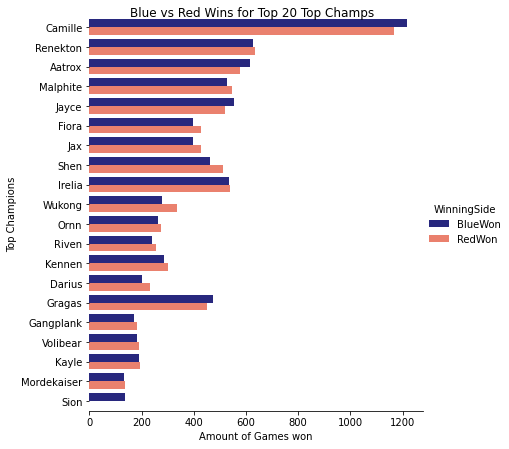

In [8]:
# Display whether Top Champions won more often on the blue or red side
g = sns.catplot(
    data=topChampsMVP, kind="bar",
    x="AmountWon", y="Champions", hue="WinningSide",
    ci="sd", palette=sns.color_palette(['#000080', '#FF6347']), alpha=.9, height=6,
)
g.despine(left=True)
g.set_axis_labels("Amount of Games won","Top Champions")
g.fig.suptitle('Blue vs Red Wins for Top 20 Top Champs', y=1)

Text(0.5, 1, 'Blue vs Red Wins for Top 20 Mid Champs')

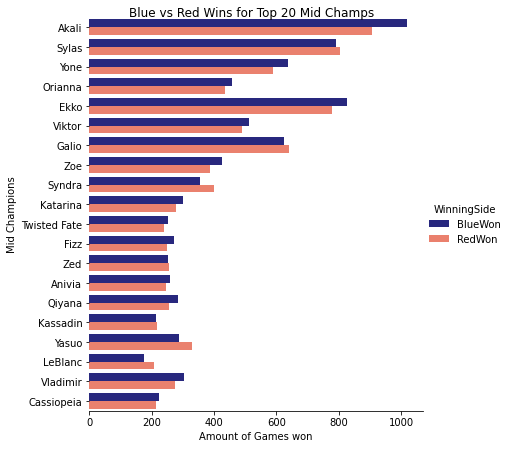

In [9]:
# Display whether Mid Champions won more often on the blue or red side
g = sns.catplot(
    data=midChampsMVP, kind="bar",
    x="AmountWon", y="Champions", hue="WinningSide",
    ci="sd", palette=sns.color_palette(['#000080', '#FF6347']), alpha=.9, height=6,
)
g.despine(left=True)
g.set_axis_labels("Amount of Games won","Mid Champions")
g.fig.suptitle('Blue vs Red Wins for Top 20 Mid Champs', y=1)

Text(0.5, 1, 'Blue vs Red Wins for Top 20 Jng Champs')

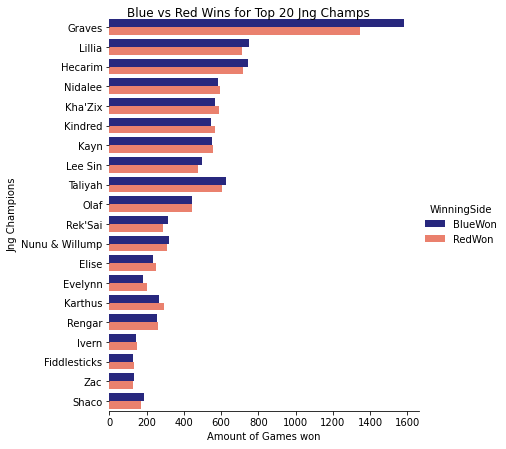

In [10]:
# Display whether Jungler Champions won more often on the blue or red side
g = sns.catplot(
    data=jngChampsMVP, kind="bar",
    x="AmountWon", y="Champions", hue="WinningSide",
    ci="sd", palette=sns.color_palette(['#000080', '#FF6347']), alpha=.9, height=6,
)
g.despine(left=True)
g.set_axis_labels("Amount of Games won","Jng Champions")
g.fig.suptitle('Blue vs Red Wins for Top 20 Jng Champs', y=1)

Text(0.5, 1, 'Blue vs Red Wins for Top 20 ADC Champs')

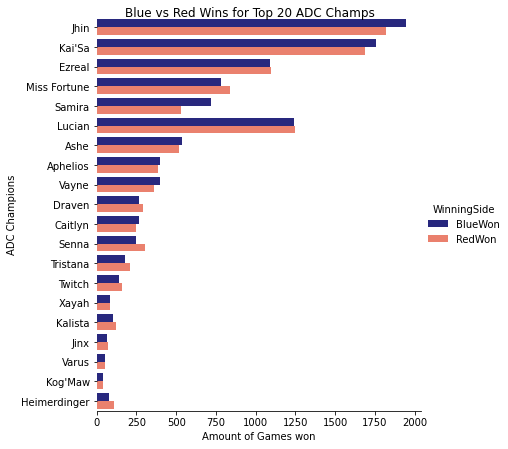

In [11]:
# Display whether Adc Champions won more often on the blue or red side
g = sns.catplot(
    data=adcChampsMVP, kind="bar",
    x="AmountWon", y="Champions", hue="WinningSide",
    ci="sd", palette=sns.color_palette(['#000080', '#FF6347']), alpha=.9, height=6,
)
g.despine(left=True)
g.set_axis_labels("Amount of Games won","ADC Champions")
g.fig.suptitle('Blue vs Red Wins for Top 20 ADC Champs', y=1)

Text(0.5, 1, 'Blue vs Red Wins for Top 20 Sup Champs')

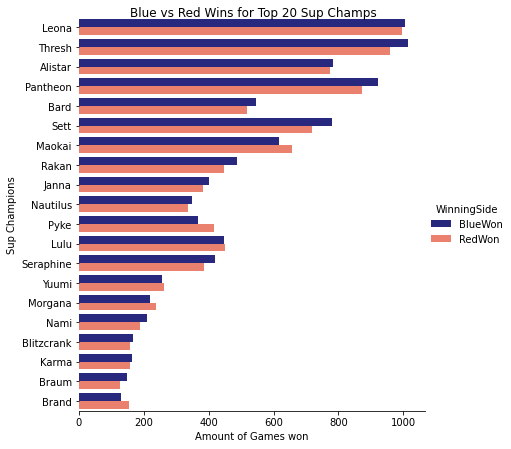

In [12]:
# Display whether Support Champions won more often on the blue or red side
g = sns.catplot(
    data=supChampsMVP, kind="bar",
    x="AmountWon", y="Champions", hue="WinningSide",
    ci="sd", palette=sns.color_palette(['#000080', '#FF6347']), alpha=.9, height=6,
)
g.despine(left=True)
g.set_axis_labels("Amount of Games won","Sup Champions")
g.fig.suptitle('Blue vs Red Wins for Top 20 Sup Champs', y=1)

In [13]:
%%html
<h2>Plotting Blue vs. Red Side Plays without Roles</h2>

<p>
Hypothesis: The Blue Side picks first and will therefore more likely take the strongest Champs, while Red will focus on doing Counterpicks
<br><br>
Deepak: So for example, if Renekton was played 2000 games and if we see that it has been played atleast 100 games more on Blue side compared to Red side, then we can say that it has been picked more on the Blue side because Renekton was a strong champ in this meta and because Blue side gets to pick first, they took away the champion from Red side
<br>
Result: From Plays alone doesnt seem that way with this data set
</p>

In [14]:
champStats_topChoices = champStats.set_index('TotalPlayed')

In [15]:
champStats_topChoicesBlue = champStats_topChoices.loc[(champStats_topChoices['BluePlayed']-champStats_topChoices['RedPlayed'] >= 100)]

In [16]:
champStats_topChoicesRed = champStats_topChoices.loc[(champStats_topChoices['RedPlayed']-champStats_topChoices['BluePlayed'] >= 100)]

In [17]:
champStats_topChoicesBlue

Champions  BlueWon  BluePlayed  RedWon  RedPlayed  Bluewinrate  \
TotalPlayed                                                                  
5812           Graves     1583        3096    1343       2716     0.511305   
2563           Samira      720        1444     533       1119     0.498615   

             Redwinrate  Totalwinrate Role1 Role2  #Role1  #Role2  PBWr  PRWr  \
TotalPlayed                                                                     
5812           0.494477      0.503441   Jng   Mid    5708       0   NaN   NaN   
2563           0.476318      0.488880   Adc   Mid    2465       0   NaN   NaN   

             SBWr  SRWr  
TotalPlayed              
5812          NaN   NaN  
2563          NaN   NaN

In [18]:
champStats_topChoicesRed

Champions  BlueWon  BluePlayed  RedWon  RedPlayed  \
TotalPlayed                                                         
4699               Ezreal     1087        2299    1097       2400   
3209         Miss Fortune      781        1544     840       1665   
3988                Leona     1004        1944     996       2044   

             Bluewinrate  Redwinrate  Totalwinrate Role1 Role2  #Role1  \
TotalPlayed                                                              
4699            0.472814    0.457083      0.464780   Adc   Top    4535   
3209            0.505829    0.504505      0.505142   Adc   Sup    3144   
3988            0.516461    0.487280      0.501505   Sup   Top    3974   

             #Role2  PBWr  PRWr  SBWr  SRWr  
TotalPlayed                                  
4699              0   NaN   NaN   NaN   NaN  
3209              0   NaN   NaN   NaN   NaN  
3988              0   NaN   NaN   NaN   NaN

In [19]:
%%html
<h2>Champion Synergies</h2>
<p>
Checking which Champions played in a Team with other Champions

</p>

In [20]:
championSynergiesRaw = pd.read_csv('../Data/LOLOracleData.csv')
championSynergiesRaw = championSynergiesRaw.drop(columns=['server', 'summoner_name','Time'])
championSynergiesRaw = championSynergiesRaw.set_index('winner')

In [21]:
# I am separating red and blue team here to be able to deal better with the data
championsRedSide = championSynergiesRaw[['RTop','RJng','RMid','RAdc','RSup']].copy()  # just as thought for a later point

In [22]:
championsBlueSide = championSynergiesRaw[['BTop','BJng','BMid','BAdc','BSup']].copy() # just as thought for a later point

In [23]:
championsBlueSide.head()

BTop     BJng    BMid    BAdc    BSup
winner                                          
Red     Camille   Gragas    Yone    Jhin   Brand
Blue    Camille  Nidalee   Galio    Jhin  Anivia
Blue     Irelia     Ekko   Annie  Kai'Sa  Thresh
Red      Graves  Kindred   Sylas   Vayne    Bard
Red     Camille  Lee Sin  Lucian  Kai'Sa   Leona

In [24]:
# Stole from Analysis.py to have all unique Champion names again

col = ['BTop', 'BJng', 'BMid', 'BAdc', 'BSup', 'RTop', 'RJng',
       'RMid', 'RAdc', 'RSup']
champ= []
for i in col:
    tempchamp = championSynergiesRaw[i].unique()
    champ = np.append(champ,tempchamp)


#Converting the data to a series to extract unique values and converting it back to a list
temp = pd.Series(champ)
champions = temp.unique()
champions = list(champions)

In [25]:
numbersForChamps = [*range(0, 153, 1)] # create list of numbers to create a dictionnaire together with champ names

In [26]:
zip_iterator = zip(champions, numbersForChamps) # and now made a user-friendly dict by zipping both together
championToNumberDict = dict(zip_iterator) # and voila, done
numberToChampionDict = {v: k for k, v in championToNumberDict.items()} # and ro reverse it again in the final list

In [27]:
#arrayForSynergyLoop = np.array(shape=(153,153)) # declare array to save matches
arrayForSynergyLoop = np.zeros((153,153), int)

In [28]:
# Rename columns to create up one big dataframe (if not changed blue won't append right)
redColumnsRename = championsRedSide.rename(columns={'RTop':'Top','RJng':'Jng','RMid':'Mid','RAdc':'Adc','RSup':'Sup'})
blueColumnsRename = championsBlueSide.rename(columns={'BTop':'Top','BJng':'Jng','BMid':'Mid','BAdc':'Adc','BSup':'Sup'})

In [29]:
allChampionTeams = redColumnsRename.append(blueColumnsRename) # create one big dataframe of blue and red to count all synergies

In [30]:
allChampionTeams.head()

Top        Jng      Mid           Adc       Sup
winner                                                      
Red         Shen     Graves    Sylas        Kai'Sa     Karma
Blue       Riven    Hecarim   Xerath  Miss Fortune   Vel'Koz
Blue      Aatrox  Jarvan IV  Orianna      Aphelios    Maokai
Red     Renekton    Nidalee     Ekko         Sivir      Pyke
Red         Jhin    Nidalee     Yone       Orianna  Pantheon

In [31]:
allChampionTeams.replace(championToNumberDict, inplace=True) # replace Champion names with numbers so that it runs faster

In [49]:
allChampionTeams.head()

Top  Jng  Mid  Adc  Sup
winner                         
Red      11    2   10   87   42
Blue      6   16   63   65  104
Blue      7  112   74   77   51
Red       5  128   31  131   23
Red      75  128   26   74   36

In [32]:
allChampionTeamsDict=allChampionTeams.to_dict('records')

In [33]:
allChampionTeamsDict

[{'Top': 11, 'Jng': 2, 'Mid': 10, 'Adc': 87, 'Sup': 42},
 {'Top': 6, 'Jng': 16, 'Mid': 63, 'Adc': 65, 'Sup': 104},
 {'Top': 7, 'Jng': 112, 'Mid': 74, 'Adc': 77, 'Sup': 51},
 {'Top': 5, 'Jng': 128, 'Mid': 31, 'Adc': 131, 'Sup': 23},
 {'Top': 75, 'Jng': 128, 'Mid': 26, 'Adc': 74, 'Sup': 36},
 {'Top': 32, 'Jng': 100, 'Mid': 25, 'Adc': 95, 'Sup': 9},
 {'Top': 32, 'Jng': 16, 'Mid': 59, 'Adc': 87, 'Sup': 51},
 {'Top': 1, 'Jng': 113, 'Mid': 64, 'Adc': 123, 'Sup': 138},
 {'Top': 29, 'Jng': 31, 'Mid': 23, 'Adc': 25, 'Sup': 12},
 {'Top': 1, 'Jng': 103, 'Mid': 32, 'Adc': 87, 'Sup': 132},
 {'Top': 5, 'Jng': 2, 'Mid': 31, 'Adc': 87, 'Sup': 9},
 {'Top': 36, 'Jng': 142, 'Mid': 99, 'Adc': 46, 'Sup': 148},
 {'Top': 3, 'Jng': 96, 'Mid': 68, 'Adc': 25, 'Sup': 148},
 {'Top': 30, 'Jng': 96, 'Mid': 1, 'Adc': 69, 'Sup': 116},
 {'Top': 44, 'Jng': 2, 'Mid': 14, 'Adc': 39, 'Sup': 51},
 {'Top': 8, 'Jng': 67, 'Mid': 116, 'Adc': 13, 'Sup': 36},
 {'Top': 15, 'Jng': 80, 'Mid': 25, 'Adc': 87, 'Sup': 12},
 {'Top': 45,

In [34]:
for row in allChampionTeamsDict:
    for key, value in row.items():
        print(key,value)

Top 11
Jng 2
Mid 10
Adc 87
Sup 42
Top 6
Jng 16
Mid 63
Adc 65
Sup 104
Top 7
Jng 112
Mid 74
Adc 77
Sup 51
Top 5
Jng 128
Mid 31
Adc 131
Sup 23
Top 75
Jng 128
Mid 26
Adc 74
Sup 36
Top 32
Jng 100
Mid 25
Adc 95
Sup 9
Top 32
Jng 16
Mid 59
Adc 87
Sup 51
Top 1
Jng 113
Mid 64
Adc 123
Sup 138
Top 29
Jng 31
Mid 23
Adc 25
Sup 12
Top 1
Jng 103
Mid 32
Adc 87
Sup 132
Top 5
Jng 2
Mid 31
Adc 87
Sup 9
Top 36
Jng 142
Mid 99
Adc 46
Sup 148
Top 3
Jng 96
Mid 68
Adc 25
Sup 148
Top 30
Jng 96
Mid 1
Adc 69
Sup 116
Top 44
Jng 2
Mid 14
Adc 39
Sup 51
Top 8
Jng 67
Mid 116
Adc 13
Sup 36
Top 15
Jng 80
Mid 25
Adc 87
Sup 12
Top 45
Jng 122
Mid 53
Adc 123
Sup 114
Top 6
Jng 31
Mid 53
Adc 87
Sup 148
Top 34
Jng 136
Mid 53
Adc 87
Sup 36
Top 14
Jng 142
Mid 25
Adc 87
Sup 126
Top 9
Jng 112
Mid 94
Adc 39
Sup 12
Top 34
Jng 2
Mid 90
Adc 39
Sup 12
Top 7
Jng 144
Mid 85
Adc 87
Sup 138
Top 18
Jng 96
Mid 26
Adc 71
Sup 115
Top 6
Jng 101
Mid 17
Adc 65
Sup 71
Top 11
Jng 76
Mid 64
Adc 87
Sup 66
Top 7
Jng 137
Mid 14
Adc 75
Sup 23
Top 97
Jng 

Top 10
Jng 122
Mid 19
Adc 87
Sup 138
Top 41
Jng 112
Mid 10
Adc 87
Sup 126
Top 0
Jng 142
Mid 120
Adc 46
Sup 114
Top 30
Jng 2
Mid 10
Adc 123
Sup 138
Top 15
Jng 121
Mid 30
Adc 39
Sup 23
Top 0
Jng 16
Mid 74
Adc 75
Sup 138
Top 21
Jng 142
Mid 74
Adc 46
Sup 126
Top 21
Jng 128
Mid 9
Adc 46
Sup 114
Top 25
Jng 80
Mid 1
Adc 95
Sup 126
Top 0
Jng 122
Mid 31
Adc 87
Sup 139
Top 14
Jng 16
Mid 9
Adc 64
Sup 114
Top 1
Jng 91
Mid 30
Adc 87
Sup 134
Top 7
Jng 128
Mid 91
Adc 46
Sup 151
Top 38
Jng 80
Mid 90
Adc 1
Sup 148
Top 6
Jng 112
Mid 14
Adc 75
Sup 134
Top 0
Jng 128
Mid 74
Adc 65
Sup 114
Top 1
Jng 137
Mid 111
Adc 87
Sup 148
Top 29
Jng 80
Mid 10
Adc 87
Sup 138
Top 61
Jng 31
Mid 17
Adc 75
Sup 138
Top 11
Jng 100
Mid 91
Adc 65
Sup 50
Top 1
Jng 80
Mid 94
Adc 75
Sup 9
Top 38
Jng 142
Mid 120
Adc 75
Sup 126
Top 54
Jng 80
Mid 26
Adc 65
Sup 138
Top 11
Jng 80
Mid 25
Adc 85
Sup 134
Top 61
Jng 107
Mid 26
Adc 87
Sup 146
Top 36
Jng 100
Mid 68
Adc 39
Sup 138
Top 9
Jng 96
Mid 93
Adc 87
Sup 71
Top 6
Jng 100
Mid 74
Adc 106


Mid 26
Adc 103
Sup 126
Top 0
Jng 144
Mid 93
Adc 75
Sup 23
Top 25
Jng 80
Mid 21
Adc 75
Sup 53
Top 0
Jng 80
Mid 25
Adc 39
Sup 148
Top 37
Jng 144
Mid 53
Adc 123
Sup 9
Top 10
Jng 16
Mid 108
Adc 75
Sup 66
Top 6
Jng 2
Mid 28
Adc 39
Sup 42
Top 8
Jng 2
Mid 14
Adc 95
Sup 51
Top 10
Jng 128
Mid 104
Adc 87
Sup 36
Top 33
Jng 70
Mid 108
Adc 69
Sup 36
Top 14
Jng 4
Mid 59
Adc 75
Sup 126
Top 29
Jng 112
Mid 105
Adc 46
Sup 126
Top 5
Jng 32
Mid 104
Adc 46
Sup 114
Top 7
Jng 2
Mid 104
Adc 68
Sup 36
Top 61
Jng 72
Mid 59
Adc 135
Sup 132
Top 21
Jng 141
Mid 91
Adc 46
Sup 145
Top 20
Jng 142
Mid 104
Adc 46
Sup 114
Top 98
Jng 133
Mid 108
Adc 25
Sup 134
Top 1
Jng 31
Mid 26
Adc 95
Sup 126
Top 28
Jng 16
Mid 0
Adc 25
Sup 147
Top 38
Jng 128
Mid 87
Adc 0
Sup 36
Top 21
Jng 110
Mid 31
Adc 75
Sup 126
Top 11
Jng 110
Mid 26
Adc 111
Sup 134
Top 26
Jng 142
Mid 94
Adc 87
Sup 146
Top 37
Jng 32
Mid 108
Adc 87
Sup 149
Top 21
Jng 80
Mid 25
Adc 87
Sup 32
Top 48
Jng 122
Mid 93
Adc 77
Sup 126
Top 41
Jng 16
Mid 25
Adc 64
Sup 126
Top 19

Sup 71
Top 0
Jng 122
Mid 10
Adc 75
Sup 126
Top 21
Jng 133
Mid 94
Adc 46
Sup 145
Top 9
Jng 80
Mid 45
Adc 46
Sup 36
Top 13
Jng 96
Mid 120
Adc 46
Sup 36
Top 49
Jng 110
Mid 94
Adc 46
Sup 145
Top 0
Jng 31
Mid 14
Adc 123
Sup 152
Top 87
Jng 128
Mid 31
Adc 0
Sup 139
Top 41
Jng 2
Mid 90
Adc 65
Sup 148
Top 7
Jng 31
Mid 94
Adc 61
Sup 114
Top 4
Jng 70
Mid 105
Adc 87
Sup 36
Top 62
Jng 142
Mid 0
Adc 75
Sup 63
Top 24
Jng 2
Mid 90
Adc 71
Sup 125
Top 14
Jng 36
Mid 91
Adc 87
Sup 139
Top 6
Jng 96
Mid 64
Adc 87
Sup 104
Top 0
Jng 98
Mid 74
Adc 46
Sup 126
Top 5
Jng 100
Mid 25
Adc 65
Sup 71
Top 8
Jng 107
Mid 61
Adc 87
Sup 132
Top 14
Jng 58
Mid 28
Adc 87
Sup 9
Top 19
Jng 16
Mid 53
Adc 65
Sup 114
Top 8
Jng 100
Mid 25
Adc 87
Sup 152
Top 0
Jng 8
Mid 14
Adc 39
Sup 36
Top 20
Jng 98
Mid 25
Adc 123
Sup 148
Top 30
Jng 110
Mid 68
Adc 73
Sup 139
Top 11
Jng 37
Mid 105
Adc 73
Sup 66
Top 0
Jng 128
Mid 53
Adc 73
Sup 50
Top 6
Jng 96
Mid 10
Adc 75
Sup 148
Top 56
Jng 16
Mid 31
Adc 77
Sup 63
Top 21
Jng 2
Mid 74
Adc 123
Sup 139

Sup 125
Top 62
Jng 98
Mid 25
Adc 46
Sup 51
Top 5
Jng 100
Mid 7
Adc 106
Sup 126
Top 21
Jng 67
Mid 10
Adc 106
Sup 126
Top 7
Jng 133
Mid 130
Adc 123
Sup 139
Top 5
Jng 80
Mid 99
Adc 77
Sup 71
Top 26
Jng 103
Mid 124
Adc 77
Sup 21
Top 43
Jng 96
Mid 10
Adc 87
Sup 134
Top 44
Jng 100
Mid 26
Adc 46
Sup 148
Top 48
Jng 141
Mid 23
Adc 46
Sup 51
Top 5
Jng 16
Mid 79
Adc 25
Sup 139
Top 8
Jng 37
Mid 53
Adc 65
Sup 71
Top 7
Jng 37
Mid 32
Adc 65
Sup 138
Top 0
Jng 2
Mid 99
Adc 75
Sup 51
Top 0
Jng 128
Mid 17
Adc 87
Sup 138
Top 25
Jng 100
Mid 1
Adc 103
Sup 66
Top 26
Jng 122
Mid 64
Adc 25
Sup 51
Top 5
Jng 2
Mid 104
Adc 87
Sup 36
Top 36
Jng 100
Mid 90
Adc 75
Sup 139
Top 14
Jng 142
Mid 89
Adc 46
Sup 36
Top 30
Jng 121
Mid 99
Adc 25
Sup 36
Top 26
Jng 128
Mid 8
Adc 87
Sup 148
Top 19
Jng 133
Mid 14
Adc 75
Sup 71
Top 4
Jng 142
Mid 33
Adc 87
Sup 148
Top 29
Jng 80
Mid 19
Adc 11
Sup 126
Top 135
Jng 48
Mid 21
Adc 25
Sup 66
Top 1
Jng 80
Mid 10
Adc 87
Sup 138
Top 24
Jng 80
Mid 25
Adc 87
Sup 138
Top 1
Jng 2
Mid 89
Adc 87
S

Top 11
Jng 37
Mid 99
Adc 65
Sup 36
Top 19
Jng 37
Mid 120
Adc 39
Sup 115
Top 25
Jng 37
Mid 105
Adc 39
Sup 126
Top 1
Jng 142
Mid 68
Adc 46
Sup 42
Top 9
Jng 107
Mid 31
Adc 39
Sup 138
Top 1
Jng 98
Mid 57
Adc 117
Sup 114
Top 1
Jng 2
Mid 90
Adc 87
Sup 134
Top 5
Jng 48
Mid 31
Adc 46
Sup 39
Top 0
Jng 102
Mid 25
Adc 87
Sup 51
Top 7
Jng 142
Mid 10
Adc 46
Sup 134
Top 55
Jng 110
Mid 108
Adc 65
Sup 9
Top 30
Jng 96
Mid 14
Adc 39
Sup 51
Top 57
Jng 133
Mid 10
Adc 75
Sup 145
Top 8
Jng 107
Mid 31
Adc 46
Sup 145
Top 1
Jng 96
Mid 68
Adc 87
Sup 114
Top 43
Jng 70
Mid 14
Adc 123
Sup 9
Top 24
Jng 80
Mid 26
Adc 39
Sup 148
Top 23
Jng 16
Mid 53
Adc 75
Sup 126
Top 6
Jng 142
Mid 27
Adc 75
Sup 23
Top 59
Jng 80
Mid 109
Adc 25
Sup 13
Top 14
Jng 96
Mid 64
Adc 75
Sup 134
Top 4
Jng 80
Mid 26
Adc 75
Sup 134
Top 15
Jng 16
Mid 45
Adc 103
Sup 36
Top 11
Jng 142
Mid 68
Adc 75
Sup 23
Top 11
Jng 101
Mid 80
Adc 69
Sup 146
Top 6
Jng 100
Mid 17
Adc 123
Sup 36
Top 40
Jng 128
Mid 31
Adc 138
Sup 73
Top 10
Jng 122
Mid 68
Adc 75
Sup 13

Adc 75
Sup 146
Top 24
Jng 144
Mid 26
Adc 75
Sup 146
Top 51
Jng 101
Mid 25
Adc 82
Sup 148
Top 90
Jng 10
Mid 0
Adc 73
Sup 146
Top 24
Jng 96
Mid 10
Adc 65
Sup 145
Top 30
Jng 2
Mid 54
Adc 61
Sup 71
Top 19
Jng 100
Mid 120
Adc 75
Sup 134
Top 5
Jng 100
Mid 36
Adc 118
Sup 138
Top 0
Jng 142
Mid 53
Adc 87
Sup 139
Top 5
Jng 128
Mid 99
Adc 46
Sup 51
Top 8
Jng 128
Mid 93
Adc 75
Sup 71
Top 44
Jng 144
Mid 74
Adc 75
Sup 138
Top 1
Jng 128
Mid 25
Adc 123
Sup 63
Top 32
Jng 100
Mid 25
Adc 123
Sup 9
Top 36
Jng 100
Mid 25
Adc 75
Sup 138
Top 24
Jng 2
Mid 74
Adc 65
Sup 139
Top 10
Jng 70
Mid 68
Adc 46
Sup 71
Top 10
Jng 128
Mid 24
Adc 46
Sup 126
Top 15
Jng 80
Mid 123
Adc 91
Sup 139
Top 29
Jng 119
Mid 74
Adc 46
Sup 139
Top 0
Jng 118
Mid 33
Adc 65
Sup 138
Top 69
Jng 16
Mid 93
Adc 46
Sup 126
Top 7
Jng 100
Mid 36
Adc 46
Sup 39
Top 40
Jng 100
Mid 74
Adc 87
Sup 114
Top 25
Jng 142
Mid 13
Adc 75
Sup 66
Top 18
Jng 118
Mid 14
Adc 106
Sup 138
Top 26
Jng 48
Mid 108
Adc 46
Sup 145
Top 1
Jng 80
Mid 20
Adc 123
Sup 137
Top 1
J

Jng 31
Mid 14
Adc 75
Sup 134
Top 30
Jng 128
Mid 59
Adc 87
Sup 114
Top 62
Jng 86
Mid 46
Adc 87
Sup 138
Top 53
Jng 110
Mid 13
Adc 123
Sup 138
Top 26
Jng 32
Mid 1
Adc 123
Sup 138
Top 21
Jng 103
Mid 59
Adc 65
Sup 146
Top 41
Jng 103
Mid 120
Adc 65
Sup 138
Top 19
Jng 96
Mid 31
Adc 87
Sup 148
Top 26
Jng 76
Mid 48
Adc 87
Sup 126
Top 49
Jng 122
Mid 92
Adc 87
Sup 134
Top 6
Jng 103
Mid 25
Adc 46
Sup 114
Top 24
Jng 7
Mid 94
Adc 65
Sup 66
Top 7
Jng 107
Mid 120
Adc 61
Sup 42
Top 36
Jng 100
Mid 10
Adc 61
Sup 151
Top 51
Jng 100
Mid 64
Adc 46
Sup 114
Top 0
Jng 80
Mid 31
Adc 87
Sup 12
Top 7
Jng 16
Mid 31
Adc 46
Sup 148
Top 8
Jng 31
Mid 57
Adc 123
Sup 139
Top 36
Jng 100
Mid 8
Adc 87
Sup 134
Top 8
Jng 16
Mid 14
Adc 46
Sup 126
Top 29
Jng 122
Mid 14
Adc 87
Sup 134
Top 51
Jng 102
Mid 14
Adc 106
Sup 66
Top 40
Jng 144
Mid 103
Adc 26
Sup 134
Top 14
Jng 100
Mid 1
Adc 65
Sup 138
Top 5
Jng 31
Mid 108
Adc 46
Sup 148
Top 21
Jng 133
Mid 46
Adc 123
Sup 145
Top 7
Jng 67
Mid 14
Adc 39
Sup 147
Top 16
Jng 78
Mid 3
Adc 75


Jng 48
Mid 99
Adc 87
Sup 138
Top 7
Jng 32
Mid 31
Adc 123
Sup 148
Top 54
Jng 137
Mid 26
Adc 77
Sup 134
Top 5
Jng 100
Mid 64
Adc 25
Sup 114
Top 26
Jng 98
Mid 68
Adc 143
Sup 126
Top 38
Jng 80
Mid 14
Adc 25
Sup 51
Top 24
Jng 100
Mid 89
Adc 68
Sup 98
Top 67
Jng 98
Mid 64
Adc 75
Sup 42
Top 67
Jng 144
Mid 10
Adc 106
Sup 151
Top 26
Jng 16
Mid 79
Adc 77
Sup 145
Top 0
Jng 107
Mid 64
Adc 118
Sup 151
Top 84
Jng 96
Mid 79
Adc 75
Sup 71
Top 4
Jng 103
Mid 25
Adc 39
Sup 12
Top 81
Jng 96
Mid 93
Adc 46
Sup 126
Top 25
Jng 86
Mid 26
Adc 118
Sup 66
Top 11
Jng 141
Mid 59
Adc 123
Sup 134
Top 24
Jng 4
Mid 93
Adc 123
Sup 66
Top 49
Jng 103
Mid 12
Adc 75
Sup 23
Top 14
Jng 113
Mid 26
Adc 61
Sup 12
Top 4
Jng 48
Mid 68
Adc 75
Sup 152
Top 26
Jng 101
Mid 20
Adc 69
Sup 138
Top 22
Jng 2
Mid 31
Adc 123
Sup 145
Top 44
Jng 107
Mid 26
Adc 95
Sup 149
Top 0
Jng 102
Mid 26
Adc 104
Sup 53
Top 0
Jng 16
Mid 74
Adc 25
Sup 151
Top 51
Jng 102
Mid 14
Adc 82
Sup 146
Top 22
Jng 2
Mid 84
Adc 106
Sup 134
Top 0
Jng 48
Mid 17
Adc 25
Sup 1

Sup 125
Top 38
Jng 107
Mid 10
Adc 123
Sup 114
Top 38
Jng 37
Mid 10
Adc 57
Sup 140
Top 13
Jng 112
Mid 25
Adc 109
Sup 23
Top 5
Jng 122
Mid 42
Adc 103
Sup 73
Top 1
Jng 96
Mid 10
Adc 75
Sup 63
Top 25
Jng 80
Mid 27
Adc 39
Sup 138
Top 27
Jng 96
Mid 21
Adc 95
Sup 148
Top 24
Jng 141
Mid 25
Adc 123
Sup 40
Top 17
Jng 128
Mid 25
Adc 95
Sup 125
Top 32
Jng 58
Mid 1
Adc 75
Sup 134
Top 6
Jng 31
Mid 23
Adc 25
Sup 114
Top 1
Jng 16
Mid 105
Adc 46
Sup 9
Top 74
Jng 2
Mid 24
Adc 73
Sup 126
Top 12
Jng 16
Mid 5
Adc 75
Sup 114
Top 8
Jng 32
Mid 57
Adc 39
Sup 138
Top 24
Jng 137
Mid 26
Adc 65
Sup 51
Top 32
Jng 2
Mid 93
Adc 65
Sup 132
Top 4
Jng 2
Mid 25
Adc 135
Sup 51
Top 24
Jng 112
Mid 74
Adc 57
Sup 12
Top 11
Jng 2
Mid 99
Adc 75
Sup 9
Top 27
Jng 2
Mid 14
Adc 87
Sup 32
Top 0
Jng 2
Mid 33
Adc 46
Sup 134
Top 25
Jng 141
Mid 5
Adc 46
Sup 134
Top 26
Jng 96
Mid 52
Adc 143
Sup 138
Top 44
Jng 31
Mid 93
Adc 46
Sup 126
Top 0
Jng 100
Mid 91
Adc 61
Sup 12
Top 25
Jng 129
Mid 108
Adc 22
Sup 151
Top 22
Jng 103
Mid 25
Adc 47
Sup

Jng 16
Mid 45
Adc 39
Sup 147
Top 29
Jng 96
Mid 71
Adc 69
Sup 138
Top 11
Jng 142
Mid 31
Adc 71
Sup 125
Top 44
Jng 2
Mid 53
Adc 39
Sup 138
Top 26
Jng 142
Mid 89
Adc 87
Sup 148
Top 25
Jng 96
Mid 93
Adc 26
Sup 134
Top 0
Jng 31
Mid 26
Adc 65
Sup 125
Top 44
Jng 100
Mid 31
Adc 46
Sup 125
Top 32
Jng 98
Mid 25
Adc 39
Sup 149
Top 8
Jng 2
Mid 39
Adc 93
Sup 115
Top 44
Jng 110
Mid 14
Adc 46
Sup 138
Top 7
Jng 119
Mid 31
Adc 87
Sup 51
Top 0
Jng 107
Mid 92
Adc 25
Sup 36
Top 20
Jng 103
Mid 59
Adc 46
Sup 115
Top 27
Jng 144
Mid 25
Adc 75
Sup 115
Top 6
Jng 36
Mid 74
Adc 61
Sup 147
Top 44
Jng 10
Mid 30
Adc 87
Sup 39
Top 0
Jng 98
Mid 108
Adc 87
Sup 138
Top 58
Jng 31
Mid 89
Adc 75
Sup 126
Top 14
Jng 142
Mid 94
Adc 57
Sup 138
Top 37
Jng 98
Mid 31
Adc 123
Sup 148
Top 26
Jng 141
Mid 46
Adc 0
Sup 115
Top 0
Jng 80
Mid 62
Adc 25
Sup 138
Top 9
Jng 137
Mid 26
Adc 87
Sup 66
Top 15
Jng 76
Mid 113
Adc 117
Sup 148
Top 37
Jng 48
Mid 58
Adc 87
Sup 114
Top 18
Jng 80
Mid 1
Adc 39
Sup 138
Top 29
Jng 122
Mid 14
Adc 123
Sup 51

Jng 2
Mid 31
Adc 75
Sup 114
Top 34
Jng 31
Mid 82
Adc 75
Sup 17
Top 15
Jng 133
Mid 74
Adc 143
Sup 134
Top 25
Jng 142
Mid 19
Adc 123
Sup 115
Top 8
Jng 80
Mid 14
Adc 75
Sup 126
Top 14
Jng 136
Mid 26
Adc 75
Sup 138
Top 44
Jng 142
Mid 30
Adc 65
Sup 139
Top 30
Jng 137
Mid 1
Adc 61
Sup 134
Top 9
Jng 142
Mid 93
Adc 46
Sup 71
Top 19
Jng 133
Mid 47
Adc 75
Sup 126
Top 64
Jng 16
Mid 0
Adc 46
Sup 124
Top 46
Jng 113
Mid 26
Adc 14
Sup 140
Top 19
Jng 31
Mid 87
Adc 95
Sup 138
Top 7
Jng 58
Mid 93
Adc 75
Sup 126
Top 84
Jng 78
Mid 28
Adc 75
Sup 67
Top 0
Jng 96
Mid 93
Adc 75
Sup 66
Top 18
Jng 96
Mid 64
Adc 6
Sup 139
Top 19
Jng 100
Mid 1
Adc 46
Sup 66
Top 13
Jng 2
Mid 1
Adc 75
Sup 134
Top 49
Jng 2
Mid 108
Adc 87
Sup 139
Top 4
Jng 96
Mid 71
Adc 87
Sup 73
Top 0
Jng 103
Mid 68
Adc 82
Sup 51
Top 5
Jng 128
Mid 93
Adc 123
Sup 115
Top 19
Jng 70
Mid 71
Adc 75
Sup 115
Top 25
Jng 31
Mid 1
Adc 38
Sup 139
Top 5
Jng 107
Mid 26
Adc 75
Sup 51
Top 18
Jng 2
Mid 94
Adc 39
Sup 104
Top 61
Jng 2
Mid 88
Adc 118
Sup 114
Top 48
Jn

Top 26
Jng 2
Mid 108
Adc 123
Sup 53
Top 91
Jng 102
Mid 52
Adc 87
Sup 23
Top 8
Jng 48
Mid 31
Adc 109
Sup 23
Top 10
Jng 72
Mid 26
Adc 75
Sup 99
Top 44
Jng 128
Mid 12
Adc 87
Sup 148
Top 19
Jng 10
Mid 12
Adc 25
Sup 99
Top 14
Jng 142
Mid 64
Adc 46
Sup 126
Top 9
Jng 142
Mid 14
Adc 123
Sup 51
Top 3
Jng 96
Mid 47
Adc 118
Sup 12
Top 61
Jng 128
Mid 1
Adc 100
Sup 148
Top 26
Jng 2
Mid 71
Adc 25
Sup 145
Top 24
Jng 122
Mid 52
Adc 65
Sup 11
Top 11
Jng 129
Mid 68
Adc 75
Sup 23
Top 26
Jng 110
Mid 31
Adc 25
Sup 151
Top 94
Jng 2
Mid 20
Adc 135
Sup 36
Top 5
Jng 100
Mid 33
Adc 65
Sup 51
Top 7
Jng 112
Mid 74
Adc 39
Sup 138
Top 18
Jng 96
Mid 108
Adc 75
Sup 139
Top 19
Jng 96
Mid 103
Adc 73
Sup 66
Top 18
Jng 16
Mid 10
Adc 75
Sup 151
Top 0
Jng 16
Mid 74
Adc 142
Sup 66
Top 1
Jng 4
Mid 99
Adc 87
Sup 9
Top 14
Jng 142
Mid 59
Adc 87
Sup 12
Top 14
Jng 2
Mid 108
Adc 75
Sup 134
Top 29
Jng 128
Mid 25
Adc 75
Sup 126
Top 0
Jng 142
Mid 31
Adc 39
Sup 147
Top 11
Jng 2
Mid 31
Adc 39
Sup 148
Top 28
Jng 110
Mid 10
Adc 75
Sup 11

Jng 142
Mid 31
Adc 73
Sup 23
Top 41
Jng 76
Mid 10
Adc 46
Sup 23
Top 24
Jng 16
Mid 14
Adc 87
Sup 53
Top 30
Jng 128
Mid 90
Adc 46
Sup 36
Top 26
Jng 31
Mid 59
Adc 87
Sup 51
Top 0
Jng 2
Mid 31
Adc 150
Sup 134
Top 5
Jng 141
Mid 104
Adc 46
Sup 71
Top 21
Jng 96
Mid 58
Adc 75
Sup 104
Top 1
Jng 96
Mid 108
Adc 87
Sup 66
Top 61
Jng 142
Mid 26
Adc 39
Sup 139
Top 21
Jng 80
Mid 25
Adc 123
Sup 114
Top 36
Jng 2
Mid 26
Adc 103
Sup 148
Top 21
Jng 128
Mid 83
Adc 87
Sup 138
Top 38
Jng 100
Mid 26
Adc 75
Sup 147
Top 15
Jng 100
Mid 25
Adc 46
Sup 148
Top 6
Jng 96
Mid 94
Adc 46
Sup 63
Top 9
Jng 141
Mid 25
Adc 87
Sup 139
Top 14
Jng 2
Mid 91
Adc 71
Sup 73
Top 5
Jng 141
Mid 14
Adc 39
Sup 147
Top 7
Jng 2
Mid 3
Adc 75
Sup 148
Top 8
Jng 136
Mid 26
Adc 61
Sup 116
Top 4
Jng 2
Mid 123
Adc 31
Sup 148
Top 26
Jng 76
Mid 105
Adc 57
Sup 147
Top 26
Jng 144
Mid 24
Adc 75
Sup 36
Top 0
Jng 2
Mid 52
Adc 61
Sup 134
Top 38
Jng 133
Mid 26
Adc 87
Sup 134
Top 6
Jng 142
Mid 10
Adc 103
Sup 73
Top 29
Jng 100
Mid 36
Adc 87
Sup 114
Top 25

Sup 23
Top 21
Jng 96
Mid 57
Adc 108
Sup 138
Top 132
Jng 96
Mid 100
Adc 75
Sup 73
Top 41
Jng 107
Mid 14
Adc 69
Sup 134
Top 30
Jng 48
Mid 93
Adc 73
Sup 134
Top 20
Jng 102
Mid 108
Adc 123
Sup 132
Top 14
Jng 16
Mid 57
Adc 87
Sup 134
Top 57
Jng 2
Mid 14
Adc 46
Sup 42
Top 12
Jng 2
Mid 31
Adc 75
Sup 138
Top 32
Jng 107
Mid 25
Adc 46
Sup 134
Top 18
Jng 16
Mid 94
Adc 73
Sup 116
Top 5
Jng 144
Mid 10
Adc 39
Sup 114
Top 18
Jng 128
Mid 17
Adc 46
Sup 114
Top 19
Jng 110
Mid 25
Adc 65
Sup 9
Top 1
Jng 110
Mid 18
Adc 135
Sup 12
Top 44
Jng 32
Mid 84
Adc 87
Sup 138
Top 36
Jng 80
Mid 94
Adc 123
Sup 139
Top 4
Jng 31
Mid 26
Adc 39
Sup 114
Top 24
Jng 2
Mid 105
Adc 61
Sup 12
Top 24
Jng 122
Mid 108
Adc 25
Sup 138
Top 0
Jng 98
Mid 91
Adc 65
Sup 63
Top 30
Jng 107
Mid 10
Adc 75
Sup 138
Top 9
Jng 31
Mid 64
Adc 106
Sup 147
Top 5
Jng 80
Mid 53
Adc 65
Sup 23
Top 33
Jng 37
Mid 79
Adc 106
Sup 134
Top 9
Jng 103
Mid 82
Adc 39
Sup 114
Top 11
Jng 70
Mid 91
Adc 61
Sup 12
Top 5
Jng 102
Mid 31
Adc 73
Sup 12
Top 0
Jng 142
Mid 93

Top 8
Jng 67
Mid 33
Adc 65
Sup 63
Top 54
Jng 112
Mid 64
Adc 25
Sup 134
Top 15
Jng 16
Mid 31
Adc 87
Sup 132
Top 6
Jng 112
Mid 105
Adc 39
Sup 21
Top 11
Jng 2
Mid 45
Adc 65
Sup 42
Top 19
Jng 48
Mid 45
Adc 123
Sup 139
Top 14
Jng 67
Mid 10
Adc 65
Sup 114
Top 24
Jng 110
Mid 17
Adc 46
Sup 145
Top 6
Jng 122
Mid 105
Adc 39
Sup 114
Top 24
Jng 2
Mid 90
Adc 87
Sup 151
Top 52
Jng 48
Mid 58
Adc 123
Sup 145
Top 58
Jng 98
Mid 108
Adc 46
Sup 126
Top 38
Jng 122
Mid 127
Adc 46
Sup 146
Top 5
Jng 98
Mid 58
Adc 87
Sup 140
Top 0
Jng 142
Mid 105
Adc 46
Sup 148
Top 24
Jng 37
Mid 105
Adc 127
Sup 148
Top 14
Jng 96
Mid 74
Adc 62
Sup 71
Top 1
Jng 137
Mid 31
Adc 75
Sup 148
Top 0
Jng 86
Mid 74
Adc 61
Sup 114
Top 44
Jng 110
Mid 14
Adc 25
Sup 151
Top 0
Jng 144
Mid 93
Adc 46
Sup 147
Top 55
Jng 142
Mid 103
Adc 94
Sup 114
Top 37
Jng 16
Mid 71
Adc 87
Sup 23
Top 38
Jng 133
Mid 31
Adc 25
Sup 23
Top 38
Jng 31
Mid 10
Adc 46
Sup 126
Top 20
Jng 136
Mid 1
Adc 57
Sup 146
Top 24
Jng 48
Mid 127
Adc 87
Sup 139
Top 3
Jng 80
Mid 26
Ad

Top 11
Jng 128
Mid 74
Adc 75
Sup 146
Top 17
Jng 142
Mid 94
Adc 75
Sup 126
Top 24
Jng 144
Mid 31
Adc 39
Sup 148
Top 11
Jng 48
Mid 108
Adc 73
Sup 140
Top 51
Jng 4
Mid 68
Adc 65
Sup 140
Top 49
Jng 80
Mid 82
Adc 75
Sup 126
Top 1
Jng 2
Mid 94
Adc 73
Sup 147
Top 8
Jng 80
Mid 26
Adc 46
Sup 134
Top 7
Jng 107
Mid 52
Adc 131
Sup 23
Top 124
Jng 72
Mid 132
Adc 117
Sup 116
Top 20
Jng 16
Mid 93
Adc 95
Sup 62
Top 1
Jng 2
Mid 11
Adc 65
Sup 134
Top 60
Jng 100
Mid 108
Adc 25
Sup 116
Top 11
Jng 48
Mid 12
Adc 25
Sup 134
Top 27
Jng 142
Mid 71
Adc 87
Sup 36
Top 24
Jng 122
Mid 47
Adc 25
Sup 36
Top 8
Jng 142
Mid 1
Adc 109
Sup 49
Top 24
Jng 2
Mid 94
Adc 39
Sup 71
Top 3
Jng 110
Mid 51
Adc 87
Sup 134
Top 6
Jng 83
Mid 33
Adc 87
Sup 146
Top 0
Jng 137
Mid 48
Adc 46
Sup 146
Top 21
Jng 31
Mid 24
Adc 46
Sup 147
Top 11
Jng 96
Mid 62
Adc 95
Sup 51
Top 21
Jng 16
Mid 35
Adc 87
Sup 134
Top 12
Jng 2
Mid 105
Adc 75
Sup 23
Top 26
Jng 122
Mid 63
Adc 123
Sup 138
Top 40
Jng 142
Mid 74
Adc 69
Sup 32
Top 1
Jng 2
Mid 14
Adc 39
Sup 

Sup 134
Top 3
Jng 16
Mid 25
Adc 65
Sup 53
Top 10
Jng 48
Mid 14
Adc 123
Sup 40
Top 77
Jng 80
Mid 22
Adc 2
Sup 145
Top 92
Jng 110
Mid 99
Adc 123
Sup 53
Top 7
Jng 144
Mid 93
Adc 106
Sup 36
Top 41
Jng 137
Mid 103
Adc 100
Sup 139
Top 44
Jng 96
Mid 71
Adc 115
Sup 148
Top 25
Jng 80
Mid 63
Adc 109
Sup 73
Top 148
Jng 137
Mid 74
Adc 100
Sup 73
Top 38
Jng 80
Mid 105
Adc 57
Sup 23
Top 18
Jng 2
Mid 94
Adc 123
Sup 36
Top 3
Jng 70
Mid 36
Adc 75
Sup 23
Top 8
Jng 128
Mid 53
Adc 57
Sup 114
Top 11
Jng 119
Mid 94
Adc 65
Sup 36
Top 10
Jng 2
Mid 68
Adc 87
Sup 114
Top 0
Jng 80
Mid 58
Adc 73
Sup 138
Top 0
Jng 70
Mid 94
Adc 73
Sup 134
Top 18
Jng 2
Mid 10
Adc 118
Sup 12
Top 1
Jng 142
Mid 31
Adc 65
Sup 114
Top 29
Jng 32
Mid 57
Adc 73
Sup 148
Top 0
Jng 110
Mid 89
Adc 65
Sup 71
Top 8
Jng 122
Mid 119
Adc 135
Sup 115
Top 84
Jng 122
Mid 26
Adc 21
Sup 115
Top 15
Jng 128
Mid 33
Adc 106
Sup 138
Top 32
Jng 96
Mid 33
Adc 65
Sup 138
Top 32
Jng 48
Mid 25
Adc 65
Sup 134
Top 7
Jng 80
Mid 10
Adc 25
Sup 23
Top 4
Jng 110
Mid 31


Jng 16
Mid 25
Adc 46
Sup 151
Top 103
Jng 110
Mid 10
Adc 87
Sup 23
Top 6
Jng 0
Mid 56
Adc 75
Sup 17
Top 24
Jng 103
Mid 94
Adc 75
Sup 23
Top 5
Jng 2
Mid 10
Adc 45
Sup 149
Top 1
Jng 2
Mid 93
Adc 87
Sup 134
Top 0
Jng 100
Mid 14
Adc 75
Sup 152
Top 6
Jng 136
Mid 31
Adc 118
Sup 23
Top 11
Jng 16
Mid 31
Adc 75
Sup 126
Top 4
Jng 31
Mid 25
Adc 104
Sup 138
Top 7
Jng 11
Mid 53
Adc 77
Sup 12
Top 33
Jng 16
Mid 17
Adc 75
Sup 23
Top 0
Jng 142
Mid 31
Adc 75
Sup 35
Top 4
Jng 141
Mid 26
Adc 46
Sup 134
Top 14
Jng 2
Mid 31
Adc 75
Sup 138
Top 8
Jng 16
Mid 74
Adc 46
Sup 134
Top 18
Jng 16
Mid 53
Adc 106
Sup 42
Top 10
Jng 91
Mid 74
Adc 65
Sup 148
Top 0
Jng 100
Mid 99
Adc 25
Sup 151
Top 4
Jng 48
Mid 120
Adc 87
Sup 23
Top 69
Jng 96
Mid 56
Adc 87
Sup 134
Top 1
Jng 128
Mid 26
Adc 123
Sup 146
Top 24
Jng 2
Mid 91
Adc 61
Sup 12
Top 24
Jng 122
Mid 47
Adc 99
Sup 0
Top 18
Jng 2
Mid 108
Adc 65
Sup 134
Top 8
Jng 32
Mid 1
Adc 123
Sup 9
Top 7
Jng 128
Mid 26
Adc 46
Sup 139
Top 7
Jng 110
Mid 71
Adc 87
Sup 138
Top 98
Jng 2
Mid 

Mid 28
Adc 75
Sup 116
Top 51
Jng 80
Mid 25
Adc 61
Sup 126
Top 22
Jng 44
Mid 14
Adc 123
Sup 138
Top 25
Jng 16
Mid 28
Adc 123
Sup 99
Top 0
Jng 2
Mid 31
Adc 95
Sup 125
Top 97
Jng 144
Mid 54
Adc 25
Sup 146
Top 10
Jng 141
Mid 8
Adc 75
Sup 148
Top 1
Jng 31
Mid 81
Adc 26
Sup 145
Top 0
Jng 37
Mid 116
Adc 77
Sup 66
Top 30
Jng 80
Mid 23
Adc 73
Sup 9
Top 30
Jng 40
Mid 94
Adc 39
Sup 12
Top 10
Jng 110
Mid 127
Adc 7
Sup 124
Top 55
Jng 48
Mid 74
Adc 65
Sup 134
Top 32
Jng 141
Mid 59
Adc 77
Sup 116
Top 0
Jng 122
Mid 3
Adc 150
Sup 114
Top 54
Jng 122
Mid 103
Adc 51
Sup 23
Top 14
Jng 122
Mid 10
Adc 57
Sup 124
Top 4
Jng 78
Mid 52
Adc 65
Sup 134
Top 0
Jng 16
Mid 105
Adc 32
Sup 73
Top 0
Jng 122
Mid 57
Adc 71
Sup 50
Top 5
Jng 128
Mid 53
Adc 57
Sup 114
Top 78
Jng 52
Mid 59
Adc 47
Sup 36
Top 10
Jng 102
Mid 25
Adc 115
Sup 125
Top 27
Jng 144
Mid 91
Adc 75
Sup 139
Top 0
Jng 2
Mid 108
Adc 123
Sup 9
Top 21
Jng 80
Mid 59
Adc 75
Sup 134
Top 0
Jng 31
Mid 52
Adc 65
Sup 73
Top 9
Jng 142
Mid 108
Adc 123
Sup 145
Top 8
Jng 

Mid 93
Adc 87
Sup 138
Top 36
Jng 128
Mid 44
Adc 39
Sup 126
Top 1
Jng 100
Mid 93
Adc 87
Sup 139
Top 6
Jng 67
Mid 40
Adc 65
Sup 109
Top 9
Jng 48
Mid 120
Adc 75
Sup 116
Top 41
Jng 80
Mid 28
Adc 75
Sup 138
Top 13
Jng 2
Mid 93
Adc 75
Sup 126
Top 0
Jng 31
Mid 64
Adc 46
Sup 23
Top 0
Jng 80
Mid 94
Adc 75
Sup 114
Top 30
Jng 2
Mid 26
Adc 46
Sup 42
Top 36
Jng 80
Mid 31
Adc 87
Sup 140
Top 57
Jng 2
Mid 4
Adc 46
Sup 138
Top 9
Jng 2
Mid 108
Adc 25
Sup 134
Top 6
Jng 110
Mid 53
Adc 39
Sup 148
Top 24
Jng 96
Mid 108
Adc 46
Sup 114
Top 9
Jng 110
Mid 88
Adc 25
Sup 138
Top 34
Jng 142
Mid 17
Adc 106
Sup 9
Top 24
Jng 80
Mid 100
Adc 25
Sup 138
Top 1
Jng 144
Mid 68
Adc 87
Sup 139
Top 0
Jng 107
Mid 105
Adc 75
Sup 36
Top 9
Jng 10
Mid 26
Adc 75
Sup 114
Top 41
Jng 102
Mid 17
Adc 39
Sup 9
Top 0
Jng 67
Mid 82
Adc 75
Sup 63
Top 14
Jng 102
Mid 74
Adc 24
Sup 132
Top 5
Jng 128
Mid 25
Adc 75
Sup 17
Top 38
Jng 102
Mid 74
Adc 61
Sup 12
Top 56
Jng 102
Mid 93
Adc 118
Sup 145
Top 18
Jng 102
Mid 94
Adc 75
Sup 139
Top 0
Jng 98
M

Mid 58
Adc 75
Sup 134
Top 26
Jng 140
Mid 10
Adc 82
Sup 152
Top 0
Jng 141
Mid 74
Adc 25
Sup 134
Top 24
Jng 144
Mid 35
Adc 65
Sup 134
Top 11
Jng 110
Mid 45
Adc 106
Sup 66
Top 13
Jng 110
Mid 26
Adc 39
Sup 66
Top 0
Jng 144
Mid 57
Adc 75
Sup 132
Top 6
Jng 128
Mid 125
Adc 87
Sup 66
Top 26
Jng 67
Mid 14
Adc 39
Sup 138
Top 24
Jng 144
Mid 57
Adc 106
Sup 70
Top 56
Jng 37
Mid 114
Adc 106
Sup 66
Top 45
Jng 96
Mid 53
Adc 39
Sup 148
Top 21
Jng 16
Mid 26
Adc 106
Sup 66
Top 21
Jng 144
Mid 26
Adc 39
Sup 71
Top 18
Jng 122
Mid 14
Adc 123
Sup 71
Top 26
Jng 122
Mid 88
Adc 46
Sup 138
Top 1
Jng 96
Mid 74
Adc 39
Sup 9
Top 66
Jng 67
Mid 91
Adc 103
Sup 139
Top 15
Jng 110
Mid 94
Adc 75
Sup 138
Top 92
Jng 83
Mid 68
Adc 25
Sup 145
Top 97
Jng 110
Mid 14
Adc 109
Sup 138
Top 0
Jng 70
Mid 14
Adc 46
Sup 71
Top 62
Jng 110
Mid 25
Adc 75
Sup 66
Top 24
Jng 129
Mid 14
Adc 65
Sup 138
Top 3
Jng 110
Mid 68
Adc 61
Sup 12
Top 18
Jng 136
Mid 130
Adc 77
Sup 17
Top 81
Jng 107
Mid 93
Adc 46
Sup 66
Top 11
Jng 118
Mid 125
Adc 39
Sup 1

Adc 39
Sup 66
Top 21
Jng 96
Mid 30
Adc 65
Sup 51
Top 44
Jng 137
Mid 46
Adc 119
Sup 146
Top 5
Jng 2
Mid 130
Adc 46
Sup 40
Top 5
Jng 70
Mid 33
Adc 82
Sup 151
Top 12
Jng 142
Mid 68
Adc 75
Sup 66
Top 84
Jng 118
Mid 91
Adc 51
Sup 73
Top 18
Jng 141
Mid 35
Adc 95
Sup 73
Top 92
Jng 137
Mid 23
Adc 75
Sup 66
Top 24
Jng 16
Mid 68
Adc 87
Sup 148
Top 52
Jng 9
Mid 68
Adc 95
Sup 140
Top 0
Jng 2
Mid 14
Adc 39
Sup 151
Top 1
Jng 137
Mid 26
Adc 87
Sup 66
Top 30
Jng 16
Mid 26
Adc 87
Sup 145
Top 38
Jng 16
Mid 62
Adc 150
Sup 63
Top 44
Jng 8
Mid 99
Adc 106
Sup 66
Top 27
Jng 144
Mid 57
Adc 95
Sup 51
Top 0
Jng 141
Mid 21
Adc 75
Sup 17
Top 54
Jng 2
Mid 17
Adc 82
Sup 71
Top 0
Jng 133
Mid 25
Adc 135
Sup 134
Top 30
Jng 141
Mid 57
Adc 73
Sup 63
Top 0
Jng 102
Mid 120
Adc 75
Sup 71
Top 1
Jng 141
Mid 26
Adc 46
Sup 126
Top 0
Jng 133
Mid 58
Adc 82
Sup 12
Top 8
Jng 96
Mid 74
Adc 46
Sup 132
Top 14
Jng 96
Mid 26
Adc 75
Sup 145
Top 24
Jng 37
Mid 99
Adc 45
Sup 126
Top 20
Jng 133
Mid 104
Adc 65
Sup 126
Top 56
Jng 2
Mid 58
Adc

Jng 140
Mid 59
Adc 87
Sup 124
Top 0
Jng 16
Mid 123
Adc 32
Sup 140
Top 3
Jng 16
Mid 31
Adc 75
Sup 146
Top 62
Jng 142
Mid 36
Adc 75
Sup 66
Top 0
Jng 32
Mid 57
Adc 75
Sup 51
Top 22
Jng 2
Mid 31
Adc 25
Sup 140
Top 1
Jng 136
Mid 90
Adc 87
Sup 146
Top 7
Jng 110
Mid 26
Adc 87
Sup 134
Top 11
Jng 141
Mid 31
Adc 123
Sup 134
Top 3
Jng 96
Mid 25
Adc 46
Sup 140
Top 9
Jng 96
Mid 125
Adc 75
Sup 51
Top 8
Jng 16
Mid 14
Adc 9
Sup 126
Top 25
Jng 80
Mid 88
Adc 117
Sup 23
Top 21
Jng 16
Mid 57
Adc 65
Sup 134
Top 6
Jng 137
Mid 14
Adc 62
Sup 145
Top 57
Jng 142
Mid 127
Adc 46
Sup 145
Top 58
Jng 98
Mid 26
Adc 62
Sup 39
Top 1
Jng 98
Mid 25
Adc 87
Sup 126
Top 8
Jng 122
Mid 14
Adc 95
Sup 116
Top 26
Jng 103
Mid 0
Adc 117
Sup 47
Top 6
Jng 78
Mid 26
Adc 103
Sup 23
Top 0
Jng 96
Mid 58
Adc 103
Sup 66
Top 97
Jng 96
Mid 74
Adc 95
Sup 12
Top 9
Jng 2
Mid 31
Adc 131
Sup 124
Top 103
Jng 128
Mid 59
Adc 4
Sup 66
Top 79
Jng 31
Mid 58
Adc 39
Sup 126
Top 9
Jng 141
Mid 62
Adc 25
Sup 126
Top 21
Jng 102
Mid 45
Adc 39
Sup 124
Top 24


Adc 123
Sup 138
Top 41
Jng 55
Mid 23
Adc 25
Sup 42
Top 25
Jng 2
Mid 70
Adc 75
Sup 140
Top 11
Jng 141
Mid 45
Adc 77
Sup 138
Top 7
Jng 2
Mid 10
Adc 75
Sup 148
Top 24
Jng 121
Mid 10
Adc 75
Sup 104
Top 21
Jng 16
Mid 35
Adc 95
Sup 145
Top 47
Jng 141
Mid 14
Adc 25
Sup 138
Top 54
Jng 16
Mid 93
Adc 75
Sup 145
Top 12
Jng 122
Mid 10
Adc 95
Sup 126
Top 60
Jng 16
Mid 10
Adc 87
Sup 125
Top 15
Jng 110
Mid 10
Adc 75
Sup 23
Top 92
Jng 122
Mid 14
Adc 75
Sup 36
Top 8
Jng 2
Mid 10
Adc 143
Sup 12
Top 0
Jng 96
Mid 64
Adc 65
Sup 146
Top 26
Jng 96
Mid 107
Adc 75
Sup 134
Top 0
Jng 37
Mid 57
Adc 65
Sup 109
Top 54
Jng 110
Mid 0
Adc 61
Sup 116
Top 1
Jng 16
Mid 25
Adc 65
Sup 126
Top 25
Jng 31
Mid 92
Adc 46
Sup 66
Top 18
Jng 16
Mid 28
Adc 46
Sup 126
Top 5
Jng 31
Mid 36
Adc 61
Sup 12
Top 59
Jng 100
Mid 7
Adc 25
Sup 138
Top 29
Jng 107
Mid 47
Adc 82
Sup 0
Top 25
Jng 78
Mid 3
Adc 85
Sup 4
Top 14
Jng 16
Mid 35
Adc 46
Sup 138
Top 38
Jng 128
Mid 93
Adc 75
Sup 66
Top 7
Jng 113
Mid 31
Adc 106
Sup 134
Top 70
Jng 103
Mid 56


Top 60
Jng 2
Mid 53
Adc 46
Sup 71
Top 27
Jng 110
Mid 14
Adc 46
Sup 147
Top 44
Jng 144
Mid 59
Adc 77
Sup 148
Top 3
Jng 31
Mid 91
Adc 87
Sup 9
Top 1
Jng 80
Mid 56
Adc 65
Sup 140
Top 3
Jng 102
Mid 9
Adc 123
Sup 148
Top 24
Jng 101
Mid 35
Adc 75
Sup 73
Top 44
Jng 141
Mid 116
Adc 87
Sup 23
Top 34
Jng 31
Mid 25
Adc 75
Sup 36
Top 19
Jng 16
Mid 93
Adc 87
Sup 12
Top 14
Jng 16
Mid 3
Adc 87
Sup 140
Top 14
Jng 2
Mid 64
Adc 25
Sup 23
Top 5
Jng 2
Mid 3
Adc 118
Sup 151
Top 24
Jng 16
Mid 53
Adc 61
Sup 139
Top 27
Jng 112
Mid 57
Adc 61
Sup 139
Top 21
Jng 2
Mid 59
Adc 46
Sup 66
Top 5
Jng 96
Mid 103
Adc 106
Sup 138
Top 27
Jng 48
Mid 52
Adc 87
Sup 51
Top 78
Jng 72
Mid 68
Adc 64
Sup 152
Top 7
Jng 67
Mid 1
Adc 61
Sup 12
Top 0
Jng 70
Mid 59
Adc 46
Sup 9
Top 97
Jng 107
Mid 31
Adc 123
Sup 36
Top 11
Jng 144
Mid 10
Adc 77
Sup 134
Top 18
Jng 2
Mid 17
Adc 95
Sup 140
Top 13
Jng 101
Mid 8
Adc 39
Sup 12
Top 6
Jng 110
Mid 57
Adc 87
Sup 139
Top 20
Jng 37
Mid 94
Adc 46
Sup 9
Top 11
Jng 78
Mid 130
Adc 87
Sup 36
Top 12
Jng 

Sup 66
Top 56
Jng 48
Mid 68
Adc 57
Sup 138
Top 92
Jng 142
Mid 93
Adc 46
Sup 140
Top 38
Jng 100
Mid 63
Adc 75
Sup 9
Top 5
Jng 96
Mid 111
Adc 131
Sup 51
Top 44
Jng 55
Mid 52
Adc 106
Sup 51
Top 43
Jng 37
Mid 59
Adc 47
Sup 139
Top 24
Jng 37
Mid 105
Adc 103
Sup 151
Top 32
Jng 48
Mid 26
Adc 127
Sup 145
Top 59
Jng 37
Mid 28
Adc 47
Sup 139
Top 14
Jng 37
Mid 59
Adc 103
Sup 134
Top 21
Jng 37
Mid 5
Adc 47
Sup 152
Top 38
Jng 37
Mid 82
Adc 103
Sup 32
Top 26
Jng 67
Mid 90
Adc 123
Sup 9
Top 7
Jng 48
Mid 64
Adc 25
Sup 124
Top 44
Jng 67
Mid 57
Adc 106
Sup 36
Top 10
Jng 67
Mid 59
Adc 106
Sup 47
Top 27
Jng 101
Mid 25
Adc 106
Sup 66
Top 8
Jng 56
Mid 53
Adc 77
Sup 116
Top 30
Jng 101
Mid 59
Adc 106
Sup 12
Top 7
Jng 98
Mid 57
Adc 106
Sup 12
Top 0
Jng 133
Mid 57
Adc 46
Sup 121
Top 5
Jng 54
Mid 51
Adc 75
Sup 92
Top 54
Jng 107
Mid 103
Adc 106
Sup 134
Top 14
Jng 103
Mid 57
Adc 95
Sup 59
Top 15
Jng 100
Mid 90
Adc 118
Sup 138
Top 21
Jng 102
Mid 93
Adc 26
Sup 145
Top 7
Jng 96
Mid 105
Adc 84
Sup 56
Top 22
Jng 96
Mid

Sup 139
Top 110
Jng 107
Mid 31
Adc 65
Sup 149
Top 20
Jng 2
Mid 90
Adc 65
Sup 134
Top 4
Jng 141
Mid 91
Adc 75
Sup 17
Top 19
Jng 100
Mid 5
Adc 39
Sup 23
Top 19
Jng 129
Mid 108
Adc 95
Sup 70
Top 20
Jng 32
Mid 45
Adc 75
Sup 126
Top 40
Jng 107
Mid 90
Adc 87
Sup 138
Top 11
Jng 78
Mid 72
Adc 87
Sup 67
Top 7
Jng 142
Mid 10
Adc 63
Sup 42
Top 21
Jng 16
Mid 45
Adc 75
Sup 138
Top 9
Jng 96
Mid 10
Adc 75
Sup 115
Top 8
Jng 16
Mid 130
Adc 46
Sup 23
Top 0
Jng 83
Mid 35
Adc 39
Sup 115
Top 3
Jng 67
Mid 57
Adc 87
Sup 124
Top 5
Jng 76
Mid 58
Adc 77
Sup 146
Top 92
Jng 31
Mid 19
Adc 87
Sup 134
Top 57
Jng 103
Mid 78
Adc 65
Sup 146
Top 8
Jng 31
Mid 19
Adc 87
Sup 140
Top 40
Jng 128
Mid 119
Adc 42
Sup 71
Top 33
Jng 37
Mid 53
Adc 39
Sup 116
Top 7
Jng 110
Mid 63
Adc 82
Sup 132
Top 97
Jng 128
Mid 63
Adc 95
Sup 138
Top 38
Jng 142
Mid 84
Adc 123
Sup 145
Top 0
Jng 2
Mid 53
Adc 71
Sup 115
Top 0
Jng 144
Mid 5
Adc 87
Sup 134
Top 6
Jng 141
Mid 57
Adc 39
Sup 115
Top 54
Jng 2
Mid 25
Adc 94
Sup 73
Top 6
Jng 55
Mid 93
Adc 39


Top 24
Jng 141
Mid 36
Adc 39
Sup 12
Top 7
Jng 128
Mid 28
Adc 123
Sup 139
Top 14
Jng 141
Mid 25
Adc 87
Sup 115
Top 14
Jng 112
Mid 120
Adc 25
Sup 67
Top 14
Jng 133
Mid 25
Adc 150
Sup 71
Top 45
Jng 8
Mid 120
Adc 118
Sup 134
Top 25
Jng 110
Mid 105
Adc 87
Sup 67
Top 21
Jng 128
Mid 58
Adc 65
Sup 145
Top 37
Jng 100
Mid 88
Adc 75
Sup 134
Top 10
Jng 72
Mid 31
Adc 123
Sup 134
Top 15
Jng 122
Mid 64
Adc 87
Sup 134
Top 92
Jng 122
Mid 14
Adc 46
Sup 146
Top 54
Jng 122
Mid 10
Adc 46
Sup 71
Top 0
Jng 31
Mid 68
Adc 106
Sup 71
Top 6
Jng 128
Mid 108
Adc 25
Sup 17
Top 1
Jng 37
Mid 84
Adc 39
Sup 139
Top 51
Jng 102
Mid 52
Adc 39
Sup 126
Top 30
Jng 96
Mid 89
Adc 25
Sup 124
Top 27
Jng 96
Mid 88
Adc 75
Sup 134
Top 5
Jng 144
Mid 58
Adc 95
Sup 66
Top 21
Jng 112
Mid 74
Adc 75
Sup 109
Top 0
Jng 119
Mid 62
Adc 39
Sup 12
Top 24
Jng 128
Mid 10
Adc 46
Sup 9
Top 30
Jng 142
Mid 26
Adc 45
Sup 9
Top 11
Jng 10
Mid 69
Adc 75
Sup 126
Top 9
Jng 48
Mid 89
Adc 39
Sup 126
Top 5
Jng 2
Mid 14
Adc 75
Sup 138
Top 51
Jng 37
Mid 10
Adc

Adc 75
Sup 126
Top 19
Jng 67
Mid 12
Adc 123
Sup 66
Top 27
Jng 102
Mid 58
Adc 46
Sup 66
Top 25
Jng 137
Mid 24
Adc 46
Sup 12
Top 27
Jng 110
Mid 14
Adc 46
Sup 66
Top 29
Jng 96
Mid 25
Adc 75
Sup 23
Top 21
Jng 136
Mid 25
Adc 87
Sup 134
Top 30
Jng 80
Mid 0
Adc 25
Sup 147
Top 24
Jng 142
Mid 79
Adc 131
Sup 124
Top 5
Jng 110
Mid 10
Adc 75
Sup 126
Top 11
Jng 37
Mid 99
Adc 25
Sup 66
Top 38
Jng 110
Mid 14
Adc 61
Sup 114
Top 0
Jng 2
Mid 33
Adc 87
Sup 66
Top 41
Jng 128
Mid 8
Adc 73
Sup 36
Top 15
Jng 80
Mid 105
Adc 39
Sup 140
Top 8
Jng 102
Mid 3
Adc 150
Sup 114
Top 59
Jng 48
Mid 45
Adc 73
Sup 137
Top 100
Jng 119
Mid 10
Adc 75
Sup 36
Top 18
Jng 141
Mid 25
Adc 118
Sup 145
Top 11
Jng 2
Mid 79
Adc 73
Sup 134
Top 79
Jng 142
Mid 10
Adc 77
Sup 66
Top 0
Jng 141
Mid 79
Adc 39
Sup 73
Top 0
Jng 122
Mid 120
Adc 75
Sup 12
Top 21
Jng 16
Mid 79
Adc 123
Sup 134
Top 51
Jng 110
Mid 79
Adc 75
Sup 73
Top 10
Jng 80
Mid 25
Adc 75
Sup 66
Top 57
Jng 78
Mid 31
Adc 25
Sup 23
Top 5
Jng 142
Mid 116
Adc 87
Sup 66
Top 64
Jng 80
M

Sup 148
Top 37
Jng 107
Mid 99
Adc 87
Sup 139
Top 40
Jng 98
Mid 14
Adc 123
Sup 148
Top 21
Jng 141
Mid 91
Adc 75
Sup 148
Top 4
Jng 107
Mid 99
Adc 87
Sup 66
Top 28
Jng 119
Mid 91
Adc 87
Sup 114
Top 6
Jng 107
Mid 10
Adc 75
Sup 138
Top 0
Jng 129
Mid 10
Adc 82
Sup 134
Top 132
Jng 0
Mid 72
Adc 25
Sup 126
Top 6
Jng 122
Mid 14
Adc 65
Sup 66
Top 25
Jng 16
Mid 10
Adc 65
Sup 151
Top 0
Jng 102
Mid 63
Adc 71
Sup 138
Top 20
Jng 2
Mid 90
Adc 46
Sup 73
Top 97
Jng 48
Mid 10
Adc 39
Sup 36
Top 7
Jng 122
Mid 90
Adc 87
Sup 116
Top 24
Jng 112
Mid 3
Adc 95
Sup 140
Top 6
Jng 80
Mid 14
Adc 87
Sup 145
Top 74
Jng 9
Mid 5
Adc 123
Sup 125
Top 30
Jng 122
Mid 33
Adc 46
Sup 126
Top 9
Jng 70
Mid 3
Adc 75
Sup 148
Top 38
Jng 121
Mid 28
Adc 75
Sup 132
Top 72
Jng 31
Mid 53
Adc 25
Sup 126
Top 6
Jng 80
Mid 53
Adc 82
Sup 132
Top 22
Jng 80
Mid 105
Adc 106
Sup 47
Top 24
Jng 96
Mid 57
Adc 94
Sup 145
Top 15
Jng 67
Mid 21
Adc 75
Sup 148
Top 38
Jng 141
Mid 58
Adc 95
Sup 126
Top 18
Jng 110
Mid 21
Adc 87
Sup 42
Top 92
Jng 122
Mid 36


Sup 109
Top 19
Jng 16
Mid 68
Adc 123
Sup 17
Top 0
Jng 37
Mid 125
Adc 75
Sup 138
Top 6
Jng 31
Mid 64
Adc 65
Sup 12
Top 38
Jng 144
Mid 14
Adc 73
Sup 134
Top 0
Jng 141
Mid 53
Adc 46
Sup 114
Top 40
Jng 137
Mid 71
Adc 118
Sup 47
Top 1
Jng 103
Mid 63
Adc 65
Sup 134
Top 5
Jng 112
Mid 31
Adc 75
Sup 134
Top 21
Jng 100
Mid 25
Adc 150
Sup 114
Top 21
Jng 141
Mid 74
Adc 75
Sup 134
Top 21
Jng 31
Mid 57
Adc 87
Sup 134
Top 48
Jng 2
Mid 90
Adc 87
Sup 134
Top 14
Jng 96
Mid 94
Adc 65
Sup 147
Top 21
Jng 2
Mid 90
Adc 65
Sup 140
Top 9
Jng 107
Mid 26
Adc 87
Sup 71
Top 22
Jng 142
Mid 93
Adc 123
Sup 126
Top 38
Jng 141
Mid 108
Adc 87
Sup 145
Top 7
Jng 107
Mid 26
Adc 87
Sup 145
Top 8
Jng 16
Mid 53
Adc 46
Sup 140
Top 24
Jng 16
Mid 68
Adc 87
Sup 145
Top 0
Jng 16
Mid 74
Adc 95
Sup 109
Top 6
Jng 48
Mid 90
Adc 46
Sup 71
Top 0
Jng 121
Mid 80
Adc 82
Sup 42
Top 6
Jng 70
Mid 47
Adc 1
Sup 134
Top 0
Jng 112
Mid 74
Adc 75
Sup 40
Top 26
Jng 112
Mid 94
Adc 65
Sup 138
Top 8
Jng 142
Mid 63
Adc 143
Sup 146
Top 7
Jng 2
Mid 64
Adc

Mid 21
Adc 82
Sup 138
Top 0
Jng 48
Mid 64
Adc 75
Sup 145
Top 24
Jng 16
Mid 26
Adc 77
Sup 132
Top 61
Jng 31
Mid 2
Adc 65
Sup 23
Top 24
Jng 48
Mid 127
Adc 87
Sup 51
Top 21
Jng 110
Mid 45
Adc 75
Sup 66
Top 44
Jng 6
Mid 56
Adc 87
Sup 12
Top 21
Jng 2
Mid 90
Adc 106
Sup 134
Top 1
Jng 16
Mid 21
Adc 87
Sup 71
Top 49
Jng 96
Mid 94
Adc 75
Sup 146
Top 36
Jng 118
Mid 31
Adc 65
Sup 140
Top 8
Jng 107
Mid 14
Adc 82
Sup 23
Top 40
Jng 96
Mid 84
Adc 65
Sup 134
Top 0
Jng 48
Mid 10
Adc 75
Sup 138
Top 1
Jng 107
Mid 17
Adc 123
Sup 139
Top 29
Jng 107
Mid 64
Adc 131
Sup 12
Top 0
Jng 96
Mid 17
Adc 46
Sup 51
Top 81
Jng 141
Mid 11
Adc 97
Sup 140
Top 21
Jng 48
Mid 23
Adc 46
Sup 140
Top 97
Jng 141
Mid 58
Adc 61
Sup 151
Top 11
Jng 107
Mid 130
Adc 75
Sup 145
Top 99
Jng 112
Mid 58
Adc 106
Sup 138
Top 21
Jng 141
Mid 26
Adc 103
Sup 140
Top 1
Jng 110
Mid 58
Adc 87
Sup 66
Top 30
Jng 36
Mid 26
Adc 95
Sup 66
Top 99
Jng 110
Mid 36
Adc 61
Sup 12
Top 41
Jng 137
Mid 58
Adc 75
Sup 36
Top 105
Jng 37
Mid 116
Adc 65
Sup 23
Top 0
J

Adc 46
Sup 71
Top 36
Jng 107
Mid 3
Adc 82
Sup 66
Top 4
Jng 100
Mid 90
Adc 75
Sup 73
Top 0
Jng 96
Mid 3
Adc 61
Sup 145
Top 10
Jng 2
Mid 57
Adc 127
Sup 151
Top 21
Jng 96
Mid 36
Adc 85
Sup 66
Top 22
Jng 122
Mid 14
Adc 95
Sup 126
Top 4
Jng 2
Mid 17
Adc 39
Sup 12
Top 15
Jng 80
Mid 25
Adc 87
Sup 12
Top 6
Jng 144
Mid 17
Adc 73
Sup 125
Top 44
Jng 16
Mid 68
Adc 75
Sup 47
Top 1
Jng 98
Mid 96
Adc 75
Sup 36
Top 9
Jng 137
Mid 23
Adc 65
Sup 145
Top 5
Jng 144
Mid 74
Adc 39
Sup 140
Top 27
Jng 107
Mid 59
Adc 75
Sup 66
Top 0
Jng 122
Mid 120
Adc 75
Sup 126
Top 24
Jng 122
Mid 10
Adc 123
Sup 66
Top 38
Jng 107
Mid 7
Adc 103
Sup 66
Top 12
Jng 107
Mid 45
Adc 77
Sup 132
Top 22
Jng 4
Mid 3
Adc 65
Sup 66
Top 0
Jng 37
Mid 89
Adc 118
Sup 99
Top 22
Jng 96
Mid 31
Adc 61
Sup 51
Top 0
Jng 110
Mid 57
Adc 87
Sup 125
Top 38
Jng 102
Mid 45
Adc 39
Sup 47
Top 0
Jng 32
Mid 59
Adc 46
Sup 126
Top 5
Jng 80
Mid 64
Adc 87
Sup 124
Top 7
Jng 80
Mid 45
Adc 106
Sup 145
Top 43
Jng 121
Mid 64
Adc 95
Sup 73
Top 0
Jng 16
Mid 28
Adc 123
S

Mid 31
Adc 39
Sup 138
Top 6
Jng 110
Mid 74
Adc 75
Sup 140
Top 38
Jng 122
Mid 10
Adc 75
Sup 140
Top 15
Jng 96
Mid 13
Adc 95
Sup 126
Top 6
Jng 107
Mid 99
Adc 87
Sup 71
Top 70
Jng 16
Mid 82
Adc 65
Sup 148
Top 20
Jng 16
Mid 90
Adc 75
Sup 148
Top 38
Jng 2
Mid 21
Adc 30
Sup 66
Top 6
Jng 101
Mid 88
Adc 25
Sup 148
Top 44
Jng 2
Mid 103
Adc 25
Sup 148
Top 49
Jng 98
Mid 68
Adc 25
Sup 145
Top 79
Jng 37
Mid 28
Adc 82
Sup 148
Top 8
Jng 107
Mid 31
Adc 61
Sup 148
Top 84
Jng 48
Mid 1
Adc 87
Sup 47
Top 21
Jng 78
Mid 26
Adc 25
Sup 116
Top 36
Jng 32
Mid 25
Adc 75
Sup 63
Top 21
Jng 96
Mid 30
Adc 75
Sup 134
Top 22
Jng 128
Mid 90
Adc 75
Sup 145
Top 11
Jng 141
Mid 26
Adc 57
Sup 138
Top 37
Jng 110
Mid 35
Adc 39
Sup 66
Top 44
Jng 0
Mid 28
Adc 65
Sup 109
Top 54
Jng 96
Mid 3
Adc 65
Sup 23
Top 7
Jng 110
Mid 3
Adc 46
Sup 125
Top 37
Jng 16
Mid 52
Adc 87
Sup 126
Top 24
Jng 142
Mid 64
Adc 75
Sup 12
Top 41
Jng 122
Mid 31
Adc 87
Sup 138
Top 33
Jng 48
Mid 59
Adc 118
Sup 134
Top 1
Jng 110
Mid 35
Adc 131
Sup 12
Top 0
Jng 9

Adc 123
Sup 36
Top 21
Jng 2
Mid 26
Adc 87
Sup 65
Top 48
Jng 107
Mid 90
Adc 65
Sup 51
Top 14
Jng 144
Mid 91
Adc 150
Sup 114
Top 3
Jng 141
Mid 97
Adc 123
Sup 149
Top 100
Jng 142
Mid 130
Adc 46
Sup 145
Top 92
Jng 121
Mid 45
Adc 95
Sup 124
Top 97
Jng 141
Mid 26
Adc 87
Sup 42
Top 27
Jng 107
Mid 14
Adc 46
Sup 148
Top 28
Jng 10
Mid 59
Adc 65
Sup 146
Top 21
Jng 48
Mid 30
Adc 61
Sup 66
Top 44
Jng 2
Mid 3
Adc 75
Sup 53
Top 21
Jng 2
Mid 28
Adc 39
Sup 126
Top 0
Jng 100
Mid 23
Adc 75
Sup 66
Top 38
Jng 48
Mid 31
Adc 39
Sup 12
Top 6
Jng 113
Mid 14
Adc 25
Sup 152
Top 6
Jng 113
Mid 68
Adc 87
Sup 138
Top 7
Jng 2
Mid 35
Adc 75
Sup 140
Top 14
Jng 122
Mid 94
Adc 95
Sup 140
Top 43
Jng 2
Mid 71
Adc 87
Sup 140
Top 92
Jng 2
Mid 31
Adc 95
Sup 140
Top 1
Jng 31
Mid 58
Adc 65
Sup 139
Top 11
Jng 37
Mid 10
Adc 75
Sup 66
Top 49
Jng 144
Mid 57
Adc 39
Sup 12
Top 56
Jng 2
Mid 119
Adc 75
Sup 100
Top 18
Jng 37
Mid 30
Adc 39
Sup 12
Top 21
Jng 2
Mid 68
Adc 46
Sup 138
Top 64
Jng 16
Mid 90
Adc 123
Sup 114
Top 38
Jng 70
Mid 14

Jng 16
Mid 105
Adc 82
Sup 144
Top 9
Jng 121
Mid 68
Adc 95
Sup 147
Top 18
Jng 101
Mid 62
Adc 123
Sup 71
Top 14
Jng 128
Mid 91
Adc 95
Sup 36
Top 81
Jng 2
Mid 19
Adc 46
Sup 104
Top 27
Jng 122
Mid 26
Adc 87
Sup 134
Top 6
Jng 100
Mid 10
Adc 87
Sup 148
Top 11
Jng 107
Mid 10
Adc 65
Sup 139
Top 25
Jng 32
Mid 19
Adc 65
Sup 51
Top 6
Jng 16
Mid 25
Adc 46
Sup 109
Top 21
Jng 70
Mid 10
Adc 61
Sup 148
Top 44
Jng 100
Mid 57
Adc 82
Sup 151
Top 29
Jng 48
Mid 90
Adc 77
Sup 11
Top 12
Jng 103
Mid 91
Adc 87
Sup 23
Top 5
Jng 96
Mid 62
Adc 77
Sup 147
Top 41
Jng 137
Mid 52
Adc 77
Sup 134
Top 11
Jng 55
Mid 53
Adc 87
Sup 51
Top 9
Jng 128
Mid 64
Adc 46
Sup 66
Top 30
Jng 137
Mid 57
Adc 46
Sup 134
Top 21
Jng 96
Mid 3
Adc 106
Sup 138
Top 21
Jng 137
Mid 91
Adc 87
Sup 36
Top 44
Jng 2
Mid 35
Adc 46
Sup 148
Top 11
Jng 101
Mid 64
Adc 75
Sup 51
Top 21
Jng 137
Mid 57
Adc 75
Sup 71
Top 44
Jng 2
Mid 93
Adc 106
Sup 36
Top 1
Jng 16
Mid 68
Adc 46
Sup 148
Top 24
Jng 144
Mid 13
Adc 87
Sup 42
Top 54
Jng 31
Mid 26
Adc 106
Sup 42
To

Top 8
Jng 107
Mid 108
Adc 61
Sup 126
Top 7
Jng 96
Mid 74
Adc 95
Sup 32
Top 6
Jng 110
Mid 30
Adc 8
Sup 134
Top 44
Jng 48
Mid 68
Adc 75
Sup 0
Top 0
Jng 142
Mid 32
Adc 87
Sup 138
Top 40
Jng 110
Mid 68
Adc 46
Sup 66
Top 4
Jng 48
Mid 120
Adc 123
Sup 146
Top 20
Jng 16
Mid 68
Adc 39
Sup 23
Top 105
Jng 2
Mid 26
Adc 65
Sup 116
Top 18
Jng 31
Mid 47
Adc 65
Sup 66
Top 6
Jng 142
Mid 28
Adc 25
Sup 12
Top 7
Jng 141
Mid 89
Adc 77
Sup 134
Top 0
Jng 141
Mid 125
Adc 25
Sup 134
Top 21
Jng 2
Mid 105
Adc 87
Sup 148
Top 8
Jng 141
Mid 25
Adc 46
Sup 134
Top 74
Jng 121
Mid 1
Adc 25
Sup 134
Top 8
Jng 16
Mid 125
Adc 75
Sup 42
Top 26
Jng 98
Mid 10
Adc 123
Sup 51
Top 44
Jng 100
Mid 108
Adc 87
Sup 12
Top 13
Jng 142
Mid 27
Adc 46
Sup 66
Top 44
Jng 141
Mid 68
Adc 95
Sup 125
Top 7
Jng 113
Mid 17
Adc 87
Sup 51
Top 21
Jng 142
Mid 31
Adc 106
Sup 104
Top 5
Jng 142
Mid 21
Adc 25
Sup 126
Top 5
Jng 141
Mid 68
Adc 46
Sup 21
Top 6
Jng 128
Mid 93
Adc 75
Sup 151
Top 19
Jng 32
Mid 25
Adc 46
Sup 148
Top 11
Jng 96
Mid 93
Adc 106
Sup

Adc 75
Sup 140
Top 41
Jng 122
Mid 3
Adc 73
Sup 32
Top 14
Jng 142
Mid 107
Adc 75
Sup 47
Top 52
Jng 100
Mid 0
Adc 25
Sup 148
Top 6
Jng 142
Mid 14
Adc 87
Sup 139
Top 10
Jng 96
Mid 97
Adc 25
Sup 42
Top 15
Jng 70
Mid 90
Adc 75
Sup 109
Top 0
Jng 96
Mid 108
Adc 123
Sup 138
Top 14
Jng 96
Mid 90
Adc 95
Sup 145
Top 25
Jng 122
Mid 57
Adc 46
Sup 32
Top 1
Jng 16
Mid 79
Adc 73
Sup 66
Top 79
Jng 112
Mid 59
Adc 57
Sup 47
Top 11
Jng 107
Mid 79
Adc 73
Sup 71
Top 81
Jng 142
Mid 58
Adc 106
Sup 139
Top 77
Jng 31
Mid 7
Adc 87
Sup 126
Top 19
Jng 10
Mid 26
Adc 87
Sup 23
Top 0
Jng 16
Mid 62
Adc 39
Sup 23
Top 51
Jng 72
Mid 74
Adc 87
Sup 116
Top 6
Jng 2
Mid 105
Adc 75
Sup 115
Top 24
Jng 37
Mid 94
Adc 25
Sup 126
Top 18
Jng 16
Mid 109
Adc 39
Sup 134
Top 54
Jng 72
Mid 14
Adc 75
Sup 125
Top 37
Jng 70
Mid 108
Adc 123
Sup 9
Top 82
Jng 107
Mid 30
Adc 65
Sup 51
Top 0
Jng 141
Mid 71
Adc 123
Sup 36
Top 1
Jng 128
Mid 135
Adc 46
Sup 140
Top 0
Jng 107
Mid 74
Adc 46
Sup 148
Top 37
Jng 80
Mid 62
Adc 73
Sup 116
Top 51
Jng 107
M

Adc 75
Sup 114
Top 0
Jng 2
Mid 31
Adc 61
Sup 51
Top 14
Jng 110
Mid 3
Adc 46
Sup 139
Top 19
Jng 16
Mid 3
Adc 75
Sup 9
Top 21
Jng 102
Mid 74
Adc 87
Sup 51
Top 32
Jng 112
Mid 1
Adc 135
Sup 127
Top 25
Jng 2
Mid 14
Adc 75
Sup 148
Top 10
Jng 110
Mid 25
Adc 87
Sup 32
Top 13
Jng 128
Mid 25
Adc 85
Sup 9
Top 25
Jng 32
Mid 94
Adc 87
Sup 9
Top 5
Jng 2
Mid 14
Adc 61
Sup 134
Top 1
Jng 16
Mid 99
Adc 75
Sup 134
Top 32
Jng 122
Mid 120
Adc 87
Sup 9
Top 0
Jng 100
Mid 94
Adc 75
Sup 148
Top 94
Jng 122
Mid 0
Adc 87
Sup 32
Top 0
Jng 80
Mid 26
Adc 75
Sup 126
Top 8
Jng 80
Mid 12
Adc 25
Sup 51
Top 0
Jng 2
Mid 90
Adc 75
Sup 67
Top 19
Jng 142
Mid 32
Adc 57
Sup 9
Top 5
Jng 16
Mid 14
Adc 87
Sup 148
Top 44
Jng 37
Mid 14
Adc 87
Sup 148
Top 5
Jng 100
Mid 9
Adc 123
Sup 134
Top 32
Jng 142
Mid 26
Adc 45
Sup 50
Top 5
Jng 100
Mid 99
Adc 123
Sup 148
Top 26
Jng 100
Mid 21
Adc 87
Sup 32
Top 7
Jng 2
Mid 53
Adc 87
Sup 36
Top 14
Jng 37
Mid 74
Adc 87
Sup 36
Top 19
Jng 100
Mid 26
Adc 75
Sup 51
Top 10
Jng 2
Mid 64
Adc 65
Sup 39
Top

Adc 106
Sup 148
Top 44
Jng 110
Mid 105
Adc 61
Sup 145
Top 44
Jng 128
Mid 25
Adc 75
Sup 134
Top 20
Jng 31
Mid 108
Adc 57
Sup 132
Top 7
Jng 103
Mid 25
Adc 75
Sup 32
Top 19
Jng 16
Mid 45
Adc 46
Sup 146
Top 0
Jng 16
Mid 12
Adc 118
Sup 66
Top 5
Jng 2
Mid 10
Adc 25
Sup 134
Top 11
Jng 40
Mid 47
Adc 95
Sup 42
Top 74
Jng 2
Mid 15
Adc 123
Sup 148
Top 8
Jng 100
Mid 5
Adc 75
Sup 140
Top 24
Jng 2
Mid 32
Adc 46
Sup 148
Top 32
Jng 128
Mid 19
Adc 46
Sup 23
Top 24
Jng 122
Mid 53
Adc 25
Sup 147
Top 13
Jng 31
Mid 25
Adc 87
Sup 138
Top 51
Jng 128
Mid 25
Adc 87
Sup 134
Top 15
Jng 16
Mid 14
Adc 87
Sup 134
Top 15
Jng 16
Mid 26
Adc 84
Sup 149
Top 20
Jng 16
Mid 105
Adc 25
Sup 9
Top 36
Jng 122
Mid 26
Adc 39
Sup 126
Top 20
Jng 55
Mid 105
Adc 25
Sup 9
Top 7
Jng 141
Mid 3
Adc 77
Sup 138
Top 29
Jng 80
Mid 25
Adc 75
Sup 109
Top 5
Jng 144
Mid 10
Adc 46
Sup 23
Top 5
Jng 80
Mid 31
Adc 77
Sup 9
Top 3
Jng 2
Mid 64
Adc 25
Sup 9
Top 44
Jng 2
Mid 107
Adc 46
Sup 51
Top 25
Jng 98
Mid 108
Adc 87
Sup 32
Top 25
Jng 102
Mid 13
Ad

Top 24
Jng 142
Mid 90
Adc 46
Sup 134
Top 91
Jng 16
Mid 33
Adc 100
Sup 146
Top 24
Jng 80
Mid 57
Adc 75
Sup 9
Top 0
Jng 48
Mid 74
Adc 87
Sup 146
Top 27
Jng 2
Mid 10
Adc 106
Sup 148
Top 7
Jng 102
Mid 10
Adc 75
Sup 50
Top 9
Jng 96
Mid 68
Adc 75
Sup 134
Top 11
Jng 4
Mid 14
Adc 25
Sup 67
Top 7
Jng 16
Mid 64
Adc 87
Sup 9
Top 8
Jng 80
Mid 61
Adc 123
Sup 12
Top 32
Jng 102
Mid 45
Adc 87
Sup 152
Top 11
Jng 96
Mid 31
Adc 77
Sup 23
Top 7
Jng 16
Mid 14
Adc 75
Sup 148
Top 51
Jng 96
Mid 14
Adc 46
Sup 66
Top 44
Jng 80
Mid 19
Adc 73
Sup 50
Top 7
Jng 110
Mid 74
Adc 75
Sup 138
Top 8
Jng 102
Mid 14
Adc 77
Sup 126
Top 25
Jng 128
Mid 31
Adc 46
Sup 36
Top 27
Jng 100
Mid 59
Adc 75
Sup 36
Top 0
Jng 2
Mid 17
Adc 87
Sup 138
Top 15
Jng 142
Mid 108
Adc 87
Sup 134
Top 0
Jng 2
Mid 108
Adc 75
Sup 51
Top 108
Jng 2
Mid 43
Adc 65
Sup 134
Top 14
Jng 122
Mid 10
Adc 123
Sup 114
Top 5
Jng 128
Mid 93
Adc 46
Sup 32
Top 7
Jng 141
Mid 74
Adc 46
Sup 134
Top 20
Jng 102
Mid 52
Adc 25
Sup 148
Top 38
Jng 2
Mid 64
Adc 82
Sup 148
Top 5

Mid 57
Adc 87
Sup 134
Top 61
Jng 100
Mid 74
Adc 65
Sup 71
Top 7
Jng 137
Mid 1
Adc 87
Sup 0
Top 29
Jng 136
Mid 58
Adc 87
Sup 139
Top 27
Jng 2
Mid 74
Adc 87
Sup 138
Top 10
Jng 40
Mid 62
Adc 25
Sup 114
Top 11
Jng 128
Mid 10
Adc 75
Sup 9
Top 44
Jng 128
Mid 108
Adc 46
Sup 36
Top 53
Jng 142
Mid 0
Adc 65
Sup 114
Top 0
Jng 128
Mid 64
Adc 46
Sup 126
Top 25
Jng 128
Mid 26
Adc 87
Sup 32
Top 7
Jng 80
Mid 57
Adc 123
Sup 53
Top 0
Jng 80
Mid 35
Adc 75
Sup 148
Top 0
Jng 48
Mid 32
Adc 87
Sup 53
Top 7
Jng 80
Mid 9
Adc 75
Sup 138
Top 19
Jng 136
Mid 31
Adc 87
Sup 66
Top 14
Jng 122
Mid 25
Adc 95
Sup 148
Top 20
Jng 80
Mid 91
Adc 57
Sup 148
Top 27
Jng 142
Mid 24
Adc 87
Sup 148
Top 0
Jng 110
Mid 106
Adc 75
Sup 114
Top 43
Jng 48
Mid 53
Adc 65
Sup 138
Top 29
Jng 102
Mid 53
Adc 75
Sup 36
Top 19
Jng 100
Mid 10
Adc 123
Sup 148
Top 25
Jng 80
Mid 38
Adc 75
Sup 148
Top 5
Jng 72
Mid 108
Adc 82
Sup 23
Top 0
Jng 2
Mid 94
Adc 87
Sup 134
Top 11
Jng 128
Mid 7
Adc 123
Sup 138
Top 19
Jng 137
Mid 10
Adc 123
Sup 51
Top 44
Jng 

Top 25
Jng 2
Mid 10
Adc 46
Sup 23
Top 10
Jng 142
Mid 79
Adc 123
Sup 11
Top 0
Jng 142
Mid 14
Adc 75
Sup 140
Top 25
Jng 122
Mid 107
Adc 87
Sup 51
Top 29
Jng 100
Mid 25
Adc 87
Sup 36
Top 24
Jng 142
Mid 10
Adc 75
Sup 9
Top 32
Jng 16
Mid 25
Adc 75
Sup 51
Top 20
Jng 122
Mid 17
Adc 87
Sup 70
Top 0
Jng 80
Mid 99
Adc 87
Sup 138
Top 32
Jng 2
Mid 108
Adc 87
Sup 134
Top 25
Jng 103
Mid 26
Adc 75
Sup 114
Top 7
Jng 48
Mid 33
Adc 25
Sup 134
Top 29
Jng 16
Mid 10
Adc 69
Sup 53
Top 7
Jng 103
Mid 1
Adc 65
Sup 134
Top 14
Jng 122
Mid 74
Adc 82
Sup 0
Top 25
Jng 80
Mid 7
Adc 65
Sup 114
Top 25
Jng 16
Mid 45
Adc 75
Sup 138
Top 32
Jng 2
Mid 99
Adc 87
Sup 146
Top 61
Jng 110
Mid 64
Adc 77
Sup 138
Top 60
Jng 80
Mid 5
Adc 77
Sup 53
Top 51
Jng 2
Mid 90
Adc 87
Sup 148
Top 57
Jng 100
Mid 94
Adc 87
Sup 134
Top 32
Jng 16
Mid 94
Adc 57
Sup 53
Top 5
Jng 118
Mid 14
Adc 46
Sup 148
Top 14
Jng 142
Mid 31
Adc 87
Sup 71
Top 5
Jng 122
Mid 68
Adc 123
Sup 148
Top 57
Jng 98
Mid 25
Adc 65
Sup 152
Top 19
Jng 142
Mid 93
Adc 87
Sup 32
T

Adc 46
Sup 115
Top 1
Jng 96
Mid 108
Adc 143
Sup 138
Top 5
Jng 113
Mid 14
Adc 39
Sup 12
Top 5
Jng 128
Mid 105
Adc 77
Sup 114
Top 14
Jng 80
Mid 19
Adc 65
Sup 134
Top 0
Jng 10
Mid 14
Adc 65
Sup 9
Top 1
Jng 103
Mid 14
Adc 75
Sup 9
Top 11
Jng 142
Mid 10
Adc 75
Sup 32
Top 20
Jng 103
Mid 26
Adc 87
Sup 147
Top 68
Jng 122
Mid 94
Adc 123
Sup 51
Top 43
Jng 31
Mid 26
Adc 87
Sup 126
Top 4
Jng 2
Mid 45
Adc 75
Sup 148
Top 24
Jng 128
Mid 64
Adc 75
Sup 36
Top 14
Jng 7
Mid 25
Adc 87
Sup 36
Top 5
Jng 128
Mid 93
Adc 82
Sup 67
Top 94
Jng 48
Mid 32
Adc 150
Sup 126
Top 7
Jng 122
Mid 120
Adc 87
Sup 139
Top 21
Jng 48
Mid 47
Adc 87
Sup 114
Top 24
Jng 100
Mid 28
Adc 87
Sup 9
Top 44
Jng 103
Mid 108
Adc 75
Sup 138
Top 24
Jng 142
Mid 53
Adc 75
Sup 51
Top 21
Jng 16
Mid 53
Adc 87
Sup 148
Top 13
Jng 142
Mid 110
Adc 46
Sup 132
Top 14
Jng 128
Mid 91
Adc 65
Sup 51
Top 11
Jng 103
Mid 108
Adc 75
Sup 138
Top 32
Jng 142
Mid 74
Adc 123
Sup 148
Top 13
Jng 102
Mid 57
Adc 25
Sup 32
Top 27
Jng 2
Mid 10
Adc 73
Sup 9
Top 0
Jng 142


Top 25
Jng 122
Mid 10
Adc 87
Sup 138
Top 26
Jng 96
Mid 14
Adc 46
Sup 138
Top 11
Jng 102
Mid 120
Adc 75
Sup 138
Top 43
Jng 83
Mid 120
Adc 106
Sup 146
Top 19
Jng 128
Mid 10
Adc 123
Sup 114
Top 10
Jng 100
Mid 36
Adc 46
Sup 138
Top 19
Jng 119
Mid 93
Adc 87
Sup 73
Top 14
Jng 40
Mid 26
Adc 65
Sup 67
Top 9
Jng 110
Mid 31
Adc 95
Sup 51
Top 8
Jng 2
Mid 31
Adc 65
Sup 114
Top 10
Jng 96
Mid 25
Adc 123
Sup 146
Top 32
Jng 103
Mid 25
Adc 75
Sup 138
Top 20
Jng 2
Mid 31
Adc 73
Sup 134
Top 19
Jng 102
Mid 31
Adc 75
Sup 17
Top 19
Jng 100
Mid 47
Adc 53
Sup 23
Top 0
Jng 96
Mid 45
Adc 87
Sup 36
Top 36
Jng 103
Mid 26
Adc 46
Sup 51
Top 7
Jng 16
Mid 10
Adc 65
Sup 71
Top 19
Jng 2
Mid 10
Adc 46
Sup 51
Top 5
Jng 103
Mid 13
Adc 106
Sup 139
Top 0
Jng 103
Mid 59
Adc 65
Sup 126
Top 36
Jng 128
Mid 19
Adc 82
Sup 51
Top 0
Jng 31
Mid 25
Adc 75
Sup 51
Top 43
Jng 110
Mid 62
Adc 25
Sup 36
Top 20
Jng 142
Mid 10
Adc 75
Sup 51
Top 1
Jng 80
Mid 91
Adc 87
Sup 36
Top 32
Jng 36
Mid 53
Adc 87
Sup 125
Top 43
Jng 107
Mid 25
Adc 75
Sup

Top 27
Jng 142
Mid 10
Adc 75
Sup 134
Top 10
Jng 137
Mid 1
Adc 100
Sup 23
Top 21
Jng 72
Mid 81
Adc 87
Sup 138
Top 7
Jng 2
Mid 10
Adc 75
Sup 114
Top 11
Jng 142
Mid 12
Adc 100
Sup 36
Top 7
Jng 103
Mid 14
Adc 75
Sup 134
Top 14
Jng 83
Mid 25
Adc 75
Sup 9
Top 11
Jng 2
Mid 62
Adc 65
Sup 148
Top 11
Jng 141
Mid 58
Adc 75
Sup 148
Top 64
Jng 16
Mid 7
Adc 77
Sup 140
Top 13
Jng 96
Mid 93
Adc 61
Sup 134
Top 5
Jng 128
Mid 14
Adc 100
Sup 148
Top 19
Jng 128
Mid 14
Adc 150
Sup 134
Top 24
Jng 2
Mid 59
Adc 77
Sup 71
Top 144
Jng 2
Mid 108
Adc 46
Sup 124
Top 5
Jng 7
Mid 74
Adc 75
Sup 67
Top 8
Jng 2
Mid 108
Adc 46
Sup 67
Top 19
Jng 2
Mid 74
Adc 65
Sup 134
Top 13
Jng 122
Mid 1
Adc 82
Sup 138
Top 0
Jng 100
Mid 99
Adc 82
Sup 134
Top 10
Jng 128
Mid 25
Adc 39
Sup 138
Top 19
Jng 102
Mid 120
Adc 73
Sup 51
Top 44
Jng 7
Mid 53
Adc 61
Sup 138
Top 0
Jng 2
Mid 94
Adc 65
Sup 148
Top 11
Jng 48
Mid 28
Adc 65
Sup 23
Top 3
Jng 31
Mid 119
Adc 73
Sup 50
Top 12
Jng 142
Mid 105
Adc 46
Sup 50
Top 21
Jng 2
Mid 94
Adc 25
Sup 9
Top 

Top 10
Jng 31
Mid 91
Adc 118
Sup 114
Top 51
Jng 2
Mid 14
Adc 118
Sup 114
Top 12
Jng 2
Mid 99
Adc 123
Sup 138
Top 1
Jng 128
Mid 45
Adc 46
Sup 36
Top 0
Jng 16
Mid 53
Adc 71
Sup 134
Top 0
Jng 100
Mid 14
Adc 46
Sup 36
Top 53
Jng 110
Mid 20
Adc 46
Sup 114
Top 21
Jng 16
Mid 94
Adc 25
Sup 114
Top 44
Jng 122
Mid 70
Adc 75
Sup 148
Top 42
Jng 80
Mid 57
Adc 118
Sup 132
Top 24
Jng 2
Mid 53
Adc 82
Sup 12
Top 115
Jng 142
Mid 22
Adc 77
Sup 36
Top 29
Jng 2
Mid 53
Adc 87
Sup 126
Top 12
Jng 2
Mid 53
Adc 46
Sup 148
Top 25
Jng 141
Mid 23
Adc 87
Sup 36
Top 7
Jng 2
Mid 74
Adc 77
Sup 138
Top 5
Jng 122
Mid 108
Adc 75
Sup 134
Top 107
Jng 2
Mid 21
Adc 77
Sup 148
Top 45
Jng 80
Mid 91
Adc 75
Sup 138
Top 32
Jng 142
Mid 94
Adc 75
Sup 23
Top 24
Jng 103
Mid 1
Adc 77
Sup 50
Top 5
Jng 100
Mid 26
Adc 39
Sup 9
Top 9
Jng 142
Mid 93
Adc 46
Sup 134
Top 14
Jng 122
Mid 108
Adc 77
Sup 138
Top 19
Jng 48
Mid 120
Adc 75
Sup 9
Top 5
Jng 2
Mid 14
Adc 75
Sup 36
Top 0
Jng 113
Mid 53
Adc 118
Sup 114
Top 7
Jng 2
Mid 108
Adc 65
Sup 9
To

Jng 16
Mid 93
Adc 118
Sup 17
Top 64
Jng 128
Mid 25
Adc 87
Sup 0
Top 11
Jng 48
Mid 28
Adc 77
Sup 51
Top 29
Jng 48
Mid 10
Adc 61
Sup 51
Top 0
Jng 31
Mid 36
Adc 65
Sup 114
Top 0
Jng 80
Mid 7
Adc 142
Sup 138
Top 8
Jng 91
Mid 21
Adc 87
Sup 53
Top 12
Jng 142
Mid 35
Adc 65
Sup 114
Top 8
Jng 110
Mid 31
Adc 87
Sup 53
Top 0
Jng 80
Mid 64
Adc 77
Sup 147
Top 32
Jng 48
Mid 99
Adc 75
Sup 114
Top 24
Jng 2
Mid 10
Adc 65
Sup 42
Top 21
Jng 122
Mid 68
Adc 25
Sup 126
Top 7
Jng 142
Mid 64
Adc 82
Sup 114
Top 44
Jng 96
Mid 64
Adc 73
Sup 148
Top 4
Jng 48
Mid 53
Adc 87
Sup 138
Top 25
Jng 110
Mid 105
Adc 46
Sup 134
Top 74
Jng 142
Mid 33
Adc 75
Sup 138
Top 13
Jng 80
Mid 61
Adc 123
Sup 53
Top 24
Jng 80
Mid 19
Adc 99
Sup 9
Top 7
Jng 2
Mid 10
Adc 25
Sup 32
Top 32
Jng 2
Mid 93
Adc 82
Sup 134
Top 3
Jng 110
Mid 91
Adc 21
Sup 51
Top 69
Jng 107
Mid 19
Adc 65
Sup 36
Top 14
Jng 48
Mid 12
Adc 87
Sup 9
Top 7
Jng 110
Mid 74
Adc 46
Sup 126
Top 21
Jng 16
Mid 130
Adc 46
Sup 36
Top 24
Jng 100
Mid 25
Adc 65
Sup 121
Top 25
Jng 31


Jng 103
Mid 68
Adc 75
Sup 126
Top 0
Jng 2
Mid 35
Adc 95
Sup 71
Top 0
Jng 11
Mid 31
Adc 87
Sup 146
Top 0
Jng 102
Mid 14
Adc 75
Sup 134
Top 19
Jng 122
Mid 125
Adc 65
Sup 71
Top 5
Jng 144
Mid 90
Adc 46
Sup 134
Top 7
Jng 2
Mid 10
Adc 75
Sup 9
Top 5
Jng 128
Mid 25
Adc 75
Sup 134
Top 11
Jng 2
Mid 53
Adc 87
Sup 138
Top 25
Jng 80
Mid 40
Adc 95
Sup 125
Top 82
Jng 142
Mid 120
Adc 75
Sup 147
Top 25
Jng 2
Mid 74
Adc 87
Sup 148
Top 5
Jng 128
Mid 14
Adc 77
Sup 138
Top 25
Jng 96
Mid 56
Adc 75
Sup 138
Top 18
Jng 2
Mid 111
Adc 65
Sup 139
Top 40
Jng 112
Mid 68
Adc 75
Sup 51
Top 81
Jng 113
Mid 10
Adc 75
Sup 51
Top 7
Jng 31
Mid 14
Adc 46
Sup 134
Top 44
Jng 128
Mid 74
Adc 142
Sup 12
Top 21
Jng 110
Mid 31
Adc 87
Sup 134
Top 90
Jng 48
Mid 70
Adc 75
Sup 23
Top 0
Jng 144
Mid 91
Adc 46
Sup 66
Top 0
Jng 2
Mid 68
Adc 87
Sup 134
Top 62
Jng 144
Mid 5
Adc 46
Sup 148
Top 0
Jng 2
Mid 53
Adc 46
Sup 11
Top 38
Jng 80
Mid 9
Adc 75
Sup 51
Top 5
Jng 16
Mid 10
Adc 87
Sup 134
Top 24
Jng 110
Mid 111
Adc 75
Sup 23
Top 4
Jng 31


Mid 74
Adc 118
Sup 114
Top 24
Jng 16
Mid 35
Adc 118
Sup 114
Top 44
Jng 16
Mid 94
Adc 46
Sup 42
Top 21
Jng 128
Mid 25
Adc 123
Sup 51
Top 21
Jng 2
Mid 26
Adc 123
Sup 134
Top 44
Jng 144
Mid 25
Adc 39
Sup 138
Top 7
Jng 37
Mid 14
Adc 77
Sup 138
Top 0
Jng 144
Mid 26
Adc 123
Sup 53
Top 5
Jng 110
Mid 107
Adc 73
Sup 36
Top 5
Jng 122
Mid 120
Adc 123
Sup 134
Top 0
Jng 110
Mid 64
Adc 65
Sup 134
Top 0
Jng 110
Mid 31
Adc 95
Sup 138
Top 43
Jng 122
Mid 53
Adc 75
Sup 32
Top 7
Jng 110
Mid 14
Adc 75
Sup 146
Top 25
Jng 80
Mid 7
Adc 87
Sup 32
Top 1
Jng 36
Mid 10
Adc 87
Sup 23
Top 3
Jng 37
Mid 2
Adc 123
Sup 139
Top 10
Jng 2
Mid 74
Adc 87
Sup 53
Top 7
Jng 142
Mid 53
Adc 87
Sup 36
Top 51
Jng 128
Mid 126
Adc 87
Sup 26
Top 5
Jng 122
Mid 120
Adc 39
Sup 148
Top 20
Jng 144
Mid 58
Adc 25
Sup 36
Top 0
Jng 128
Mid 58
Adc 46
Sup 40
Top 7
Jng 48
Mid 74
Adc 65
Sup 148
Top 0
Jng 2
Mid 93
Adc 39
Sup 36
Top 70
Jng 137
Mid 44
Adc 61
Sup 9
Top 3
Jng 48
Mid 1
Adc 69
Sup 138
Top 32
Jng 2
Mid 99
Adc 46
Sup 138
Top 25
Jng 144
Mi

Adc 100
Sup 126
Top 7
Jng 48
Mid 74
Adc 87
Sup 36
Top 11
Jng 142
Mid 64
Adc 75
Sup 51
Top 0
Jng 96
Mid 31
Adc 46
Sup 114
Top 19
Jng 80
Mid 99
Adc 65
Sup 134
Top 0
Jng 16
Mid 74
Adc 87
Sup 139
Top 0
Jng 128
Mid 3
Adc 87
Sup 148
Top 19
Jng 128
Mid 58
Adc 87
Sup 134
Top 51
Jng 100
Mid 14
Adc 77
Sup 138
Top 0
Jng 44
Mid 14
Adc 46
Sup 63
Top 0
Jng 70
Mid 31
Adc 82
Sup 12
Top 25
Jng 2
Mid 64
Adc 87
Sup 67
Top 19
Jng 2
Mid 10
Adc 25
Sup 145
Top 133
Jng 96
Mid 120
Adc 142
Sup 51
Top 7
Jng 110
Mid 105
Adc 75
Sup 36
Top 44
Jng 144
Mid 63
Adc 69
Sup 139
Top 11
Jng 142
Mid 99
Adc 87
Sup 114
Top 27
Jng 2
Mid 64
Adc 123
Sup 140
Top 1
Jng 142
Mid 108
Adc 61
Sup 51
Top 5
Jng 91
Mid 93
Adc 87
Sup 51
Top 8
Jng 2
Mid 74
Adc 87
Sup 134
Top 24
Jng 16
Mid 74
Adc 39
Sup 32
Top 19
Jng 9
Mid 64
Adc 150
Sup 138
Top 11
Jng 110
Mid 14
Adc 77
Sup 134
Top 19
Jng 110
Mid 47
Adc 77
Sup 148
Top 21
Jng 2
Mid 3
Adc 106
Sup 138
Top 7
Jng 110
Mid 90
Adc 87
Sup 134
Top 7
Jng 142
Mid 68
Adc 46
Sup 126
Top 44
Jng 2
Mid 10
Ad

Sup 138
Top 106
Jng 107
Mid 36
Adc 65
Sup 138
Top 13
Jng 107
Mid 91
Adc 75
Sup 138
Top 27
Jng 110
Mid 58
Adc 46
Sup 146
Top 0
Jng 100
Mid 93
Adc 82
Sup 148
Top 9
Jng 142
Mid 94
Adc 46
Sup 148
Top 41
Jng 2
Mid 74
Adc 65
Sup 11
Top 51
Jng 16
Mid 53
Adc 25
Sup 107
Top 0
Jng 2
Mid 64
Adc 46
Sup 53
Top 9
Jng 78
Mid 53
Adc 87
Sup 51
Top 19
Jng 31
Mid 94
Adc 87
Sup 9
Top 0
Jng 2
Mid 45
Adc 135
Sup 36
Top 24
Jng 31
Mid 6
Adc 46
Sup 11
Top 26
Jng 2
Mid 33
Adc 61
Sup 53
Top 13
Jng 107
Mid 61
Adc 25
Sup 100
Top 13
Jng 2
Mid 31
Adc 46
Sup 36
Top 5
Jng 31
Mid 9
Adc 77
Sup 132
Top 20
Jng 136
Mid 31
Adc 87
Sup 148
Top 24
Jng 142
Mid 53
Adc 77
Sup 138
Top 13
Jng 80
Mid 58
Adc 123
Sup 134
Top 0
Jng 122
Mid 93
Adc 69
Sup 36
Top 5
Jng 103
Mid 9
Adc 39
Sup 36
Top 64
Jng 107
Mid 14
Adc 75
Sup 134
Top 9
Jng 2
Mid 108
Adc 73
Sup 134
Top 5
Jng 128
Mid 93
Adc 46
Sup 134
Top 0
Jng 98
Mid 93
Adc 87
Sup 132
Top 44
Jng 128
Mid 91
Adc 46
Sup 132
Top 29
Jng 107
Mid 105
Adc 87
Sup 9
Top 14
Jng 107
Mid 26
Adc 65
Sup 1

Sup 126
Top 46
Jng 103
Mid 20
Adc 9
Sup 71
Top 84
Jng 2
Mid 93
Adc 46
Sup 42
Top 25
Jng 103
Mid 47
Adc 26
Sup 51
Top 61
Jng 16
Mid 140
Adc 46
Sup 145
Top 25
Jng 2
Mid 10
Adc 46
Sup 149
Top 7
Jng 2
Mid 61
Adc 87
Sup 134
Top 19
Jng 128
Mid 26
Adc 87
Sup 53
Top 7
Jng 128
Mid 9
Adc 87
Sup 36
Top 38
Jng 2
Mid 10
Adc 47
Sup 9
Top 8
Jng 16
Mid 53
Adc 46
Sup 42
Top 10
Jng 2
Mid 94
Adc 39
Sup 12
Top 22
Jng 2
Mid 74
Adc 75
Sup 138
Top 51
Jng 128
Mid 36
Adc 46
Sup 148
Top 8
Jng 128
Mid 25
Adc 46
Sup 148
Top 26
Jng 96
Mid 57
Adc 7
Sup 114
Top 14
Jng 80
Mid 91
Adc 75
Sup 67
Top 0
Jng 122
Mid 94
Adc 75
Sup 114
Top 19
Jng 31
Mid 64
Adc 65
Sup 23
Top 29
Jng 128
Mid 74
Adc 65
Sup 32
Top 13
Jng 2
Mid 94
Adc 65
Sup 32
Top 25
Jng 80
Mid 59
Adc 135
Sup 138
Top 25
Jng 128
Mid 12
Adc 123
Sup 51
Top 19
Jng 144
Mid 58
Adc 123
Sup 9
Top 7
Jng 2
Mid 10
Adc 75
Sup 17
Top 0
Jng 2
Mid 53
Adc 87
Sup 23
Top 14
Jng 96
Mid 31
Adc 87
Sup 66
Top 20
Jng 144
Mid 91
Adc 77
Sup 134
Top 5
Jng 128
Mid 53
Adc 77
Sup 126
Top 53


Sup 36
Top 13
Jng 80
Mid 25
Adc 87
Sup 148
Top 14
Jng 102
Mid 125
Adc 65
Sup 114
Top 19
Jng 33
Mid 9
Adc 75
Sup 51
Top 94
Jng 2
Mid 18
Adc 123
Sup 32
Top 20
Jng 11
Mid 108
Adc 46
Sup 115
Top 13
Jng 10
Mid 25
Adc 61
Sup 148
Top 29
Jng 2
Mid 33
Adc 87
Sup 139
Top 25
Jng 100
Mid 24
Adc 87
Sup 9
Top 14
Jng 36
Mid 10
Adc 87
Sup 51
Top 13
Jng 110
Mid 64
Adc 75
Sup 134
Top 5
Jng 100
Mid 93
Adc 87
Sup 139
Top 19
Jng 37
Mid 31
Adc 65
Sup 134
Top 69
Jng 2
Mid 64
Adc 25
Sup 9
Top 0
Jng 80
Mid 26
Adc 82
Sup 9
Top 19
Jng 2
Mid 10
Adc 46
Sup 66
Top 8
Jng 2
Mid 53
Adc 25
Sup 42
Top 34
Jng 2
Mid 3
Adc 87
Sup 9
Top 0
Jng 96
Mid 10
Adc 87
Sup 66
Top 19
Jng 128
Mid 38
Adc 87
Sup 148
Top 4
Jng 110
Mid 35
Adc 123
Sup 134
Top 5
Jng 80
Mid 93
Adc 73
Sup 134
Top 4
Jng 100
Mid 91
Adc 46
Sup 148
Top 37
Jng 2
Mid 120
Adc 25
Sup 148
Top 25
Jng 76
Mid 0
Adc 73
Sup 50
Top 5
Jng 128
Mid 14
Adc 61
Sup 51
Top 14
Jng 142
Mid 90
Adc 75
Sup 138
Top 36
Jng 96
Mid 11
Adc 123
Sup 23
Top 0
Jng 103
Mid 26
Adc 123
Sup 148
Top 

Adc 87
Sup 51
Top 13
Jng 48
Mid 35
Adc 65
Sup 148
Top 19
Jng 102
Mid 13
Adc 95
Sup 126
Top 26
Jng 2
Mid 4
Adc 118
Sup 114
Top 7
Jng 80
Mid 1
Adc 87
Sup 114
Top 51
Jng 122
Mid 94
Adc 87
Sup 126
Top 16
Jng 48
Mid 31
Adc 65
Sup 139
Top 0
Jng 48
Mid 90
Adc 46
Sup 23
Top 82
Jng 142
Mid 21
Adc 87
Sup 51
Top 19
Jng 144
Mid 1
Adc 39
Sup 138
Top 51
Jng 128
Mid 91
Adc 95
Sup 126
Top 21
Jng 96
Mid 64
Adc 46
Sup 134
Top 43
Jng 100
Mid 9
Adc 87
Sup 148
Top 31
Jng 16
Mid 21
Adc 46
Sup 73
Top 7
Jng 48
Mid 31
Adc 87
Sup 134
Top 19
Jng 136
Mid 64
Adc 87
Sup 36
Top 25
Jng 122
Mid 64
Adc 75
Sup 9
Top 7
Jng 32
Mid 25
Adc 87
Sup 140
Top 8
Jng 128
Mid 53
Adc 87
Sup 134
Top 1
Jng 2
Mid 14
Adc 69
Sup 51
Top 0
Jng 96
Mid 3
Adc 75
Sup 138
Top 29
Jng 101
Mid 64
Adc 106
Sup 138
Top 11
Jng 96
Mid 14
Adc 87
Sup 148
Top 30
Jng 16
Mid 120
Adc 46
Sup 23
Top 0
Jng 136
Mid 120
Adc 87
Sup 9
Top 24
Jng 91
Mid 64
Adc 87
Sup 148
Top 1
Jng 80
Mid 5
Adc 65
Sup 51
Top 9
Jng 16
Mid 120
Adc 46
Sup 23
Top 7
Jng 16
Mid 31
Adc 87
S

Sup 36
Top 0
Jng 16
Mid 53
Adc 75
Sup 66
Top 0
Jng 110
Mid 100
Adc 53
Sup 148
Top 0
Jng 102
Mid 105
Adc 65
Sup 36
Top 0
Jng 110
Mid 53
Adc 87
Sup 9
Top 13
Jng 48
Mid 53
Adc 75
Sup 36
Top 0
Jng 80
Mid 25
Adc 65
Sup 148
Top 19
Jng 2
Mid 120
Adc 65
Sup 51
Top 14
Jng 48
Mid 9
Adc 77
Sup 138
Top 0
Jng 100
Mid 26
Adc 45
Sup 148
Top 7
Jng 80
Mid 93
Adc 95
Sup 140
Top 7
Jng 2
Mid 94
Adc 95
Sup 147
Top 11
Jng 2
Mid 53
Adc 87
Sup 51
Top 44
Jng 110
Mid 31
Adc 87
Sup 138
Top 134
Jng 144
Mid 91
Adc 87
Sup 10
Top 18
Jng 100
Mid 1
Adc 75
Sup 134
Top 21
Jng 110
Mid 31
Adc 87
Sup 134
Top 58
Jng 128
Mid 3
Adc 87
Sup 36
Top 18
Jng 48
Mid 120
Adc 46
Sup 9
Top 19
Jng 2
Mid 31
Adc 46
Sup 148
Top 1
Jng 128
Mid 7
Adc 46
Sup 114
Top 11
Jng 110
Mid 108
Adc 87
Sup 140
Top 21
Jng 31
Mid 19
Adc 87
Sup 36
Top 14
Jng 142
Mid 79
Adc 46
Sup 36
Top 0
Jng 31
Mid 26
Adc 46
Sup 73
Top 5
Jng 100
Mid 14
Adc 87
Sup 146
Top 14
Jng 102
Mid 31
Adc 61
Sup 138
Top 5
Jng 16
Mid 21
Adc 123
Sup 146
Top 13
Jng 2
Mid 120
Adc 75
Sup 11

Sup 138
Top 25
Jng 80
Mid 14
Adc 87
Sup 148
Top 21
Jng 2
Mid 3
Adc 150
Sup 36
Top 32
Jng 48
Mid 108
Adc 82
Sup 148
Top 19
Jng 80
Mid 26
Adc 123
Sup 152
Top 10
Jng 2
Mid 14
Adc 95
Sup 140
Top 25
Jng 122
Mid 74
Adc 75
Sup 23
Top 44
Jng 110
Mid 31
Adc 61
Sup 138
Top 25
Jng 144
Mid 20
Adc 75
Sup 11
Top 10
Jng 76
Mid 13
Adc 75
Sup 134
Top 20
Jng 110
Mid 31
Adc 75
Sup 36
Top 7
Jng 122
Mid 69
Adc 75
Sup 146
Top 14
Jng 110
Mid 53
Adc 150
Sup 138
Top 25
Jng 128
Mid 26
Adc 65
Sup 51
Top 20
Jng 103
Mid 10
Adc 77
Sup 114
Top 1
Jng 7
Mid 31
Adc 87
Sup 51
Top 13
Jng 142
Mid 74
Adc 75
Sup 124
Top 7
Jng 100
Mid 5
Adc 87
Sup 32
Top 14
Jng 7
Mid 108
Adc 95
Sup 138
Top 5
Jng 128
Mid 9
Adc 95
Sup 125
Top 8
Jng 142
Mid 9
Adc 117
Sup 12
Top 30
Jng 110
Mid 64
Adc 87
Sup 0
Top 18
Jng 110
Mid 108
Adc 87
Sup 145
Top 0
Jng 96
Mid 14
Adc 65
Sup 73
Top 16
Jng 2
Mid 68
Adc 123
Sup 148
Top 19
Jng 122
Mid 94
Adc 123
Sup 134
Top 84
Jng 2
Mid 74
Adc 87
Sup 134
Top 13
Jng 100
Mid 26
Adc 39
Sup 134
Top 5
Jng 100
Mid 1
Ad

Mid 14
Adc 46
Sup 114
Top 29
Jng 103
Mid 123
Adc 46
Sup 126
Top 14
Jng 2
Mid 31
Adc 75
Sup 134
Top 7
Jng 80
Mid 105
Adc 75
Sup 134
Top 0
Jng 48
Mid 31
Adc 82
Sup 138
Top 10
Jng 142
Mid 53
Adc 87
Sup 36
Top 1
Jng 141
Mid 9
Adc 75
Sup 134
Top 3
Jng 100
Mid 19
Adc 75
Sup 134
Top 31
Jng 2
Mid 45
Adc 87
Sup 134
Top 21
Jng 110
Mid 64
Adc 25
Sup 9
Top 44
Jng 16
Mid 62
Adc 77
Sup 51
Top 21
Jng 96
Mid 31
Adc 75
Sup 138
Top 0
Jng 80
Mid 90
Adc 75
Sup 126
Top 11
Jng 37
Mid 53
Adc 65
Sup 12
Top 25
Jng 80
Mid 14
Adc 87
Sup 51
Top 81
Jng 102
Mid 46
Adc 87
Sup 148
Top 13
Jng 96
Mid 74
Adc 65
Sup 134
Top 6
Jng 142
Mid 108
Adc 25
Sup 147
Top 20
Jng 2
Mid 53
Adc 77
Sup 11
Top 0
Jng 128
Mid 58
Adc 57
Sup 148
Top 14
Jng 102
Mid 64
Adc 77
Sup 138
Top 19
Jng 80
Mid 74
Adc 46
Sup 40
Top 0
Jng 142
Mid 105
Adc 75
Sup 148
Top 19
Jng 2
Mid 10
Adc 75
Sup 50
Top 10
Jng 128
Mid 25
Adc 73
Sup 134
Top 11
Jng 40
Mid 33
Adc 77
Sup 138
Top 5
Jng 142
Mid 14
Adc 46
Sup 148
Top 20
Jng 91
Mid 35
Adc 75
Sup 148
Top 8
Jng 16


Top 29
Jng 141
Mid 26
Adc 75
Sup 40
Top 13
Jng 16
Mid 68
Adc 77
Sup 138
Top 20
Jng 100
Mid 0
Adc 123
Sup 139
Top 51
Jng 142
Mid 108
Adc 57
Sup 148
Top 20
Jng 16
Mid 88
Adc 75
Sup 134
Top 13
Jng 16
Mid 108
Adc 87
Sup 134
Top 5
Jng 128
Mid 1
Adc 69
Sup 148
Top 29
Jng 122
Mid 14
Adc 85
Sup 51
Top 8
Jng 82
Mid 31
Adc 25
Sup 148
Top 7
Jng 2
Mid 74
Adc 123
Sup 40
Top 7
Jng 100
Mid 99
Adc 25
Sup 9
Top 5
Jng 102
Mid 35
Adc 142
Sup 36
Top 8
Jng 142
Mid 53
Adc 77
Sup 148
Top 5
Jng 16
Mid 31
Adc 75
Sup 145
Top 32
Jng 80
Mid 58
Adc 75
Sup 36
Top 0
Jng 107
Mid 64
Adc 46
Sup 36
Top 1
Jng 128
Mid 9
Adc 75
Sup 32
Top 19
Jng 144
Mid 31
Adc 75
Sup 134
Top 12
Jng 128
Mid 25
Adc 65
Sup 148
Top 14
Jng 128
Mid 119
Adc 123
Sup 134
Top 21
Jng 100
Mid 58
Adc 69
Sup 132
Top 43
Jng 144
Mid 53
Adc 123
Sup 148
Top 19
Jng 100
Mid 1
Adc 47
Sup 32
Top 0
Jng 80
Mid 19
Adc 131
Sup 50
Top 10
Jng 128
Mid 58
Adc 87
Sup 9
Top 12
Jng 122
Mid 74
Adc 75
Sup 134
Top 26
Jng 122
Mid 74
Adc 75
Sup 148
Top 29
Jng 36
Mid 64
Adc 61


Jng 80
Mid 26
Adc 75
Sup 148
Top 44
Jng 122
Mid 108
Adc 75
Sup 73
Top 74
Jng 2
Mid 45
Adc 75
Sup 9
Top 11
Jng 122
Mid 53
Adc 87
Sup 51
Top 0
Jng 80
Mid 5
Adc 95
Sup 138
Top 5
Jng 80
Mid 53
Adc 39
Sup 114
Top 5
Jng 110
Mid 93
Adc 77
Sup 138
Top 5
Jng 128
Mid 10
Adc 39
Sup 36
Top 0
Jng 128
Mid 25
Adc 39
Sup 42
Top 8
Jng 128
Mid 26
Adc 73
Sup 9
Top 3
Jng 100
Mid 59
Adc 82
Sup 11
Top 14
Jng 122
Mid 108
Adc 75
Sup 11
Top 28
Jng 70
Mid 36
Adc 57
Sup 9
Top 5
Jng 80
Mid 14
Adc 87
Sup 126
Top 37
Jng 80
Mid 74
Adc 46
Sup 36
Top 5
Jng 102
Mid 68
Adc 75
Sup 148
Top 12
Jng 142
Mid 14
Adc 75
Sup 11
Top 78
Jng 103
Mid 59
Adc 75
Sup 53
Top 4
Jng 137
Mid 91
Adc 75
Sup 63
Top 0
Jng 103
Mid 9
Adc 82
Sup 12
Top 13
Jng 2
Mid 10
Adc 73
Sup 9
Top 11
Jng 2
Mid 31
Adc 75
Sup 138
Top 23
Jng 107
Mid 51
Adc 39
Sup 36
Top 11
Jng 122
Mid 21
Adc 69
Sup 134
Top 11
Jng 2
Mid 120
Adc 77
Sup 134
Top 70
Jng 137
Mid 57
Adc 87
Sup 148
Top 5
Jng 2
Mid 100
Adc 12
Sup 139
Top 25
Jng 103
Mid 24
Adc 57
Sup 139
Top 44
Jng 32
Mid

Adc 57
Sup 23
Top 10
Jng 2
Mid 31
Adc 87
Sup 62
Top 64
Jng 2
Mid 10
Adc 75
Sup 134
Top 5
Jng 128
Mid 14
Adc 25
Sup 148
Top 61
Jng 36
Mid 45
Adc 87
Sup 134
Top 5
Jng 100
Mid 7
Adc 65
Sup 140
Top 51
Jng 16
Mid 105
Adc 46
Sup 147
Top 5
Jng 128
Mid 120
Adc 46
Sup 36
Top 51
Jng 96
Mid 59
Adc 61
Sup 114
Top 33
Jng 122
Mid 10
Adc 26
Sup 136
Top 44
Jng 107
Mid 14
Adc 65
Sup 36
Top 4
Jng 48
Mid 14
Adc 65
Sup 71
Top 7
Jng 80
Mid 53
Adc 87
Sup 0
Top 25
Jng 128
Mid 74
Adc 75
Sup 134
Top 14
Jng 122
Mid 89
Adc 65
Sup 134
Top 11
Jng 100
Mid 9
Adc 95
Sup 126
Top 21
Jng 128
Mid 25
Adc 123
Sup 139
Top 0
Jng 7
Mid 94
Adc 75
Sup 36
Top 45
Jng 100
Mid 75
Adc 95
Sup 32
Top 0
Jng 107
Mid 10
Adc 87
Sup 36
Top 7
Jng 100
Mid 1
Adc 87
Sup 126
Top 13
Jng 122
Mid 99
Adc 77
Sup 138
Top 24
Jng 107
Mid 5
Adc 65
Sup 39
Top 14
Jng 128
Mid 26
Adc 87
Sup 51
Top 0
Jng 100
Mid 14
Adc 75
Sup 51
Top 1
Jng 107
Mid 14
Adc 75
Sup 148
Top 13
Jng 48
Mid 25
Adc 75
Sup 51
Top 8
Jng 48
Mid 45
Adc 75
Sup 36
Top 61
Jng 107
Mid 94
Adc 

Jng 2
Mid 33
Adc 82
Sup 148
Top 3
Jng 110
Mid 93
Adc 75
Sup 9
Top 5
Jng 122
Mid 45
Adc 46
Sup 148
Top 24
Jng 2
Mid 53
Adc 46
Sup 146
Top 13
Jng 122
Mid 57
Adc 73
Sup 134
Top 0
Jng 100
Mid 14
Adc 75
Sup 134
Top 14
Jng 2
Mid 53
Adc 123
Sup 139
Top 40
Jng 128
Mid 120
Adc 75
Sup 134
Top 0
Jng 2
Mid 120
Adc 87
Sup 51
Top 24
Jng 48
Mid 99
Adc 87
Sup 51
Top 44
Jng 136
Mid 31
Adc 87
Sup 134
Top 44
Jng 37
Mid 135
Adc 75
Sup 139
Top 33
Jng 122
Mid 108
Adc 77
Sup 134
Top 1
Jng 2
Mid 53
Adc 39
Sup 148
Top 19
Jng 128
Mid 9
Adc 47
Sup 134
Top 74
Jng 103
Mid 24
Adc 75
Sup 134
Top 74
Jng 37
Mid 0
Adc 82
Sup 145
Top 29
Jng 96
Mid 74
Adc 47
Sup 9
Top 11
Jng 2
Mid 120
Adc 77
Sup 138
Top 14
Jng 2
Mid 10
Adc 73
Sup 9
Top 44
Jng 16
Mid 108
Adc 75
Sup 23
Top 29
Jng 2
Mid 94
Adc 73
Sup 148
Top 44
Jng 142
Mid 31
Adc 75
Sup 12
Top 24
Jng 122
Mid 94
Adc 75
Sup 36
Top 43
Jng 2
Mid 74
Adc 46
Sup 11
Top 0
Jng 112
Mid 74
Adc 46
Sup 148
Top 24
Jng 2
Mid 14
Adc 46
Sup 148
Top 20
Jng 2
Mid 12
Adc 75
Sup 134
Top 20
Jng 

Adc 75
Sup 11
Top 1
Jng 100
Mid 25
Adc 85
Sup 12
Top 11
Jng 80
Mid 26
Adc 75
Sup 63
Top 11
Jng 142
Mid 108
Adc 75
Sup 53
Top 37
Jng 100
Mid 36
Adc 65
Sup 39
Top 20
Jng 133
Mid 105
Adc 75
Sup 125
Top 14
Jng 2
Mid 74
Adc 46
Sup 9
Top 10
Jng 100
Mid 25
Adc 61
Sup 126
Top 5
Jng 141
Mid 25
Adc 95
Sup 71
Top 20
Jng 128
Mid 57
Adc 39
Sup 71
Top 0
Jng 128
Mid 14
Adc 87
Sup 114
Top 8
Jng 2
Mid 93
Adc 87
Sup 148
Top 9
Jng 102
Mid 64
Adc 87
Sup 17
Top 27
Jng 2
Mid 123
Adc 87
Sup 139
Top 44
Jng 133
Mid 53
Adc 46
Sup 148
Top 21
Jng 96
Mid 10
Adc 46
Sup 126
Top 1
Jng 2
Mid 105
Adc 46
Sup 71
Top 0
Jng 142
Mid 68
Adc 39
Sup 152
Top 4
Jng 133
Mid 17
Adc 25
Sup 145
Top 9
Jng 107
Mid 104
Adc 106
Sup 71
Top 14
Jng 2
Mid 56
Adc 75
Sup 138
Top 5
Jng 80
Mid 58
Adc 87
Sup 126
Top 32
Jng 2
Mid 71
Adc 57
Sup 66
Top 21
Jng 16
Mid 74
Adc 87
Sup 51
Top 36
Jng 31
Mid 25
Adc 46
Sup 66
Top 32
Jng 31
Mid 91
Adc 65
Sup 138
Top 24
Jng 16
Mid 71
Adc 75
Sup 126
Top 9
Jng 98
Mid 14
Adc 75
Sup 114
Top 26
Jng 76
Mid 4
Adc 65

Mid 25
Adc 87
Sup 126
Top 21
Jng 102
Mid 94
Adc 46
Sup 126
Top 0
Jng 100
Mid 82
Adc 87
Sup 71
Top 29
Jng 142
Mid 74
Adc 25
Sup 51
Top 30
Jng 96
Mid 10
Adc 39
Sup 12
Top 10
Jng 142
Mid 5
Adc 109
Sup 114
Top 19
Jng 102
Mid 25
Adc 46
Sup 36
Top 44
Jng 37
Mid 14
Adc 103
Sup 132
Top 45
Jng 142
Mid 74
Adc 39
Sup 50
Top 21
Jng 9
Mid 10
Adc 46
Sup 126
Top 15
Jng 100
Mid 25
Adc 106
Sup 147
Top 29
Jng 31
Mid 26
Adc 46
Sup 114
Top 20
Jng 2
Mid 74
Adc 75
Sup 134
Top 68
Jng 96
Mid 58
Adc 65
Sup 71
Top 7
Jng 31
Mid 74
Adc 65
Sup 139
Top 6
Jng 100
Mid 0
Adc 39
Sup 51
Top 0
Jng 96
Mid 31
Adc 75
Sup 139
Top 30
Jng 2
Mid 59
Adc 150
Sup 139
Top 4
Jng 107
Mid 59
Adc 87
Sup 66
Top 14
Jng 80
Mid 41
Adc 75
Sup 109
Top 37
Jng 31
Mid 58
Adc 65
Sup 71
Top 59
Jng 122
Mid 45
Adc 39
Sup 114
Top 7
Jng 100
Mid 59
Adc 87
Sup 134
Top 21
Jng 128
Mid 59
Adc 106
Sup 139
Top 61
Jng 96
Mid 74
Adc 46
Sup 36
Top 1
Jng 2
Mid 35
Adc 46
Sup 148
Top 33
Jng 96
Mid 59
Adc 25
Sup 23
Top 14
Jng 133
Mid 94
Adc 75
Sup 134
Top 24
Jng 9

Top 21
Jng 2
Mid 71
Adc 75
Sup 146
Top 5
Jng 128
Mid 93
Adc 25
Sup 148
Top 18
Jng 78
Mid 26
Adc 75
Sup 124
Top 40
Jng 32
Mid 26
Adc 65
Sup 71
Top 32
Jng 36
Mid 53
Adc 87
Sup 138
Top 14
Jng 133
Mid 58
Adc 75
Sup 36
Top 41
Jng 96
Mid 68
Adc 65
Sup 138
Top 4
Jng 31
Mid 99
Adc 65
Sup 126
Top 6
Jng 80
Mid 64
Adc 75
Sup 134
Top 37
Jng 142
Mid 31
Adc 46
Sup 96
Top 14
Jng 80
Mid 25
Adc 46
Sup 126
Top 5
Jng 107
Mid 108
Adc 46
Sup 138
Top 36
Jng 128
Mid 14
Adc 65
Sup 134
Top 37
Jng 100
Mid 26
Adc 75
Sup 71
Top 5
Jng 80
Mid 130
Adc 46
Sup 11
Top 84
Jng 16
Mid 99
Adc 65
Sup 152
Top 25
Jng 142
Mid 53
Adc 46
Sup 134
Top 26
Jng 122
Mid 3
Adc 118
Sup 66
Top 1
Jng 119
Mid 94
Adc 87
Sup 148
Top 1
Jng 100
Mid 26
Adc 87
Sup 138
Top 0
Jng 128
Mid 36
Adc 65
Sup 134
Top 0
Jng 122
Mid 108
Adc 65
Sup 39
Top 71
Jng 142
Mid 14
Adc 39
Sup 151
Top 68
Jng 67
Mid 48
Adc 46
Sup 134
Top 19
Jng 112
Mid 31
Adc 46
Sup 66
Top 54
Jng 2
Mid 104
Adc 25
Sup 71
Top 19
Jng 100
Mid 26
Adc 46
Sup 51
Top 29
Jng 2
Mid 13
Adc 87
Sup

Mid 62
Adc 77
Sup 126
Top 13
Jng 142
Mid 46
Adc 123
Sup 148
Top 18
Jng 96
Mid 99
Adc 100
Sup 148
Top 0
Jng 101
Mid 99
Adc 65
Sup 138
Top 49
Jng 16
Mid 25
Adc 75
Sup 152
Top 7
Jng 141
Mid 26
Adc 39
Sup 138
Top 9
Jng 2
Mid 74
Adc 106
Sup 138
Top 5
Jng 144
Mid 58
Adc 46
Sup 51
Top 27
Jng 110
Mid 68
Adc 39
Sup 138
Top 7
Jng 48
Mid 68
Adc 150
Sup 138
Top 20
Jng 10
Mid 59
Adc 65
Sup 126
Top 6
Jng 80
Mid 25
Adc 150
Sup 109
Top 9
Jng 110
Mid 14
Adc 87
Sup 148
Top 24
Jng 100
Mid 25
Adc 39
Sup 148
Top 21
Jng 100
Mid 36
Adc 25
Sup 148
Top 0
Jng 122
Mid 108
Adc 65
Sup 148
Top 3
Jng 128
Mid 82
Adc 46
Sup 114
Top 5
Jng 128
Mid 26
Adc 123
Sup 66
Top 13
Jng 4
Mid 23
Adc 46
Sup 145
Top 56
Jng 100
Mid 26
Adc 25
Sup 138
Top 24
Jng 16
Mid 13
Adc 61
Sup 66
Top 0
Jng 16
Mid 68
Adc 87
Sup 114
Top 40
Jng 31
Mid 26
Adc 87
Sup 138
Top 21
Jng 31
Mid 58
Adc 65
Sup 126
Top 0
Jng 80
Mid 10
Adc 87
Sup 134
Top 6
Jng 122
Mid 31
Adc 87
Sup 114
Top 41
Jng 136
Mid 10
Adc 85
Sup 73
Top 7
Jng 16
Mid 30
Adc 87
Sup 148
Top 5

Sup 148
Top 0
Jng 100
Mid 52
Adc 150
Sup 23
Top 0
Jng 100
Mid 92
Adc 75
Sup 36
Top 52
Jng 8
Mid 10
Adc 39
Sup 115
Top 0
Jng 113
Mid 17
Adc 65
Sup 151
Top 3
Jng 112
Mid 17
Adc 65
Sup 126
Top 1
Jng 2
Mid 84
Adc 95
Sup 145
Top 44
Jng 48
Mid 64
Adc 46
Sup 114
Top 20
Jng 110
Mid 53
Adc 75
Sup 138
Top 24
Jng 31
Mid 93
Adc 87
Sup 23
Top 0
Jng 100
Mid 26
Adc 150
Sup 114
Top 29
Jng 48
Mid 53
Adc 87
Sup 151
Top 44
Jng 76
Mid 93
Adc 77
Sup 134
Top 27
Jng 16
Mid 59
Adc 46
Sup 23
Top 8
Jng 76
Mid 89
Adc 46
Sup 145
Top 0
Jng 122
Mid 93
Adc 118
Sup 114
Top 0
Jng 16
Mid 62
Adc 69
Sup 134
Top 91
Jng 2
Mid 45
Adc 73
Sup 33
Top 18
Jng 16
Mid 99
Adc 118
Sup 114
Top 92
Jng 109
Mid 31
Adc 75
Sup 145
Top 14
Jng 4
Mid 93
Adc 118
Sup 114
Top 34
Jng 8
Mid 125
Adc 118
Sup 114
Top 33
Jng 128
Mid 91
Adc 65
Sup 51
Top 1
Jng 2
Mid 28
Adc 39
Sup 112
Top 0
Jng 128
Mid 89
Adc 143
Sup 71
Top 7
Jng 67
Mid 105
Adc 123
Sup 134
Top 36
Jng 110
Mid 74
Adc 131
Sup 145
Top 14
Jng 133
Mid 68
Adc 75
Sup 139
Top 22
Jng 16
Mid 52
A

Jng 2
Mid 108
Adc 87
Sup 139
Top 7
Jng 107
Mid 45
Adc 65
Sup 134
Top 27
Jng 112
Mid 14
Adc 75
Sup 138
Top 9
Jng 80
Mid 94
Adc 25
Sup 23
Top 36
Jng 67
Mid 105
Adc 39
Sup 124
Top 21
Jng 110
Mid 28
Adc 65
Sup 71
Top 0
Jng 102
Mid 120
Adc 39
Sup 51
Top 14
Jng 2
Mid 26
Adc 57
Sup 124
Top 26
Jng 37
Mid 94
Adc 46
Sup 124
Top 41
Jng 100
Mid 21
Adc 118
Sup 140
Top 4
Jng 110
Mid 105
Adc 61
Sup 66
Top 21
Jng 2
Mid 31
Adc 39
Sup 151
Top 10
Jng 2
Mid 99
Adc 75
Sup 36
Top 5
Jng 100
Mid 99
Adc 61
Sup 114
Top 11
Jng 2
Mid 64
Adc 75
Sup 109
Top 7
Jng 136
Mid 64
Adc 39
Sup 125
Top 34
Jng 107
Mid 53
Adc 87
Sup 9
Top 6
Jng 141
Mid 1
Adc 46
Sup 146
Top 5
Jng 96
Mid 64
Adc 46
Sup 114
Top 7
Jng 142
Mid 53
Adc 87
Sup 39
Top 0
Jng 113
Mid 61
Adc 69
Sup 66
Top 44
Jng 142
Mid 88
Adc 75
Sup 148
Top 21
Jng 142
Mid 74
Adc 46
Sup 114
Top 7
Jng 141
Mid 25
Adc 46
Sup 126
Top 20
Jng 2
Mid 90
Adc 65
Sup 88
Top 44
Jng 70
Mid 26
Adc 65
Sup 138
Top 18
Jng 2
Mid 74
Adc 46
Sup 138
Top 7
Jng 2
Mid 74
Adc 87
Sup 139
Top 7
Jng 

Jng 67
Mid 62
Adc 123
Sup 36
Top 43
Jng 102
Mid 14
Adc 103
Sup 71
Top 14
Jng 96
Mid 90
Adc 75
Sup 126
Top 0
Jng 78
Mid 105
Adc 87
Sup 134
Top 51
Jng 100
Mid 1
Adc 87
Sup 139
Top 29
Jng 98
Mid 15
Adc 61
Sup 146
Top 30
Jng 96
Mid 99
Adc 87
Sup 139
Top 106
Jng 100
Mid 26
Adc 75
Sup 66
Top 15
Jng 48
Mid 19
Adc 64
Sup 71
Top 9
Jng 31
Mid 14
Adc 77
Sup 114
Top 11
Jng 48
Mid 68
Adc 75
Sup 104
Top 30
Jng 110
Mid 64
Adc 75
Sup 134
Top 0
Jng 2
Mid 10
Adc 95
Sup 140
Top 29
Jng 100
Mid 26
Adc 65
Sup 114
Top 45
Jng 2
Mid 6
Adc 39
Sup 129
Top 36
Jng 16
Mid 74
Adc 25
Sup 9
Top 41
Jng 7
Mid 71
Adc 131
Sup 149
Top 6
Jng 100
Mid 142
Adc 85
Sup 73
Top 1
Jng 2
Mid 104
Adc 26
Sup 114
Top 7
Jng 48
Mid 31
Adc 25
Sup 71
Top 21
Jng 2
Mid 105
Adc 25
Sup 139
Top 6
Jng 100
Mid 91
Adc 25
Sup 139
Top 41
Jng 8
Mid 58
Adc 103
Sup 138
Top 36
Jng 80
Mid 25
Adc 73
Sup 66
Top 0
Jng 31
Mid 68
Adc 46
Sup 66
Top 26
Jng 2
Mid 45
Adc 106
Sup 134
Top 1
Jng 100
Mid 11
Adc 75
Sup 66
Top 24
Jng 96
Mid 120
Adc 65
Sup 71
Top 11
Jng

Sup 109
Top 0
Jng 122
Mid 69
Adc 65
Sup 51
Top 3
Jng 2
Mid 68
Adc 123
Sup 148
Top 14
Jng 122
Mid 62
Adc 118
Sup 12
Top 21
Jng 96
Mid 25
Adc 85
Sup 23
Top 84
Jng 103
Mid 17
Adc 46
Sup 35
Top 44
Jng 16
Mid 17
Adc 46
Sup 66
Top 0
Jng 103
Mid 17
Adc 65
Sup 138
Top 0
Jng 83
Mid 88
Adc 25
Sup 23
Top 32
Jng 96
Mid 26
Adc 87
Sup 51
Top 61
Jng 142
Mid 35
Adc 123
Sup 51
Top 35
Jng 142
Mid 45
Adc 25
Sup 23
Top 0
Jng 2
Mid 71
Adc 123
Sup 134
Top 0
Jng 142
Mid 88
Adc 75
Sup 124
Top 20
Jng 4
Mid 31
Adc 65
Sup 134
Top 61
Jng 16
Mid 99
Adc 46
Sup 126
Top 5
Jng 96
Mid 68
Adc 75
Sup 138
Top 0
Jng 36
Mid 45
Adc 46
Sup 73
Top 36
Jng 96
Mid 52
Adc 25
Sup 138
Top 54
Jng 31
Mid 30
Adc 61
Sup 23
Top 34
Jng 102
Mid 14
Adc 75
Sup 151
Top 19
Jng 16
Mid 68
Adc 61
Sup 148
Top 74
Jng 107
Mid 14
Adc 75
Sup 66
Top 11
Jng 144
Mid 17
Adc 75
Sup 71
Top 1
Jng 83
Mid 64
Adc 75
Sup 36
Top 16
Jng 67
Mid 58
Adc 46
Sup 138
Top 44
Jng 136
Mid 52
Adc 87
Sup 53
Top 49
Jng 142
Mid 10
Adc 95
Sup 126
Top 0
Jng 110
Mid 30
Adc 39
Sup

Mid 53
Adc 25
Sup 12
Top 38
Jng 141
Mid 57
Adc 46
Sup 145
Top 21
Jng 128
Mid 94
Adc 75
Sup 134
Top 25
Jng 2
Mid 20
Adc 87
Sup 126
Top 3
Jng 103
Mid 57
Adc 73
Sup 134
Top 19
Jng 133
Mid 74
Adc 69
Sup 138
Top 21
Jng 2
Mid 71
Adc 46
Sup 126
Top 3
Jng 2
Mid 57
Adc 75
Sup 51
Top 49
Jng 136
Mid 26
Adc 87
Sup 36
Top 15
Jng 100
Mid 10
Adc 123
Sup 132
Top 26
Jng 128
Mid 81
Adc 95
Sup 17
Top 44
Jng 102
Mid 17
Adc 47
Sup 148
Top 0
Jng 100
Mid 68
Adc 69
Sup 132
Top 1
Jng 100
Mid 14
Adc 82
Sup 66
Top 23
Jng 137
Mid 10
Adc 47
Sup 148
Top 18
Jng 72
Mid 132
Adc 75
Sup 140
Top 26
Jng 107
Mid 94
Adc 87
Sup 134
Top 18
Jng 82
Mid 93
Adc 80
Sup 148
Top 10
Jng 31
Mid 25
Adc 75
Sup 9
Top 11
Jng 2
Mid 94
Adc 77
Sup 148
Top 27
Jng 100
Mid 14
Adc 82
Sup 126
Top 21
Jng 2
Mid 105
Adc 65
Sup 149
Top 3
Jng 107
Mid 19
Adc 87
Sup 51
Top 5
Jng 128
Mid 123
Adc 85
Sup 139
Top 14
Jng 129
Mid 53
Adc 106
Sup 145
Top 6
Jng 142
Mid 31
Adc 87
Sup 148
Top 14
Jng 16
Mid 10
Adc 65
Sup 138
Top 11
Jng 48
Mid 64
Adc 46
Sup 148
Top 

Top 6
Jng 2
Mid 74
Adc 75
Sup 126
Top 20
Jng 2
Mid 99
Adc 46
Sup 115
Top 5
Jng 100
Mid 36
Adc 75
Sup 71
Top 14
Jng 110
Mid 17
Adc 75
Sup 9
Top 5
Jng 80
Mid 74
Adc 65
Sup 148
Top 25
Jng 100
Mid 13
Adc 75
Sup 146
Top 29
Jng 80
Mid 91
Adc 65
Sup 152
Top 19
Jng 2
Mid 17
Adc 123
Sup 140
Top 41
Jng 80
Mid 13
Adc 75
Sup 126
Top 32
Jng 2
Mid 64
Adc 150
Sup 114
Top 36
Jng 100
Mid 26
Adc 9
Sup 115
Top 26
Jng 16
Mid 120
Adc 123
Sup 134
Top 25
Jng 2
Mid 13
Adc 77
Sup 138
Top 26
Jng 67
Mid 14
Adc 69
Sup 138
Top 25
Jng 2
Mid 14
Adc 82
Sup 148
Top 26
Jng 80
Mid 5
Adc 65
Sup 115
Top 14
Jng 2
Mid 94
Adc 87
Sup 151
Top 19
Jng 76
Mid 64
Adc 39
Sup 50
Top 0
Jng 16
Mid 93
Adc 75
Sup 134
Top 7
Jng 96
Mid 93
Adc 46
Sup 140
Top 21
Jng 141
Mid 69
Adc 25
Sup 114
Top 48
Jng 142
Mid 108
Adc 25
Sup 115
Top 7
Jng 2
Mid 127
Adc 123
Sup 9
Top 24
Jng 80
Mid 32
Adc 100
Sup 36
Top 38
Jng 96
Mid 26
Adc 87
Sup 71
Top 2
Jng 128
Mid 26
Adc 87
Sup 65
Top 11
Jng 142
Mid 74
Adc 65
Sup 71
Top 6
Jng 96
Mid 28
Adc 123
Sup 36
Top 

Adc 87
Sup 152
Top 27
Jng 2
Mid 12
Adc 75
Sup 32
Top 53
Jng 142
Mid 13
Adc 131
Sup 12
Top 7
Jng 31
Mid 18
Adc 75
Sup 138
Top 1
Jng 144
Mid 14
Adc 150
Sup 114
Top 7
Jng 100
Mid 120
Adc 87
Sup 126
Top 11
Jng 100
Mid 36
Adc 46
Sup 71
Top 1
Jng 128
Mid 64
Adc 82
Sup 9
Top 25
Jng 2
Mid 81
Adc 65
Sup 134
Top 44
Jng 137
Mid 105
Adc 25
Sup 9
Top 0
Jng 31
Mid 93
Adc 85
Sup 66
Top 19
Jng 96
Mid 14
Adc 75
Sup 42
Top 24
Jng 31
Mid 93
Adc 65
Sup 134
Top 19
Jng 128
Mid 14
Adc 75
Sup 66
Top 13
Jng 101
Mid 10
Adc 25
Sup 151
Top 6
Jng 16
Mid 64
Adc 39
Sup 134
Top 53
Jng 96
Mid 1
Adc 25
Sup 134
Top 28
Jng 110
Mid 90
Adc 75
Sup 83
Top 11
Jng 33
Mid 14
Adc 25
Sup 126
Top 24
Jng 2
Mid 53
Adc 75
Sup 71
Top 32
Jng 102
Mid 53
Adc 75
Sup 51
Top 44
Jng 103
Mid 32
Adc 65
Sup 134
Top 6
Jng 122
Mid 47
Adc 68
Sup 138
Top 32
Jng 142
Mid 21
Adc 87
Sup 134
Top 38
Jng 102
Mid 26
Adc 45
Sup 138
Top 21
Jng 2
Mid 83
Adc 75
Sup 126
Top 5
Jng 102
Mid 79
Adc 87
Sup 139
Top 7
Jng 102
Mid 53
Adc 123
Sup 138
Top 0
Jng 2
Mid 53


Sup 71
Top 18
Jng 96
Mid 31
Adc 25
Sup 145
Top 8
Jng 133
Mid 93
Adc 82
Sup 148
Top 30
Jng 144
Mid 26
Adc 61
Sup 9
Top 10
Jng 100
Mid 22
Adc 87
Sup 23
Top 30
Jng 112
Mid 64
Adc 75
Sup 134
Top 44
Jng 128
Mid 105
Adc 39
Sup 23
Top 14
Jng 31
Mid 25
Adc 61
Sup 12
Top 93
Jng 2
Mid 18
Adc 150
Sup 114
Top 52
Jng 102
Mid 53
Adc 87
Sup 36
Top 29
Jng 48
Mid 90
Adc 65
Sup 116
Top 36
Jng 100
Mid 5
Adc 75
Sup 67
Top 18
Jng 16
Mid 33
Adc 82
Sup 151
Top 14
Jng 128
Mid 1
Adc 61
Sup 138
Top 5
Jng 36
Mid 17
Adc 25
Sup 67
Top 6
Jng 100
Mid 26
Adc 87
Sup 53
Top 38
Jng 80
Mid 17
Adc 75
Sup 138
Top 10
Jng 100
Mid 92
Adc 46
Sup 51
Top 32
Jng 122
Mid 6
Adc 25
Sup 114
Top 0
Jng 2
Mid 62
Adc 87
Sup 9
Top 27
Jng 2
Mid 99
Adc 75
Sup 139
Top 3
Jng 142
Mid 35
Adc 123
Sup 152
Top 17
Jng 122
Mid 91
Adc 25
Sup 134
Top 24
Jng 31
Mid 99
Adc 25
Sup 32
Top 25
Jng 110
Mid 31
Adc 87
Sup 12
Top 7
Jng 48
Mid 120
Adc 87
Sup 114
Top 10
Jng 48
Mid 17
Adc 87
Sup 36
Top 4
Jng 119
Mid 17
Adc 75
Sup 134
Top 26
Jng 48
Mid 68
Adc 61
Su

Top 103
Jng 96
Mid 11
Adc 95
Sup 42
Top 7
Jng 67
Mid 14
Adc 95
Sup 135
Top 24
Jng 128
Mid 68
Adc 77
Sup 139
Top 6
Jng 128
Mid 122
Adc 71
Sup 36
Top 11
Jng 100
Mid 74
Adc 87
Sup 134
Top 32
Jng 142
Mid 108
Adc 65
Sup 66
Top 37
Jng 80
Mid 14
Adc 30
Sup 151
Top 27
Jng 102
Mid 14
Adc 75
Sup 148
Top 40
Jng 144
Mid 26
Adc 75
Sup 148
Top 54
Jng 112
Mid 82
Adc 103
Sup 134
Top 0
Jng 144
Mid 74
Adc 46
Sup 134
Top 9
Jng 2
Mid 30
Adc 82
Sup 114
Top 0
Jng 37
Mid 14
Adc 46
Sup 36
Top 1
Jng 80
Mid 61
Adc 39
Sup 126
Top 32
Jng 2
Mid 35
Adc 95
Sup 126
Top 7
Jng 80
Mid 88
Adc 75
Sup 126
Top 54
Jng 2
Mid 64
Adc 65
Sup 114
Top 9
Jng 128
Mid 0
Adc 46
Sup 36
Top 86
Jng 80
Mid 1
Adc 115
Sup 125
Top 36
Jng 141
Mid 19
Adc 95
Sup 51
Top 64
Jng 142
Mid 49
Adc 39
Sup 148
Top 28
Jng 2
Mid 26
Adc 71
Sup 147
Top 54
Jng 16
Mid 33
Adc 106
Sup 148
Top 22
Jng 128
Mid 62
Adc 123
Sup 134
Top 20
Jng 96
Mid 28
Adc 39
Sup 138
Top 4
Jng 102
Mid 93
Adc 46
Sup 126
Top 44
Jng 98
Mid 108
Adc 87
Sup 147
Top 36
Jng 144
Mid 14
Adc 39

Mid 14
Adc 104
Sup 148
Top 0
Jng 21
Mid 14
Adc 75
Sup 134
Top 42
Jng 80
Mid 61
Adc 123
Sup 134
Top 18
Jng 96
Mid 100
Adc 46
Sup 114
Top 6
Jng 142
Mid 10
Adc 73
Sup 11
Top 53
Jng 2
Mid 21
Adc 39
Sup 114
Top 20
Jng 102
Mid 22
Adc 106
Sup 138
Top 62
Jng 16
Mid 5
Adc 109
Sup 147
Top 9
Jng 142
Mid 14
Adc 61
Sup 148
Top 38
Jng 122
Mid 28
Adc 25
Sup 151
Top 33
Jng 142
Mid 53
Adc 87
Sup 42
Top 29
Jng 2
Mid 108
Adc 25
Sup 138
Top 0
Jng 122
Mid 27
Adc 87
Sup 126
Top 8
Jng 2
Mid 105
Adc 46
Sup 139
Top 40
Jng 110
Mid 99
Adc 73
Sup 51
Top 1
Jng 31
Mid 93
Adc 87
Sup 36
Top 26
Jng 80
Mid 33
Adc 87
Sup 148
Top 25
Jng 2
Mid 71
Adc 8
Sup 134
Top 2
Jng 83
Mid 17
Adc 65
Sup 71
Top 25
Jng 103
Mid 105
Adc 65
Sup 71
Top 0
Jng 100
Mid 57
Adc 87
Sup 148
Top 5
Jng 91
Mid 14
Adc 47
Sup 134
Top 29
Jng 141
Mid 53
Adc 39
Sup 116
Top 29
Jng 37
Mid 74
Adc 26
Sup 138
Top 27
Jng 112
Mid 108
Adc 106
Sup 36
Top 11
Jng 128
Mid 94
Adc 106
Sup 140
Top 5
Jng 2
Mid 108
Adc 39
Sup 124
Top 19
Jng 31
Mid 93
Adc 75
Sup 66
Top 49


Top 14
Jng 67
Mid 93
Adc 123
Sup 36
Top 0
Jng 9
Mid 35
Adc 77
Sup 36
Top 0
Jng 136
Mid 74
Adc 135
Sup 71
Top 0
Jng 56
Mid 90
Adc 39
Sup 134
Top 30
Jng 67
Mid 53
Adc 61
Sup 12
Top 5
Jng 128
Mid 58
Adc 46
Sup 134
Top 28
Jng 10
Mid 2
Adc 75
Sup 115
Top 93
Jng 103
Mid 19
Adc 127
Sup 139
Top 8
Jng 100
Mid 110
Adc 75
Sup 71
Top 0
Jng 100
Mid 5
Adc 150
Sup 36
Top 5
Jng 100
Mid 26
Adc 87
Sup 114
Top 19
Jng 136
Mid 90
Adc 87
Sup 138
Top 8
Jng 98
Mid 17
Adc 123
Sup 134
Top 21
Jng 136
Mid 63
Adc 75
Sup 138
Top 7
Jng 96
Mid 62
Adc 17
Sup 36
Top 18
Jng 86
Mid 90
Adc 75
Sup 138
Top 10
Jng 2
Mid 50
Adc 65
Sup 134
Top 14
Jng 87
Mid 94
Adc 61
Sup 114
Top 6
Jng 122
Mid 71
Adc 62
Sup 36
Top 19
Jng 16
Mid 68
Adc 87
Sup 134
Top 0
Jng 128
Mid 10
Adc 87
Sup 134
Top 24
Jng 144
Mid 41
Adc 143
Sup 139
Top 0
Jng 96
Mid 52
Adc 150
Sup 114
Top 119
Jng 2
Mid 3
Adc 75
Sup 115
Top 11
Jng 37
Mid 94
Adc 127
Sup 36
Top 33
Jng 141
Mid 20
Adc 25
Sup 36
Top 44
Jng 103
Mid 53
Adc 85
Sup 66
Top 44
Jng 103
Mid 53
Adc 95
Sup 1

Sup 71
Top 44
Jng 16
Mid 74
Adc 65
Sup 126
Top 37
Jng 142
Mid 45
Adc 87
Sup 145
Top 7
Jng 2
Mid 31
Adc 71
Sup 63
Top 21
Jng 101
Mid 36
Adc 75
Sup 12
Top 8
Jng 144
Mid 94
Adc 61
Sup 53
Top 1
Jng 16
Mid 99
Adc 65
Sup 71
Top 29
Jng 2
Mid 64
Adc 87
Sup 71
Top 21
Jng 100
Mid 91
Adc 82
Sup 51
Top 103
Jng 67
Mid 120
Adc 25
Sup 115
Top 29
Jng 2
Mid 10
Adc 57
Sup 115
Top 29
Jng 31
Mid 26
Adc 39
Sup 115
Top 11
Jng 141
Mid 93
Adc 65
Sup 71
Top 22
Jng 80
Mid 57
Adc 65
Sup 116
Top 26
Jng 48
Mid 29
Adc 106
Sup 23
Top 15
Jng 16
Mid 28
Adc 65
Sup 71
Top 6
Jng 122
Mid 64
Adc 25
Sup 23
Top 0
Jng 83
Mid 10
Adc 118
Sup 151
Top 10
Jng 142
Mid 103
Adc 87
Sup 139
Top 14
Jng 133
Mid 94
Adc 39
Sup 140
Top 20
Jng 16
Mid 99
Adc 65
Sup 139
Top 5
Jng 128
Mid 35
Adc 46
Sup 36
Top 24
Jng 103
Mid 25
Adc 46
Sup 51
Top 7
Jng 2
Mid 120
Adc 87
Sup 138
Top 44
Jng 80
Mid 31
Adc 65
Sup 9
Top 62
Jng 103
Mid 26
Adc 25
Sup 51
Top 0
Jng 102
Mid 33
Adc 59
Sup 145
Top 43
Jng 100
Mid 88
Adc 39
Sup 121
Top 6
Jng 78
Mid 108
Adc 106


Sup 66
Top 8
Jng 31
Mid 59
Adc 46
Sup 62
Top 5
Jng 107
Mid 14
Adc 65
Sup 0
Top 14
Jng 133
Mid 59
Adc 25
Sup 51
Top 8
Jng 102
Mid 52
Adc 117
Sup 115
Top 43
Jng 110
Mid 30
Adc 75
Sup 115
Top 0
Jng 55
Mid 125
Adc 117
Sup 23
Top 32
Jng 36
Mid 79
Adc 75
Sup 9
Top 7
Jng 67
Mid 3
Adc 75
Sup 134
Top 19
Jng 144
Mid 26
Adc 46
Sup 148
Top 26
Jng 32
Mid 5
Adc 46
Sup 148
Top 21
Jng 2
Mid 14
Adc 75
Sup 134
Top 18
Jng 137
Mid 87
Adc 25
Sup 146
Top 43
Jng 2
Mid 93
Adc 39
Sup 42
Top 8
Jng 103
Mid 93
Adc 73
Sup 36
Top 36
Jng 16
Mid 31
Adc 75
Sup 23
Top 36
Jng 2
Mid 14
Adc 87
Sup 138
Top 0
Jng 128
Mid 108
Adc 46
Sup 152
Top 6
Jng 96
Mid 99
Adc 75
Sup 63
Top 5
Jng 100
Mid 99
Adc 87
Sup 116
Top 69
Jng 16
Mid 53
Adc 46
Sup 71
Top 29
Jng 48
Mid 31
Adc 46
Sup 126
Top 19
Jng 80
Mid 52
Adc 123
Sup 152
Top 26
Jng 48
Mid 99
Adc 65
Sup 36
Top 11
Jng 2
Mid 90
Adc 65
Sup 9
Top 14
Jng 96
Mid 3
Adc 123
Sup 114
Top 8
Jng 101
Mid 149
Adc 123
Sup 134
Top 21
Jng 141
Mid 25
Adc 75
Sup 9
Top 30
Jng 80
Mid 26
Adc 123
Sup 70


Sup 73
Top 38
Jng 137
Mid 69
Adc 123
Sup 138
Top 12
Jng 2
Mid 90
Adc 87
Sup 114
Top 0
Jng 122
Mid 14
Adc 25
Sup 116
Top 14
Jng 48
Mid 8
Adc 95
Sup 114
Top 34
Jng 136
Mid 1
Adc 87
Sup 51
Top 36
Jng 100
Mid 26
Adc 87
Sup 138
Top 7
Jng 122
Mid 28
Adc 25
Sup 114
Top 12
Jng 103
Mid 91
Adc 87
Sup 36
Top 23
Jng 80
Mid 24
Adc 75
Sup 134
Top 8
Jng 122
Mid 53
Adc 65
Sup 145
Top 23
Jng 2
Mid 108
Adc 73
Sup 139
Top 23
Jng 31
Mid 29
Adc 25
Sup 145
Top 4
Jng 122
Mid 10
Adc 75
Sup 134
Top 6
Jng 80
Mid 62
Adc 75
Sup 17
Top 29
Jng 96
Mid 31
Adc 73
Sup 114
Top 36
Jng 103
Mid 5
Adc 63
Sup 114
Top 33
Jng 31
Mid 25
Adc 87
Sup 139
Top 5
Jng 2
Mid 54
Adc 99
Sup 134
Top 11
Jng 128
Mid 93
Adc 75
Sup 138
Top 5
Jng 136
Mid 88
Adc 150
Sup 114
Top 0
Jng 128
Mid 14
Adc 75
Sup 139
Top 81
Jng 16
Mid 10
Adc 106
Sup 66
Top 5
Jng 122
Mid 3
Adc 75
Sup 138
Top 44
Jng 141
Mid 26
Adc 75
Sup 148
Top 29
Jng 129
Mid 3
Adc 75
Sup 140
Top 8
Jng 96
Mid 94
Adc 75
Sup 126
Top 8
Jng 80
Mid 105
Adc 123
Sup 134
Top 24
Jng 80
Mid 1
Adc

Adc 25
Sup 51
Top 9
Jng 31
Mid 99
Adc 75
Sup 36
Top 9
Jng 96
Mid 10
Adc 117
Sup 151
Top 18
Jng 128
Mid 25
Adc 61
Sup 139
Top 7
Jng 76
Mid 36
Adc 25
Sup 99
Top 6
Jng 32
Mid 12
Adc 117
Sup 135
Top 15
Jng 144
Mid 111
Adc 106
Sup 63
Top 37
Jng 96
Mid 10
Adc 75
Sup 66
Top 2
Jng 37
Mid 10
Adc 39
Sup 12
Top 4
Jng 67
Mid 14
Adc 46
Sup 71
Top 6
Jng 76
Mid 71
Adc 75
Sup 114
Top 28
Jng 2
Mid 10
Adc 75
Sup 134
Top 26
Jng 100
Mid 10
Adc 150
Sup 114
Top 0
Jng 100
Mid 26
Adc 85
Sup 17
Top 51
Jng 9
Mid 31
Adc 87
Sup 134
Top 5
Jng 122
Mid 53
Adc 84
Sup 132
Top 9
Jng 142
Mid 90
Adc 75
Sup 114
Top 24
Jng 142
Mid 25
Adc 125
Sup 115
Top 4
Jng 141
Mid 90
Adc 39
Sup 126
Top 18
Jng 2
Mid 93
Adc 75
Sup 126
Top 20
Jng 9
Mid 0
Adc 63
Sup 23
Top 21
Jng 141
Mid 26
Adc 39
Sup 138
Top 15
Jng 142
Mid 90
Adc 109
Sup 9
Top 0
Jng 103
Mid 53
Adc 46
Sup 126
Top 0
Jng 144
Mid 42
Adc 73
Sup 114
Top 18
Jng 128
Mid 74
Adc 46
Sup 134
Top 20
Jng 2
Mid 53
Adc 46
Sup 66
Top 29
Jng 128
Mid 17
Adc 65
Sup 12
Top 56
Jng 37
Mid 14
Adc

Jng 96
Mid 17
Adc 75
Sup 71
Top 0
Jng 100
Mid 53
Adc 87
Sup 138
Top 0
Jng 122
Mid 74
Adc 75
Sup 138
Top 29
Jng 96
Mid 14
Adc 87
Sup 134
Top 13
Jng 110
Mid 26
Adc 25
Sup 151
Top 0
Jng 48
Mid 31
Adc 46
Sup 138
Top 1
Jng 102
Mid 26
Adc 130
Sup 126
Top 44
Jng 80
Mid 120
Adc 87
Sup 32
Top 1
Jng 96
Mid 26
Adc 65
Sup 114
Top 5
Jng 128
Mid 90
Adc 25
Sup 138
Top 57
Jng 136
Mid 33
Adc 75
Sup 126
Top 56
Jng 2
Mid 63
Adc 77
Sup 12
Top 88
Jng 87
Mid 34
Adc 150
Sup 120
Top 20
Jng 128
Mid 91
Adc 25
Sup 146
Top 59
Jng 141
Mid 5
Adc 61
Sup 138
Top 33
Jng 2
Mid 91
Adc 87
Sup 36
Top 5
Jng 31
Mid 0
Adc 95
Sup 140
Top 44
Jng 128
Mid 91
Adc 75
Sup 9
Top 8
Jng 103
Mid 91
Adc 87
Sup 134
Top 19
Jng 128
Mid 58
Adc 84
Sup 23
Top 13
Jng 110
Mid 120
Adc 75
Sup 138
Top 8
Jng 101
Mid 1
Adc 46
Sup 23
Top 19
Jng 128
Mid 75
Adc 57
Sup 124
Top 14
Jng 16
Mid 105
Adc 25
Sup 134
Top 4
Jng 2
Mid 10
Adc 65
Sup 138
Top 7
Jng 107
Mid 104
Adc 25
Sup 23
Top 22
Jng 100
Mid 88
Adc 75
Sup 32
Top 36
Jng 110
Mid 105
Adc 25
Sup 9
Top 

Adc 87
Sup 12
Top 29
Jng 142
Mid 45
Adc 75
Sup 145
Top 18
Jng 16
Mid 90
Adc 65
Sup 66
Top 97
Jng 96
Mid 14
Adc 47
Sup 134
Top 0
Jng 96
Mid 93
Adc 75
Sup 140
Top 43
Jng 133
Mid 110
Adc 75
Sup 66
Top 0
Jng 141
Mid 90
Adc 46
Sup 21
Top 0
Jng 2
Mid 30
Adc 61
Sup 66
Top 33
Jng 107
Mid 30
Adc 39
Sup 139
Top 24
Jng 2
Mid 3
Adc 39
Sup 126
Top 26
Jng 37
Mid 94
Adc 75
Sup 139
Top 27
Jng 113
Mid 57
Adc 77
Sup 140
Top 19
Jng 137
Mid 140
Adc 46
Sup 134
Top 0
Jng 37
Mid 68
Adc 85
Sup 138
Top 51
Jng 137
Mid 40
Adc 87
Sup 145
Top 44
Jng 118
Mid 120
Adc 87
Sup 23
Top 40
Jng 70
Mid 74
Adc 123
Sup 134
Top 13
Jng 9
Mid 105
Adc 150
Sup 124
Top 38
Jng 31
Mid 26
Adc 87
Sup 140
Top 80
Jng 96
Mid 90
Adc 75
Sup 71
Top 0
Jng 2
Mid 45
Adc 46
Sup 145
Top 58
Jng 37
Mid 26
Adc 143
Sup 140
Top 44
Jng 2
Mid 127
Adc 87
Sup 134
Top 18
Jng 31
Mid 26
Adc 39
Sup 66
Top 130
Jng 141
Mid 38
Adc 46
Sup 145
Top 41
Jng 37
Mid 62
Adc 87
Sup 9
Top 30
Jng 96
Mid 90
Adc 95
Sup 66
Top 8
Jng 144
Mid 127
Adc 46
Sup 134
Top 30
Jng 141
M

Top 27
Jng 83
Mid 127
Adc 106
Sup 66
Top 84
Jng 110
Mid 94
Adc 25
Sup 36
Top 34
Jng 70
Mid 57
Adc 46
Sup 66
Top 58
Jng 31
Mid 14
Adc 75
Sup 114
Top 11
Jng 76
Mid 26
Adc 46
Sup 132
Top 9
Jng 78
Mid 90
Adc 106
Sup 36
Top 7
Jng 16
Mid 68
Adc 150
Sup 12
Top 0
Jng 2
Mid 68
Adc 25
Sup 128
Top 74
Jng 2
Mid 14
Adc 106
Sup 151
Top 21
Jng 110
Mid 89
Adc 106
Sup 132
Top 21
Jng 141
Mid 57
Adc 61
Sup 23
Top 11
Jng 31
Mid 127
Adc 87
Sup 140
Top 4
Jng 129
Mid 74
Adc 87
Sup 12
Top 4
Jng 16
Mid 14
Adc 39
Sup 99
Top 0
Jng 16
Mid 99
Adc 106
Sup 140
Top 1
Jng 16
Mid 23
Adc 106
Sup 126
Top 18
Jng 103
Mid 58
Adc 75
Sup 145
Top 38
Jng 96
Mid 90
Adc 87
Sup 145
Top 96
Jng 37
Mid 36
Adc 65
Sup 138
Top 46
Jng 2
Mid 31
Adc 0
Sup 140
Top 92
Jng 140
Mid 57
Adc 87
Sup 138
Top 0
Jng 144
Mid 58
Adc 87
Sup 42
Top 0
Jng 16
Mid 90
Adc 87
Sup 39
Top 0
Jng 102
Mid 35
Adc 75
Sup 146
Top 34
Jng 110
Mid 28
Adc 75
Sup 147
Top 41
Jng 118
Mid 28
Adc 73
Sup 36
Top 34
Jng 122
Mid 90
Adc 28
Sup 145
Top 49
Jng 96
Mid 90
Adc 123
Sup 

Jng 80
Mid 31
Adc 46
Sup 126
Top 0
Jng 122
Mid 31
Adc 123
Sup 139
Top 0
Jng 110
Mid 117
Adc 65
Sup 134
Top 28
Jng 2
Mid 26
Adc 65
Sup 134
Top 1
Jng 67
Mid 53
Adc 25
Sup 148
Top 24
Jng 102
Mid 23
Adc 64
Sup 12
Top 26
Jng 98
Mid 100
Adc 95
Sup 126
Top 10
Jng 16
Mid 64
Adc 106
Sup 126
Top 34
Jng 122
Mid 74
Adc 131
Sup 138
Top 22
Jng 136
Mid 51
Adc 61
Sup 71
Top 92
Jng 142
Mid 104
Adc 103
Sup 36
Top 45
Jng 96
Mid 120
Adc 106
Sup 12
Top 6
Jng 110
Mid 105
Adc 143
Sup 12
Top 4
Jng 110
Mid 127
Adc 75
Sup 138
Top 11
Jng 80
Mid 111
Adc 82
Sup 12
Top 105
Jng 110
Mid 52
Adc 106
Sup 139
Top 0
Jng 37
Mid 26
Adc 103
Sup 145
Top 49
Jng 141
Mid 58
Adc 61
Sup 145
Top 20
Jng 96
Mid 35
Adc 87
Sup 66
Top 9
Jng 122
Mid 74
Adc 87
Sup 134
Top 14
Jng 96
Mid 0
Adc 123
Sup 66
Top 24
Jng 144
Mid 99
Adc 123
Sup 139
Top 1
Jng 122
Mid 104
Adc 117
Sup 151
Top 13
Jng 122
Mid 68
Adc 131
Sup 71
Top 28
Jng 31
Mid 91
Adc 75
Sup 151
Top 10
Jng 96
Mid 90
Adc 118
Sup 132
Top 68
Jng 37
Mid 13
Adc 117
Sup 12
Top 6
Jng 37
Mid 1

Sup 12
Top 21
Jng 101
Mid 74
Adc 123
Sup 148
Top 56
Jng 37
Mid 105
Adc 69
Sup 140
Top 0
Jng 48
Mid 111
Adc 73
Sup 138
Top 21
Jng 122
Mid 62
Adc 106
Sup 138
Top 45
Jng 128
Mid 89
Adc 46
Sup 124
Top 0
Jng 31
Mid 130
Adc 25
Sup 139
Top 5
Jng 110
Mid 48
Adc 82
Sup 47
Top 34
Jng 141
Mid 10
Adc 123
Sup 151
Top 49
Jng 31
Mid 25
Adc 39
Sup 12
Top 0
Jng 80
Mid 63
Adc 87
Sup 12
Top 5
Jng 36
Mid 68
Adc 65
Sup 140
Top 4
Jng 80
Mid 53
Adc 75
Sup 66
Top 0
Jng 100
Mid 25
Adc 75
Sup 140
Top 7
Jng 31
Mid 45
Adc 46
Sup 148
Top 3
Jng 96
Mid 92
Adc 118
Sup 134
Top 25
Jng 72
Mid 31
Adc 122
Sup 129
Top 38
Jng 44
Mid 31
Adc 46
Sup 63
Top 14
Jng 110
Mid 59
Adc 143
Sup 152
Top 40
Jng 102
Mid 26
Adc 39
Sup 116
Top 57
Jng 144
Mid 59
Adc 75
Sup 138
Top 50
Jng 2
Mid 21
Adc 123
Sup 47
Top 40
Jng 2
Mid 57
Adc 94
Sup 73
Top 1
Jng 107
Mid 90
Adc 75
Sup 12
Top 6
Jng 44
Mid 74
Adc 77
Sup 36
Top 13
Jng 128
Mid 148
Adc 46
Sup 12
Top 97
Jng 16
Mid 58
Adc 65
Sup 139
Top 24
Jng 128
Mid 108
Adc 106
Sup 138
Top 11
Jng 96
Mid 3

Jng 122
Mid 105
Adc 75
Sup 138
Top 0
Jng 122
Mid 125
Adc 87
Sup 73
Top 8
Jng 2
Mid 93
Adc 95
Sup 66
Top 29
Jng 31
Mid 0
Adc 75
Sup 67
Top 30
Jng 31
Mid 25
Adc 49
Sup 151
Top 0
Jng 122
Mid 10
Adc 65
Sup 134
Top 25
Jng 2
Mid 28
Adc 87
Sup 134
Top 21
Jng 142
Mid 93
Adc 87
Sup 138
Top 21
Jng 52
Mid 57
Adc 46
Sup 71
Top 10
Jng 141
Mid 60
Adc 77
Sup 12
Top 9
Jng 40
Mid 88
Adc 65
Sup 134
Top 19
Jng 107
Mid 108
Adc 61
Sup 12
Top 25
Jng 16
Mid 27
Adc 46
Sup 138
Top 49
Jng 48
Mid 31
Adc 65
Sup 134
Top 97
Jng 128
Mid 36
Adc 73
Sup 67
Top 4
Jng 16
Mid 14
Adc 77
Sup 23
Top 8
Jng 2
Mid 108
Adc 87
Sup 36
Top 0
Jng 32
Mid 58
Adc 87
Sup 134
Top 29
Jng 142
Mid 93
Adc 25
Sup 147
Top 92
Jng 122
Mid 63
Adc 75
Sup 23
Top 19
Jng 33
Mid 10
Adc 75
Sup 114
Top 6
Jng 140
Mid 0
Adc 25
Sup 36
Top 67
Jng 78
Mid 93
Adc 46
Sup 134
Top 7
Jng 32
Mid 10
Adc 39
Sup 42
Top 3
Jng 67
Mid 26
Adc 77
Sup 121
Top 5
Jng 49
Mid 2
Adc 61
Sup 66
Top 49
Jng 96
Mid 56
Adc 61
Sup 39
Top 7
Jng 144
Mid 14
Adc 46
Sup 114
Top 44
Jng 31
Mi

Sup 23
Top 40
Jng 141
Mid 19
Adc 59
Sup 125
Top 10
Jng 103
Mid 19
Adc 75
Sup 23
Top 19
Jng 76
Mid 35
Adc 95
Sup 146
Top 44
Jng 37
Mid 108
Adc 75
Sup 146
Top 5
Jng 144
Mid 59
Adc 46
Sup 145
Top 27
Jng 96
Mid 59
Adc 61
Sup 67
Top 44
Jng 141
Mid 53
Adc 75
Sup 51
Top 6
Jng 2
Mid 10
Adc 69
Sup 138
Top 0
Jng 144
Mid 53
Adc 25
Sup 152
Top 14
Jng 16
Mid 31
Adc 87
Sup 124
Top 25
Jng 107
Mid 22
Adc 75
Sup 63
Top 0
Jng 2
Mid 140
Adc 31
Sup 145
Top 1
Jng 31
Mid 14
Adc 71
Sup 115
Top 7
Jng 142
Mid 130
Adc 75
Sup 114
Top 92
Jng 31
Mid 74
Adc 46
Sup 145
Top 61
Jng 122
Mid 52
Adc 95
Sup 67
Top 0
Jng 2
Mid 90
Adc 75
Sup 23
Top 27
Jng 96
Mid 88
Adc 61
Sup 67
Top 1
Jng 96
Mid 35
Adc 61
Sup 12
Top 67
Jng 30
Mid 64
Adc 106
Sup 12
Top 5
Jng 107
Mid 14
Adc 87
Sup 151
Top 0
Jng 142
Mid 14
Adc 87
Sup 67
Top 15
Jng 110
Mid 62
Adc 25
Sup 151
Top 1
Jng 112
Mid 33
Adc 75
Sup 114
Top 84
Jng 2
Mid 27
Adc 123
Sup 12
Top 1
Jng 2
Mid 88
Adc 46
Sup 73
Top 61
Jng 136
Mid 68
Adc 59
Sup 145
Top 68
Jng 100
Mid 65
Adc 44
Sup

Mid 30
Adc 87
Sup 138
Top 24
Jng 2
Mid 103
Adc 61
Sup 12
Top 7
Jng 2
Mid 64
Adc 61
Sup 139
Top 41
Jng 142
Mid 63
Adc 39
Sup 145
Top 27
Jng 66
Mid 72
Adc 65
Sup 12
Top 3
Jng 48
Mid 26
Adc 82
Sup 53
Top 0
Jng 31
Mid 53
Adc 46
Sup 67
Top 14
Jng 48
Mid 93
Adc 25
Sup 134
Top 7
Jng 128
Mid 21
Adc 143
Sup 145
Top 70
Jng 142
Mid 30
Adc 25
Sup 67
Top 44
Jng 142
Mid 14
Adc 87
Sup 73
Top 7
Jng 2
Mid 25
Adc 39
Sup 109
Top 38
Jng 2
Mid 31
Adc 75
Sup 138
Top 7
Jng 144
Mid 68
Adc 25
Sup 51
Top 13
Jng 16
Mid 63
Adc 46
Sup 139
Top 29
Jng 16
Mid 52
Adc 87
Sup 109
Top 7
Jng 2
Mid 88
Adc 82
Sup 23
Top 25
Jng 110
Mid 108
Adc 46
Sup 146
Top 54
Jng 2
Mid 31
Adc 75
Sup 9
Top 43
Jng 96
Mid 53
Adc 46
Sup 32
Top 22
Jng 2
Mid 108
Adc 61
Sup 134
Top 24
Jng 136
Mid 57
Adc 87
Sup 124
Top 41
Jng 98
Mid 36
Adc 46
Sup 149
Top 40
Jng 110
Mid 62
Adc 25
Sup 151
Top 61
Jng 72
Mid 26
Adc 75
Sup 42
Top 11
Jng 37
Mid 68
Adc 46
Sup 71
Top 32
Jng 2
Mid 68
Adc 61
Sup 124
Top 7
Jng 31
Mid 34
Adc 46
Sup 134
Top 11
Jng 142
Mid 74
A

Adc 123
Sup 124
Top 44
Jng 2
Mid 99
Adc 46
Sup 145
Top 5
Jng 103
Mid 1
Adc 61
Sup 73
Top 4
Jng 80
Mid 52
Adc 73
Sup 146
Top 29
Jng 16
Mid 14
Adc 25
Sup 36
Top 13
Jng 2
Mid 33
Adc 77
Sup 138
Top 21
Jng 96
Mid 33
Adc 73
Sup 9
Top 20
Jng 144
Mid 1
Adc 87
Sup 140
Top 20
Jng 48
Mid 100
Adc 75
Sup 140
Top 0
Jng 144
Mid 62
Adc 46
Sup 73
Top 22
Jng 16
Mid 120
Adc 46
Sup 126
Top 0
Jng 96
Mid 120
Adc 95
Sup 126
Top 5
Jng 67
Mid 10
Adc 75
Sup 36
Top 61
Jng 67
Mid 105
Adc 75
Sup 132
Top 22
Jng 128
Mid 31
Adc 46
Sup 138
Top 22
Jng 67
Mid 105
Adc 75
Sup 9
Top 8
Jng 67
Mid 69
Adc 46
Sup 146
Top 5
Jng 80
Mid 10
Adc 39
Sup 134
Top 9
Jng 2
Mid 105
Adc 106
Sup 23
Top 51
Jng 86
Mid 105
Adc 46
Sup 126
Top 81
Jng 67
Mid 105
Adc 39
Sup 138
Top 20
Jng 80
Mid 59
Adc 95
Sup 140
Top 0
Jng 128
Mid 59
Adc 73
Sup 23
Top 0
Jng 2
Mid 100
Adc 87
Sup 145
Top 10
Jng 37
Mid 92
Adc 39
Sup 12
Top 19
Jng 52
Mid 63
Adc 46
Sup 138
Top 22
Jng 122
Mid 26
Adc 75
Sup 146
Top 7
Jng 70
Mid 104
Adc 108
Sup 71
Top 14
Jng 103
Mid 59
A

Sup 138
Top 54
Jng 32
Mid 64
Adc 75
Sup 148
Top 5
Jng 83
Mid 90
Adc 65
Sup 125
Top 15
Jng 80
Mid 25
Adc 65
Sup 115
Top 45
Jng 107
Mid 25
Adc 75
Sup 71
Top 49
Jng 2
Mid 10
Adc 123
Sup 115
Top 7
Jng 98
Mid 10
Adc 61
Sup 138
Top 25
Jng 128
Mid 14
Adc 75
Sup 138
Top 10
Jng 2
Mid 30
Adc 39
Sup 36
Top 30
Jng 37
Mid 90
Adc 77
Sup 138
Top 68
Jng 102
Mid 1
Adc 65
Sup 114
Top 69
Jng 16
Mid 99
Adc 65
Sup 67
Top 36
Jng 100
Mid 52
Adc 69
Sup 132
Top 38
Jng 16
Mid 105
Adc 87
Sup 134
Top 44
Jng 100
Mid 10
Adc 73
Sup 138
Top 26
Jng 80
Mid 0
Adc 75
Sup 134
Top 53
Jng 102
Mid 68
Adc 69
Sup 138
Top 51
Jng 2
Mid 35
Adc 75
Sup 138
Top 8
Jng 37
Mid 17
Adc 46
Sup 124
Top 12
Jng 142
Mid 99
Adc 39
Sup 115
Top 11
Jng 31
Mid 59
Adc 57
Sup 125
Top 33
Jng 142
Mid 57
Adc 74
Sup 138
Top 1
Jng 96
Mid 100
Adc 65
Sup 138
Top 11
Jng 96
Mid 90
Adc 75
Sup 138
Top 5
Jng 100
Mid 99
Adc 61
Sup 134
Top 0
Jng 80
Mid 93
Adc 87
Sup 134
Top 3
Jng 107
Mid 43
Adc 65
Sup 148
Top 45
Jng 16
Mid 1
Adc 135
Sup 114
Top 44
Jng 122
Mid 105

Mid 52
Adc 87
Sup 42
Top 24
Jng 144
Mid 62
Adc 46
Sup 36
Top 38
Jng 48
Mid 105
Adc 123
Sup 139
Top 24
Jng 76
Mid 31
Adc 73
Sup 139
Top 20
Jng 16
Mid 31
Adc 65
Sup 139
Top 13
Jng 48
Mid 68
Adc 61
Sup 134
Top 55
Jng 48
Mid 28
Adc 77
Sup 17
Top 6
Jng 18
Mid 14
Adc 75
Sup 73
Top 32
Jng 142
Mid 90
Adc 75
Sup 134
Top 0
Jng 98
Mid 74
Adc 46
Sup 114
Top 24
Jng 2
Mid 68
Adc 75
Sup 148
Top 0
Jng 144
Mid 26
Adc 143
Sup 91
Top 5
Jng 118
Mid 71
Adc 87
Sup 74
Top 5
Jng 133
Mid 74
Adc 46
Sup 145
Top 30
Jng 122
Mid 64
Adc 39
Sup 138
Top 64
Jng 96
Mid 26
Adc 87
Sup 134
Top 5
Jng 100
Mid 57
Adc 39
Sup 126
Top 32
Jng 100
Mid 19
Adc 65
Sup 115
Top 29
Jng 2
Mid 74
Adc 25
Sup 138
Top 8
Jng 100
Mid 59
Adc 25
Sup 32
Top 40
Jng 2
Mid 31
Adc 87
Sup 32
Top 21
Jng 96
Mid 125
Adc 87
Sup 23
Top 20
Jng 107
Mid 99
Adc 25
Sup 36
Top 116
Jng 128
Mid 25
Adc 71
Sup 151
Top 25
Jng 144
Mid 14
Adc 106
Sup 126
Top 1
Jng 128
Mid 25
Adc 106
Sup 36
Top 15
Jng 112
Mid 58
Adc 99
Sup 71
Top 44
Jng 2
Mid 71
Adc 99
Sup 114
Top 20
Jn

Jng 112
Mid 89
Adc 46
Sup 126
Top 6
Jng 102
Mid 62
Adc 46
Sup 9
Top 27
Jng 16
Mid 26
Adc 150
Sup 114
Top 51
Jng 80
Mid 17
Adc 75
Sup 9
Top 24
Jng 80
Mid 35
Adc 46
Sup 151
Top 20
Jng 2
Mid 94
Adc 46
Sup 116
Top 0
Jng 128
Mid 59
Adc 46
Sup 36
Top 8
Jng 142
Mid 74
Adc 46
Sup 114
Top 8
Jng 112
Mid 14
Adc 73
Sup 124
Top 8
Jng 16
Mid 74
Adc 87
Sup 66
Top 9
Jng 86
Mid 90
Adc 87
Sup 66
Top 1
Jng 48
Mid 90
Adc 85
Sup 134
Top 7
Jng 16
Mid 71
Adc 123
Sup 138
Top 81
Jng 141
Mid 25
Adc 87
Sup 132
Top 5
Jng 76
Mid 33
Adc 77
Sup 139
Top 0
Jng 2
Mid 79
Adc 99
Sup 114
Top 30
Jng 137
Mid 99
Adc 25
Sup 109
Top 43
Jng 16
Mid 19
Adc 87
Sup 138
Top 9
Jng 112
Mid 79
Adc 46
Sup 139
Top 81
Jng 128
Mid 71
Adc 46
Sup 36
Top 59
Jng 141
Mid 10
Adc 123
Sup 148
Top 21
Jng 128
Mid 91
Adc 106
Sup 109
Top 21
Jng 100
Mid 64
Adc 46
Sup 126
Top 14
Jng 107
Mid 64
Adc 75
Sup 151
Top 133
Jng 16
Mid 74
Adc 46
Sup 145
Top 49
Jng 16
Mid 71
Adc 46
Sup 125
Top 0
Jng 133
Mid 15
Adc 46
Sup 109
Top 11
Jng 141
Mid 25
Adc 106
Sup 71
T

Top 6
Jng 110
Mid 49
Adc 131
Sup 145
Top 49
Jng 26
Mid 68
Adc 46
Sup 51
Top 49
Jng 16
Mid 68
Adc 46
Sup 145
Top 49
Jng 96
Mid 45
Adc 46
Sup 145
Top 49
Jng 96
Mid 63
Adc 25
Sup 66
Top 49
Jng 2
Mid 99
Adc 87
Sup 134
Top 11
Jng 107
Mid 31
Adc 143
Sup 51
Top 6
Jng 37
Mid 68
Adc 75
Sup 71
Top 3
Jng 16
Mid 26
Adc 106
Sup 71
Top 21
Jng 37
Mid 68
Adc 65
Sup 151
Top 21
Jng 37
Mid 26
Adc 127
Sup 138
Top 29
Jng 107
Mid 23
Adc 39
Sup 66
Top 51
Jng 122
Mid 10
Adc 39
Sup 42
Top 36
Jng 96
Mid 52
Adc 61
Sup 145
Top 7
Jng 102
Mid 14
Adc 65
Sup 51
Top 3
Jng 70
Mid 26
Adc 106
Sup 66
Top 4
Jng 144
Mid 1
Adc 46
Sup 66
Top 14
Jng 96
Mid 94
Adc 39
Sup 146
Top 0
Jng 70
Mid 26
Adc 61
Sup 134
Top 34
Jng 31
Mid 94
Adc 25
Sup 145
Top 36
Jng 98
Mid 57
Adc 65
Sup 126
Top 38
Jng 48
Mid 99
Adc 87
Sup 23
Top 23
Jng 136
Mid 36
Adc 87
Sup 138
Top 45
Jng 107
Mid 105
Adc 75
Sup 151
Top 1
Jng 107
Mid 10
Adc 87
Sup 124
Top 99
Jng 107
Mid 31
Adc 61
Sup 12
Top 4
Jng 140
Mid 99
Adc 46
Sup 152
Top 1
Jng 96
Mid 74
Adc 65
Sup 146

Top 6
Jng 142
Mid 14
Adc 75
Sup 148
Top 8
Jng 2
Mid 68
Adc 87
Sup 66
Top 36
Jng 48
Mid 108
Adc 75
Sup 140
Top 0
Jng 96
Mid 36
Adc 117
Sup 66
Top 38
Jng 141
Mid 82
Adc 75
Sup 47
Top 97
Jng 107
Mid 52
Adc 87
Sup 116
Top 6
Jng 2
Mid 30
Adc 123
Sup 109
Top 92
Jng 141
Mid 57
Adc 106
Sup 23
Top 10
Jng 122
Mid 26
Adc 75
Sup 118
Top 0
Jng 80
Mid 125
Adc 61
Sup 66
Top 11
Jng 141
Mid 59
Adc 82
Sup 114
Top 27
Jng 102
Mid 71
Adc 106
Sup 23
Top 21
Jng 48
Mid 94
Adc 61
Sup 12
Top 19
Jng 110
Mid 74
Adc 46
Sup 151
Top 9
Jng 98
Mid 28
Adc 73
Sup 23
Top 38
Jng 37
Mid 26
Adc 82
Sup 73
Top 5
Jng 96
Mid 14
Adc 75
Sup 145
Top 56
Jng 2
Mid 105
Adc 61
Sup 12
Top 25
Jng 54
Mid 33
Adc 61
Sup 147
Top 49
Jng 136
Mid 1
Adc 33
Sup 146
Top 51
Jng 96
Mid 28
Adc 106
Sup 66
Top 81
Jng 9
Mid 45
Adc 87
Sup 145
Top 18
Jng 96
Mid 64
Adc 106
Sup 134
Top 100
Jng 122
Mid 35
Adc 46
Sup 36
Top 3
Jng 96
Mid 38
Adc 106
Sup 12
Top 25
Jng 122
Mid 81
Adc 127
Sup 134
Top 4
Jng 96
Mid 28
Adc 75
Sup 134
Top 15
Jng 128
Mid 74
Adc 95
Sup

Jng 107
Mid 68
Adc 75
Sup 149
Top 21
Jng 37
Mid 14
Adc 75
Sup 42
Top 6
Jng 128
Mid 105
Adc 106
Sup 151
Top 38
Jng 102
Mid 99
Adc 106
Sup 36
Top 38
Jng 2
Mid 105
Adc 95
Sup 12
Top 27
Jng 122
Mid 68
Adc 87
Sup 151
Top 1
Jng 37
Mid 59
Adc 75
Sup 12
Top 57
Jng 96
Mid 74
Adc 65
Sup 151
Top 81
Jng 96
Mid 127
Adc 61
Sup 12
Top 24
Jng 2
Mid 74
Adc 75
Sup 66
Top 8
Jng 16
Mid 57
Adc 68
Sup 134
Top 24
Jng 119
Mid 74
Adc 131
Sup 36
Top 27
Jng 110
Mid 26
Adc 75
Sup 126
Top 44
Jng 141
Mid 59
Adc 65
Sup 138
Top 25
Jng 113
Mid 6
Adc 39
Sup 12
Top 30
Jng 37
Mid 91
Adc 46
Sup 145
Top 37
Jng 96
Mid 64
Adc 75
Sup 138
Top 37
Jng 70
Mid 64
Adc 123
Sup 36
Top 82
Jng 137
Mid 26
Adc 85
Sup 109
Top 22
Jng 96
Mid 89
Adc 46
Sup 151
Top 60
Jng 31
Mid 135
Adc 123
Sup 138
Top 21
Jng 96
Mid 108
Adc 87
Sup 66
Top 44
Jng 31
Mid 130
Adc 25
Sup 36
Top 21
Jng 67
Mid 108
Adc 106
Sup 66
Top 0
Jng 113
Mid 45
Adc 39
Sup 104
Top 6
Jng 37
Mid 90
Adc 87
Sup 152
Top 92
Jng 37
Mid 14
Adc 87
Sup 66
Top 0
Jng 110
Mid 59
Adc 75
Sup 1

Top 29
Jng 100
Mid 94
Adc 65
Sup 51
Top 48
Jng 31
Mid 105
Adc 106
Sup 51
Top 37
Jng 80
Mid 53
Adc 87
Sup 12
Top 1
Jng 72
Mid 105
Adc 87
Sup 132
Top 0
Jng 110
Mid 26
Adc 65
Sup 109
Top 19
Jng 141
Mid 94
Adc 75
Sup 66
Top 40
Jng 110
Mid 28
Adc 39
Sup 66
Top 74
Jng 122
Mid 11
Adc 87
Sup 139
Top 30
Jng 16
Mid 120
Adc 65
Sup 140
Top 21
Jng 86
Mid 57
Adc 39
Sup 66
Top 26
Jng 122
Mid 90
Adc 106
Sup 138
Top 7
Jng 80
Mid 58
Adc 118
Sup 23
Top 1
Jng 4
Mid 18
Adc 46
Sup 39
Top 3
Jng 96
Mid 45
Adc 25
Sup 47
Top 0
Jng 128
Mid 61
Adc 106
Sup 126
Top 38
Jng 112
Mid 31
Adc 106
Sup 66
Top 9
Jng 102
Mid 45
Adc 117
Sup 47
Top 13
Jng 16
Mid 68
Adc 123
Sup 146
Top 14
Jng 2
Mid 59
Adc 0
Sup 53
Top 10
Jng 96
Mid 14
Adc 106
Sup 139
Top 48
Jng 142
Mid 120
Adc 46
Sup 114
Top 1
Jng 101
Mid 108
Adc 123
Sup 145
Top 21
Jng 2
Mid 58
Adc 61
Sup 66
Top 64
Jng 103
Mid 38
Adc 82
Sup 73
Top 43
Jng 110
Mid 14
Adc 46
Sup 140
Top 26
Jng 37
Mid 10
Adc 69
Sup 146
Top 18
Jng 2
Mid 64
Adc 143
Sup 66
Top 43
Jng 110
Mid 14
Adc 25

Jng 142
Mid 99
Adc 61
Sup 12
Top 4
Jng 100
Mid 99
Adc 61
Sup 109
Top 24
Jng 96
Mid 99
Adc 95
Sup 134
Top 20
Jng 144
Mid 25
Adc 75
Sup 146
Top 21
Jng 129
Mid 74
Adc 61
Sup 138
Top 51
Jng 96
Mid 25
Adc 87
Sup 115
Top 18
Jng 100
Mid 57
Adc 73
Sup 126
Top 1
Jng 141
Mid 26
Adc 123
Sup 145
Top 25
Jng 141
Mid 18
Adc 87
Sup 17
Top 4
Jng 122
Mid 89
Adc 87
Sup 134
Top 9
Jng 110
Mid 52
Adc 87
Sup 109
Top 41
Jng 110
Mid 120
Adc 46
Sup 109
Top 97
Jng 137
Mid 57
Adc 46
Sup 67
Top 49
Jng 96
Mid 125
Adc 25
Sup 109
Top 0
Jng 31
Mid 12
Adc 118
Sup 116
Top 40
Jng 76
Mid 74
Adc 75
Sup 66
Top 68
Jng 142
Mid 8
Adc 106
Sup 138
Top 13
Jng 16
Mid 25
Adc 87
Sup 148
Top 22
Jng 142
Mid 64
Adc 106
Sup 36
Top 21
Jng 2
Mid 71
Adc 87
Sup 139
Top 81
Jng 44
Mid 23
Adc 61
Sup 12
Top 38
Jng 2
Mid 10
Adc 123
Sup 147
Top 0
Jng 144
Mid 59
Adc 87
Sup 139
Top 21
Jng 9
Mid 94
Adc 46
Sup 151
Top 8
Jng 100
Mid 57
Adc 77
Sup 151
Top 23
Jng 142
Mid 14
Adc 61
Sup 140
Top 33
Jng 102
Mid 24
Adc 39
Sup 23
Top 44
Jng 33
Mid 59
Adc 77
S

Adc 69
Sup 138
Top 27
Jng 2
Mid 64
Adc 25
Sup 145
Top 30
Jng 96
Mid 68
Adc 75
Sup 139
Top 44
Jng 129
Mid 120
Adc 75
Sup 23
Top 14
Jng 6
Mid 64
Adc 123
Sup 47
Top 6
Jng 80
Mid 57
Adc 46
Sup 126
Top 0
Jng 128
Mid 10
Adc 75
Sup 145
Top 15
Jng 113
Mid 3
Adc 39
Sup 149
Top 0
Jng 110
Mid 3
Adc 75
Sup 12
Top 86
Jng 128
Mid 41
Adc 25
Sup 36
Top 14
Jng 142
Mid 89
Adc 87
Sup 126
Top 24
Jng 96
Mid 108
Adc 46
Sup 138
Top 1
Jng 100
Mid 64
Adc 25
Sup 144
Top 6
Jng 122
Mid 3
Adc 87
Sup 23
Top 44
Jng 16
Mid 23
Adc 95
Sup 71
Top 11
Jng 129
Mid 26
Adc 82
Sup 71
Top 68
Jng 16
Mid 108
Adc 77
Sup 132
Top 6
Jng 110
Mid 64
Adc 73
Sup 66
Top 22
Jng 31
Mid 28
Adc 75
Sup 101
Top 25
Jng 67
Mid 111
Adc 61
Sup 108
Top 86
Jng 122
Mid 74
Adc 87
Sup 138
Top 7
Jng 2
Mid 3
Adc 87
Sup 138
Top 11
Jng 68
Mid 10
Adc 75
Sup 73
Top 38
Jng 16
Mid 14
Adc 75
Sup 66
Top 44
Jng 137
Mid 57
Adc 65
Sup 39
Top 49
Jng 80
Mid 120
Adc 87
Sup 39
Top 25
Jng 80
Mid 7
Adc 95
Sup 42
Top 18
Jng 122
Mid 14
Adc 75
Sup 71
Top 1
Jng 31
Mid 25
Adc

Jng 72
Mid 14
Adc 87
Sup 148
Top 0
Jng 100
Mid 26
Adc 87
Sup 145
Top 26
Jng 100
Mid 1
Adc 46
Sup 147
Top 52
Jng 107
Mid 26
Adc 75
Sup 39
Top 6
Jng 48
Mid 26
Adc 61
Sup 51
Top 19
Jng 96
Mid 108
Adc 25
Sup 66
Top 133
Jng 55
Mid 111
Adc 61
Sup 12
Top 84
Jng 16
Mid 1
Adc 77
Sup 148
Top 92
Jng 80
Mid 1
Adc 75
Sup 148
Top 27
Jng 16
Mid 125
Adc 106
Sup 139
Top 0
Jng 2
Mid 94
Adc 46
Sup 145
Top 36
Jng 86
Mid 45
Adc 75
Sup 151
Top 29
Jng 31
Mid 59
Adc 25
Sup 138
Top 21
Jng 2
Mid 67
Adc 39
Sup 126
Top 4
Jng 142
Mid 125
Adc 87
Sup 47
Top 97
Jng 37
Mid 28
Adc 87
Sup 151
Top 0
Jng 100
Mid 59
Adc 87
Sup 53
Top 97
Jng 141
Mid 59
Adc 46
Sup 67
Top 36
Jng 110
Mid 31
Adc 46
Sup 126
Top 55
Jng 98
Mid 14
Adc 123
Sup 138
Top 18
Jng 142
Mid 99
Adc 87
Sup 148
Top 4
Jng 2
Mid 10
Adc 87
Sup 51
Top 21
Jng 16
Mid 9
Adc 106
Sup 124
Top 20
Jng 122
Mid 53
Adc 61
Sup 140
Top 4
Jng 96
Mid 63
Adc 106
Sup 147
Top 11
Jng 118
Mid 31
Adc 61
Sup 138
Top 43
Jng 140
Mid 68
Adc 95
Sup 148
Top 38
Jng 16
Mid 30
Adc 25
Sup 47
To

Top 0
Jng 136
Mid 108
Adc 123
Sup 134
Top 11
Jng 96
Mid 99
Adc 75
Sup 134
Top 0
Jng 98
Mid 93
Adc 87
Sup 148
Top 0
Jng 142
Mid 31
Adc 75
Sup 134
Top 0
Jng 80
Mid 74
Adc 65
Sup 9
Top 44
Jng 80
Mid 64
Adc 46
Sup 139
Top 0
Jng 100
Mid 91
Adc 61
Sup 84
Top 53
Jng 142
Mid 13
Adc 75
Sup 36
Top 47
Jng 48
Mid 45
Adc 150
Sup 114
Top 25
Jng 128
Mid 36
Adc 82
Sup 152
Top 19
Jng 144
Mid 14
Adc 82
Sup 148
Top 10
Jng 2
Mid 14
Adc 87
Sup 114
Top 7
Jng 48
Mid 10
Adc 69
Sup 9
Top 7
Jng 80
Mid 53
Adc 46
Sup 9
Top 9
Jng 16
Mid 74
Adc 75
Sup 71
Top 32
Jng 48
Mid 94
Adc 25
Sup 23
Top 11
Jng 16
Mid 94
Adc 73
Sup 134
Top 0
Jng 144
Mid 25
Adc 69
Sup 134
Top 11
Jng 128
Mid 10
Adc 87
Sup 148
Top 0
Jng 2
Mid 53
Adc 73
Sup 148
Top 61
Jng 80
Mid 14
Adc 87
Sup 114
Top 0
Jng 122
Mid 94
Adc 65
Sup 134
Top 61
Jng 128
Mid 25
Adc 87
Sup 33
Top 0
Jng 128
Mid 57
Adc 87
Sup 134
Top 32
Jng 122
Mid 108
Adc 75
Sup 152
Top 1
Jng 48
Mid 84
Adc 47
Sup 134
Top 7
Jng 0
Mid 123
Adc 99
Sup 139
Top 6
Jng 16
Mid 108
Adc 25
Sup 138
Top

Adc 69
Sup 134
Top 13
Jng 128
Mid 119
Adc 87
Sup 36
Top 0
Jng 102
Mid 108
Adc 87
Sup 51
Top 27
Jng 48
Mid 123
Adc 42
Sup 148
Top 10
Jng 122
Mid 14
Adc 95
Sup 140
Top 5
Jng 100
Mid 26
Adc 25
Sup 134
Top 19
Jng 100
Mid 31
Adc 75
Sup 134
Top 21
Jng 142
Mid 3
Adc 65
Sup 132
Top 25
Jng 103
Mid 81
Adc 65
Sup 51
Top 51
Jng 80
Mid 26
Adc 123
Sup 138
Top 7
Jng 103
Mid 68
Adc 25
Sup 151
Top 41
Jng 122
Mid 31
Adc 123
Sup 51
Top 38
Jng 31
Mid 105
Adc 87
Sup 134
Top 32
Jng 142
Mid 14
Adc 46
Sup 73
Top 13
Jng 128
Mid 25
Adc 75
Sup 134
Top 64
Jng 142
Mid 59
Adc 75
Sup 67
Top 43
Jng 80
Mid 59
Adc 65
Sup 73
Top 119
Jng 2
Mid 74
Adc 87
Sup 138
Top 24
Jng 122
Mid 10
Adc 46
Sup 47
Top 0
Jng 128
Mid 58
Adc 87
Sup 134
Top 40
Jng 31
Mid 25
Adc 82
Sup 23
Top 14
Jng 98
Mid 26
Adc 150
Sup 134
Top 25
Jng 2
Mid 32
Adc 65
Sup 138
Top 5
Jng 110
Mid 68
Adc 82
Sup 138
Top 19
Jng 48
Mid 31
Adc 39
Sup 51
Top 0
Jng 100
Mid 26
Adc 123
Sup 67
Top 24
Jng 2
Mid 74
Adc 87
Sup 148
Top 32
Jng 128
Mid 69
Adc 75
Sup 138
Top 20
J

Adc 75
Sup 32
Top 5
Jng 80
Mid 51
Adc 87
Sup 148
Top 4
Jng 2
Mid 31
Adc 118
Sup 73
Top 0
Jng 48
Mid 99
Adc 87
Sup 36
Top 7
Jng 2
Mid 14
Adc 87
Sup 47
Top 0
Jng 48
Mid 68
Adc 87
Sup 36
Top 24
Jng 2
Mid 28
Adc 77
Sup 148
Top 36
Jng 122
Mid 10
Adc 123
Sup 139
Top 19
Jng 2
Mid 93
Adc 46
Sup 126
Top 5
Jng 98
Mid 31
Adc 87
Sup 9
Top 15
Jng 80
Mid 1
Adc 39
Sup 42
Top 29
Jng 102
Mid 105
Adc 65
Sup 71
Top 56
Jng 80
Mid 25
Adc 46
Sup 138
Top 0
Jng 37
Mid 35
Adc 123
Sup 148
Top 9
Jng 100
Mid 27
Adc 25
Sup 114
Top 9
Jng 31
Mid 30
Adc 87
Sup 148
Top 7
Jng 128
Mid 14
Adc 85
Sup 36
Top 12
Jng 2
Mid 10
Adc 77
Sup 126
Top 59
Jng 144
Mid 0
Adc 100
Sup 9
Top 19
Jng 96
Mid 90
Adc 87
Sup 139
Top 24
Jng 37
Mid 28
Adc 25
Sup 36
Top 32
Jng 102
Mid 79
Adc 46
Sup 138
Top 5
Jng 128
Mid 25
Adc 75
Sup 138
Top 11
Jng 2
Mid 74
Adc 65
Sup 9
Top 5
Jng 16
Mid 108
Adc 65
Sup 134
Top 25
Jng 128
Mid 5
Adc 46
Sup 17
Top 29
Jng 142
Mid 108
Adc 65
Sup 138
Top 14
Jng 96
Mid 90
Adc 75
Sup 138
Top 44
Jng 2
Mid 26
Adc 3
Sup 149


Sup 138
Top 5
Jng 2
Mid 10
Adc 87
Sup 134
Top 7
Jng 136
Mid 10
Adc 87
Sup 138
Top 32
Jng 110
Mid 94
Adc 87
Sup 9
Top 3
Jng 48
Mid 7
Adc 87
Sup 147
Top 77
Jng 2
Mid 108
Adc 39
Sup 139
Top 0
Jng 142
Mid 14
Adc 75
Sup 126
Top 0
Jng 2
Mid 108
Adc 77
Sup 51
Top 81
Jng 102
Mid 15
Adc 123
Sup 134
Top 33
Jng 16
Mid 19
Adc 46
Sup 138
Top 14
Jng 2
Mid 26
Adc 75
Sup 148
Top 1
Jng 31
Mid 93
Adc 46
Sup 42
Top 7
Jng 122
Mid 32
Adc 75
Sup 23
Top 0
Jng 31
Mid 57
Adc 87
Sup 134
Top 25
Jng 100
Mid 57
Adc 87
Sup 39
Top 5
Jng 83
Mid 64
Adc 87
Sup 139
Top 11
Jng 110
Mid 64
Adc 87
Sup 118
Top 19
Jng 110
Mid 93
Adc 25
Sup 126
Top 7
Jng 80
Mid 64
Adc 87
Sup 148
Top 8
Jng 2
Mid 14
Adc 65
Sup 138
Top 0
Jng 122
Mid 35
Adc 25
Sup 36
Top 0
Jng 136
Mid 3
Adc 46
Sup 23
Top 5
Jng 142
Mid 14
Adc 46
Sup 50
Top 51
Jng 96
Mid 14
Adc 75
Sup 36
Top 0
Jng 4
Mid 120
Adc 87
Sup 9
Top 25
Jng 76
Mid 68
Adc 46
Sup 139
Top 3
Jng 48
Mid 25
Adc 46
Sup 126
Top 24
Jng 80
Mid 93
Adc 75
Sup 36
Top 32
Jng 142
Mid 62
Adc 87
Sup 148
Top 0

Adc 57
Sup 23
Top 0
Jng 122
Mid 53
Adc 142
Sup 9
Top 20
Jng 103
Mid 1
Adc 46
Sup 36
Top 25
Jng 128
Mid 14
Adc 87
Sup 138
Top 12
Jng 122
Mid 10
Adc 87
Sup 51
Top 20
Jng 2
Mid 68
Adc 95
Sup 114
Top 81
Jng 2
Mid 108
Adc 123
Sup 134
Top 7
Jng 142
Mid 10
Adc 87
Sup 138
Top 20
Jng 67
Mid 14
Adc 87
Sup 139
Top 14
Jng 128
Mid 25
Adc 39
Sup 71
Top 44
Jng 80
Mid 14
Adc 87
Sup 134
Top 0
Jng 48
Mid 74
Adc 75
Sup 148
Top 1
Jng 122
Mid 32
Adc 87
Sup 148
Top 38
Jng 102
Mid 99
Adc 123
Sup 36
Top 5
Jng 48
Mid 64
Adc 75
Sup 148
Top 44
Jng 110
Mid 31
Adc 39
Sup 134
Top 7
Jng 10
Mid 0
Adc 75
Sup 138
Top 84
Jng 80
Mid 9
Adc 46
Sup 114
Top 29
Jng 80
Mid 84
Adc 75
Sup 36
Top 0
Jng 2
Mid 31
Adc 75
Sup 134
Top 10
Jng 96
Mid 53
Adc 25
Sup 147
Top 0
Jng 100
Mid 26
Adc 46
Sup 134
Top 0
Jng 48
Mid 93
Adc 123
Sup 134
Top 10
Jng 48
Mid 108
Adc 61
Sup 138
Top 38
Jng 2
Mid 31
Adc 82
Sup 134
Top 0
Jng 128
Mid 84
Adc 75
Sup 148
Top 19
Jng 96
Mid 14
Adc 87
Sup 134
Top 3
Jng 122
Mid 19
Adc 65
Sup 51
Top 38
Jng 110
Mid 105

Sup 51
Top 5
Jng 80
Mid 1
Adc 87
Sup 51
Top 0
Jng 40
Mid 89
Adc 87
Sup 9
Top 13
Jng 122
Mid 25
Adc 77
Sup 51
Top 27
Jng 2
Mid 108
Adc 123
Sup 51
Top 44
Jng 80
Mid 26
Adc 65
Sup 148
Top 32
Jng 2
Mid 79
Adc 39
Sup 53
Top 84
Jng 122
Mid 74
Adc 87
Sup 134
Top 25
Jng 2
Mid 64
Adc 87
Sup 148
Top 1
Jng 48
Mid 10
Adc 87
Sup 134
Top 43
Jng 142
Mid 14
Adc 106
Sup 138
Top 24
Jng 100
Mid 1
Adc 39
Sup 147
Top 0
Jng 122
Mid 105
Adc 65
Sup 134
Top 7
Jng 48
Mid 14
Adc 87
Sup 114
Top 14
Jng 110
Mid 53
Adc 87
Sup 9
Top 32
Jng 48
Mid 74
Adc 75
Sup 71
Top 0
Jng 55
Mid 36
Adc 106
Sup 134
Top 8
Jng 103
Mid 12
Adc 39
Sup 73
Top 9
Jng 142
Mid 64
Adc 65
Sup 147
Top 11
Jng 96
Mid 108
Adc 95
Sup 51
Top 38
Jng 80
Mid 10
Adc 65
Sup 36
Top 29
Jng 122
Mid 120
Adc 106
Sup 148
Top 51
Jng 2
Mid 35
Adc 75
Sup 32
Top 5
Jng 16
Mid 52
Adc 87
Sup 9
Top 8
Jng 102
Mid 74
Adc 123
Sup 9
Top 7
Jng 100
Mid 59
Adc 77
Sup 138
Top 7
Jng 100
Mid 1
Adc 87
Sup 51
Top 0
Jng 122
Mid 53
Adc 87
Sup 148
Top 0
Jng 10
Mid 28
Adc 39
Sup 36
Top

Adc 65
Sup 36
Top 0
Jng 110
Mid 52
Adc 46
Sup 134
Top 8
Jng 102
Mid 64
Adc 87
Sup 51
Top 44
Jng 16
Mid 3
Adc 65
Sup 134
Top 25
Jng 96
Mid 94
Adc 75
Sup 109
Top 24
Jng 2
Mid 108
Adc 46
Sup 65
Top 1
Jng 80
Mid 45
Adc 61
Sup 66
Top 11
Jng 96
Mid 53
Adc 123
Sup 134
Top 8
Jng 80
Mid 69
Adc 118
Sup 145
Top 14
Jng 96
Mid 9
Adc 75
Sup 138
Top 9
Jng 103
Mid 25
Adc 75
Sup 109
Top 0
Jng 142
Mid 123
Adc 108
Sup 138
Top 20
Jng 80
Mid 19
Adc 39
Sup 140
Top 10
Jng 2
Mid 58
Adc 123
Sup 126
Top 0
Jng 128
Mid 25
Adc 75
Sup 134
Top 140
Jng 67
Mid 53
Adc 77
Sup 12
Top 0
Jng 80
Mid 68
Adc 75
Sup 138
Top 0
Jng 48
Mid 94
Adc 87
Sup 9
Top 51
Jng 103
Mid 25
Adc 87
Sup 146
Top 7
Jng 80
Mid 74
Adc 87
Sup 134
Top 19
Jng 2
Mid 64
Adc 69
Sup 32
Top 0
Jng 102
Mid 10
Adc 75
Sup 137
Top 44
Jng 96
Mid 31
Adc 77
Sup 51
Top 21
Jng 110
Mid 74
Adc 87
Sup 148
Top 7
Jng 110
Mid 31
Adc 77
Sup 138
Top 51
Jng 2
Mid 53
Adc 87
Sup 148
Top 64
Jng 16
Mid 63
Adc 43
Sup 51
Top 38
Jng 128
Mid 90
Adc 37
Sup 98
Top 0
Jng 122
Mid 94
Adc 

Mid 108
Adc 123
Sup 148
Top 28
Jng 16
Mid 108
Adc 106
Sup 138
Top 19
Jng 128
Mid 25
Adc 82
Sup 9
Top 43
Jng 48
Mid 14
Adc 65
Sup 39
Top 0
Jng 128
Mid 108
Adc 65
Sup 36
Top 7
Jng 2
Mid 53
Adc 123
Sup 139
Top 24
Jng 98
Mid 36
Adc 87
Sup 51
Top 25
Jng 70
Mid 94
Adc 46
Sup 73
Top 44
Jng 142
Mid 10
Adc 87
Sup 0
Top 14
Jng 96
Mid 0
Adc 150
Sup 114
Top 7
Jng 96
Mid 9
Adc 87
Sup 148
Top 44
Jng 110
Mid 14
Adc 25
Sup 9
Top 8
Jng 76
Mid 99
Adc 65
Sup 152
Top 13
Jng 2
Mid 14
Adc 75
Sup 138
Top 21
Jng 76
Mid 74
Adc 46
Sup 67
Top 0
Jng 80
Mid 25
Adc 75
Sup 9
Top 44
Jng 144
Mid 88
Adc 77
Sup 138
Top 11
Jng 2
Mid 14
Adc 82
Sup 9
Top 47
Jng 113
Mid 10
Adc 5
Sup 51
Top 21
Jng 102
Mid 108
Adc 87
Sup 138
Top 21
Jng 80
Mid 58
Adc 46
Sup 23
Top 0
Jng 2
Mid 41
Adc 77
Sup 36
Top 40
Jng 2
Mid 14
Adc 87
Sup 51
Top 21
Jng 142
Mid 64
Adc 87
Sup 23
Top 0
Jng 142
Mid 14
Adc 65
Sup 138
Top 33
Jng 2
Mid 14
Adc 46
Sup 134
Top 5
Jng 80
Mid 120
Adc 75
Sup 138
Top 45
Jng 2
Mid 58
Adc 25
Sup 148
Top 70
Jng 142
Mid 10
Adc 

Mid 91
Adc 14
Sup 134
Top 5
Jng 31
Mid 25
Adc 75
Sup 148
Top 25
Jng 128
Mid 94
Adc 47
Sup 9
Top 33
Jng 113
Mid 53
Adc 77
Sup 9
Top 32
Jng 98
Mid 26
Adc 65
Sup 148
Top 21
Jng 16
Mid 10
Adc 75
Sup 138
Top 8
Jng 2
Mid 94
Adc 75
Sup 114
Top 5
Jng 100
Mid 3
Adc 75
Sup 9
Top 68
Jng 121
Mid 99
Adc 77
Sup 138
Top 0
Jng 80
Mid 5
Adc 150
Sup 71
Top 36
Jng 100
Mid 57
Adc 87
Sup 140
Top 88
Jng 48
Mid 40
Adc 75
Sup 134
Top 0
Jng 142
Mid 31
Adc 73
Sup 39
Top 44
Jng 2
Mid 74
Adc 87
Sup 9
Top 77
Jng 142
Mid 94
Adc 1
Sup 138
Top 16
Jng 113
Mid 14
Adc 77
Sup 66
Top 44
Jng 142
Mid 53
Adc 77
Sup 138
Top 7
Jng 122
Mid 120
Adc 65
Sup 148
Top 8
Jng 48
Mid 89
Adc 75
Sup 12
Top 13
Jng 80
Mid 0
Adc 61
Sup 147
Top 11
Jng 16
Mid 10
Adc 87
Sup 36
Top 14
Jng 110
Mid 31
Adc 69
Sup 138
Top 11
Jng 2
Mid 9
Adc 87
Sup 36
Top 4
Jng 80
Mid 58
Adc 87
Sup 23
Top 11
Jng 128
Mid 58
Adc 123
Sup 9
Top 0
Jng 2
Mid 64
Adc 25
Sup 36
Top 0
Jng 80
Mid 26
Adc 75
Sup 36
Top 37
Jng 80
Mid 90
Adc 39
Sup 51
Top 10
Jng 31
Mid 5
Adc 73
Sup

Top 0
Jng 128
Mid 93
Adc 87
Sup 9
Top 34
Jng 2
Mid 81
Adc 75
Sup 42
Top 5
Jng 144
Mid 81
Adc 73
Sup 124
Top 25
Jng 16
Mid 35
Adc 39
Sup 132
Top 0
Jng 16
Mid 125
Adc 65
Sup 51
Top 56
Jng 2
Mid 93
Adc 87
Sup 139
Top 1
Jng 2
Mid 28
Adc 75
Sup 36
Top 33
Jng 70
Mid 26
Adc 87
Sup 134
Top 10
Jng 16
Mid 25
Adc 75
Sup 23
Top 44
Jng 32
Mid 57
Adc 46
Sup 114
Top 26
Jng 96
Mid 51
Adc 123
Sup 148
Top 22
Jng 80
Mid 74
Adc 77
Sup 138
Top 7
Jng 2
Mid 99
Adc 75
Sup 147
Top 32
Jng 48
Mid 68
Adc 75
Sup 137
Top 44
Jng 16
Mid 10
Adc 39
Sup 9
Top 44
Jng 128
Mid 119
Adc 75
Sup 71
Top 5
Jng 2
Mid 10
Adc 123
Sup 132
Top 43
Jng 142
Mid 111
Adc 46
Sup 36
Top 51
Jng 128
Mid 41
Adc 65
Sup 138
Top 14
Jng 16
Mid 94
Adc 82
Sup 53
Top 0
Jng 48
Mid 53
Adc 46
Sup 42
Top 44
Jng 96
Mid 14
Adc 75
Sup 139
Top 97
Jng 2
Mid 108
Adc 46
Sup 134
Top 41
Jng 102
Mid 94
Adc 75
Sup 148
Top 52
Jng 2
Mid 105
Adc 39
Sup 73
Top 32
Jng 122
Mid 108
Adc 46
Sup 51
Top 7
Jng 91
Mid 74
Adc 75
Sup 126
Top 13
Jng 80
Mid 91
Adc 77
Sup 12
Top 36


Top 126
Jng 46
Mid 14
Adc 2
Sup 114
Top 5
Jng 80
Mid 31
Adc 65
Sup 126
Top 5
Jng 110
Mid 53
Adc 65
Sup 138
Top 44
Jng 128
Mid 91
Adc 77
Sup 138
Top 14
Jng 16
Mid 21
Adc 61
Sup 126
Top 14
Jng 110
Mid 64
Adc 75
Sup 53
Top 69
Jng 100
Mid 25
Adc 150
Sup 11
Top 7
Jng 110
Mid 74
Adc 46
Sup 23
Top 58
Jng 142
Mid 14
Adc 87
Sup 9
Top 19
Jng 2
Mid 14
Adc 25
Sup 132
Top 19
Jng 98
Mid 13
Adc 46
Sup 36
Top 32
Jng 2
Mid 12
Adc 87
Sup 148
Top 21
Jng 2
Mid 10
Adc 46
Sup 23
Top 32
Jng 2
Mid 14
Adc 77
Sup 138
Top 8
Jng 128
Mid 36
Adc 77
Sup 138
Top 0
Jng 100
Mid 74
Adc 75
Sup 53
Top 19
Jng 80
Mid 74
Adc 75
Sup 148
Top 44
Jng 80
Mid 9
Adc 65
Sup 134
Top 18
Jng 48
Mid 74
Adc 87
Sup 53
Top 21
Jng 2
Mid 64
Adc 87
Sup 51
Top 9
Jng 80
Mid 5
Adc 87
Sup 36
Top 21
Jng 128
Mid 91
Adc 65
Sup 23
Top 9
Jng 103
Mid 13
Adc 77
Sup 36
Top 7
Jng 110
Mid 31
Adc 75
Sup 51
Top 7
Jng 110
Mid 94
Adc 95
Sup 140
Top 3
Jng 80
Mid 7
Adc 77
Sup 134
Top 32
Jng 100
Mid 25
Adc 61
Sup 11
Top 29
Jng 2
Mid 10
Adc 87
Sup 36
Top 13
Jng 2


Mid 91
Adc 87
Sup 138
Top 0
Jng 80
Mid 53
Adc 87
Sup 9
Top 20
Jng 142
Mid 12
Adc 75
Sup 126
Top 5
Jng 2
Mid 74
Adc 77
Sup 36
Top 7
Jng 142
Mid 14
Adc 46
Sup 138
Top 14
Jng 37
Mid 64
Adc 65
Sup 71
Top 25
Jng 36
Mid 14
Adc 61
Sup 32
Top 7
Jng 142
Mid 108
Adc 87
Sup 148
Top 19
Jng 142
Mid 10
Adc 77
Sup 138
Top 19
Jng 128
Mid 25
Adc 95
Sup 138
Top 19
Jng 31
Mid 35
Adc 95
Sup 140
Top 26
Jng 110
Mid 30
Adc 75
Sup 23
Top 11
Jng 110
Mid 64
Adc 61
Sup 134
Top 14
Jng 102
Mid 45
Adc 87
Sup 148
Top 7
Jng 122
Mid 107
Adc 87
Sup 138
Top 11
Jng 48
Mid 14
Adc 87
Sup 139
Top 7
Jng 2
Mid 28
Adc 87
Sup 148
Top 29
Jng 80
Mid 94
Adc 77
Sup 138
Top 0
Jng 2
Mid 108
Adc 87
Sup 70
Top 12
Jng 16
Mid 14
Adc 75
Sup 148
Top 25
Jng 128
Mid 11
Adc 65
Sup 134
Top 7
Jng 40
Mid 127
Adc 65
Sup 67
Top 11
Jng 80
Mid 58
Adc 87
Sup 148
Top 25
Jng 80
Mid 26
Adc 77
Sup 0
Top 10
Jng 100
Mid 1
Adc 123
Sup 139
Top 8
Jng 80
Mid 31
Adc 77
Sup 132
Top 25
Jng 110
Mid 31
Adc 65
Sup 146
Top 0
Jng 48
Mid 28
Adc 75
Sup 51
Top 19
Jng 2
M

Mid 74
Adc 75
Sup 9
Top 34
Jng 113
Mid 53
Adc 77
Sup 138
Top 10
Jng 48
Mid 94
Adc 77
Sup 138
Top 14
Jng 110
Mid 19
Adc 123
Sup 139
Top 11
Jng 98
Mid 79
Adc 39
Sup 23
Top 11
Jng 2
Mid 64
Adc 65
Sup 39
Top 10
Jng 2
Mid 31
Adc 46
Sup 146
Top 1
Jng 2
Mid 3
Adc 142
Sup 9
Top 14
Jng 102
Mid 53
Adc 118
Sup 114
Top 93
Jng 2
Mid 10
Adc 46
Sup 42
Top 110
Jng 16
Mid 94
Adc 123
Sup 11
Top 0
Jng 16
Mid 5
Adc 77
Sup 138
Top 7
Jng 2
Mid 10
Adc 75
Sup 134
Top 7
Jng 100
Mid 99
Adc 65
Sup 0
Top 8
Jng 80
Mid 59
Adc 75
Sup 67
Top 11
Jng 144
Mid 26
Adc 87
Sup 36
Top 25
Jng 110
Mid 33
Adc 46
Sup 138
Top 0
Jng 128
Mid 53
Adc 106
Sup 138
Top 4
Jng 80
Mid 14
Adc 46
Sup 114
Top 20
Jng 142
Mid 64
Adc 75
Sup 138
Top 10
Jng 142
Mid 31
Adc 25
Sup 9
Top 32
Jng 80
Mid 26
Adc 46
Sup 53
Top 19
Jng 128
Mid 25
Adc 46
Sup 11
Top 110
Jng 142
Mid 53
Adc 75
Sup 151
Top 10
Jng 2
Mid 9
Adc 95
Sup 36
Top 19
Jng 142
Mid 53
Adc 79
Sup 51
Top 21
Jng 122
Mid 68
Adc 75
Sup 53
Top 4
Jng 80
Mid 25
Adc 75
Sup 23
Top 40
Jng 48
Mid 94
Ad

Jng 16
Mid 88
Adc 123
Sup 148
Top 19
Jng 128
Mid 25
Adc 65
Sup 134
Top 28
Jng 80
Mid 25
Adc 75
Sup 140
Top 1
Jng 136
Mid 107
Adc 87
Sup 23
Top 3
Jng 142
Mid 107
Adc 39
Sup 12
Top 0
Jng 128
Mid 14
Adc 39
Sup 139
Top 0
Jng 2
Mid 105
Adc 118
Sup 114
Top 43
Jng 32
Mid 108
Adc 87
Sup 114
Top 5
Jng 2
Mid 120
Adc 123
Sup 9
Top 44
Jng 16
Mid 53
Adc 75
Sup 134
Top 5
Jng 2
Mid 31
Adc 87
Sup 71
Top 19
Jng 122
Mid 108
Adc 75
Sup 134
Top 13
Jng 113
Mid 10
Adc 123
Sup 134
Top 37
Jng 107
Mid 10
Adc 46
Sup 36
Top 19
Jng 110
Mid 14
Adc 75
Sup 148
Top 0
Jng 48
Mid 62
Adc 75
Sup 9
Top 30
Jng 2
Mid 105
Adc 87
Sup 0
Top 10
Jng 107
Mid 25
Adc 106
Sup 134
Top 19
Jng 107
Mid 91
Adc 87
Sup 71
Top 44
Jng 142
Mid 31
Adc 75
Sup 53
Top 7
Jng 100
Mid 14
Adc 46
Sup 126
Top 38
Jng 102
Mid 45
Adc 77
Sup 114
Top 5
Jng 16
Mid 64
Adc 46
Sup 148
Top 0
Jng 2
Mid 105
Adc 65
Sup 147
Top 5
Jng 102
Mid 120
Adc 123
Sup 148
Top 0
Jng 113
Mid 12
Adc 75
Sup 36
Top 32
Jng 2
Mid 1
Adc 87
Sup 139
Top 9
Jng 80
Mid 1
Adc 87
Sup 148
Top

Jng 142
Mid 14
Adc 39
Sup 138
Top 0
Jng 16
Mid 53
Adc 87
Sup 36
Top 19
Jng 100
Mid 26
Adc 75
Sup 36
Top 24
Jng 2
Mid 53
Adc 143
Sup 138
Top 57
Jng 16
Mid 53
Adc 84
Sup 138
Top 32
Jng 48
Mid 31
Adc 87
Sup 138
Top 19
Jng 100
Mid 99
Adc 75
Sup 23
Top 7
Jng 100
Mid 25
Adc 65
Sup 146
Top 33
Jng 2
Mid 31
Adc 46
Sup 49
Top 7
Jng 80
Mid 36
Adc 46
Sup 118
Top 9
Jng 31
Mid 108
Adc 87
Sup 51
Top 8
Jng 80
Mid 26
Adc 143
Sup 138
Top 39
Jng 96
Mid 31
Adc 25
Sup 71
Top 14
Jng 122
Mid 10
Adc 25
Sup 134
Top 14
Jng 142
Mid 74
Adc 65
Sup 23
Top 25
Jng 80
Mid 91
Adc 46
Sup 53
Top 40
Jng 122
Mid 139
Adc 87
Sup 138
Top 1
Jng 70
Mid 38
Adc 25
Sup 138
Top 9
Jng 80
Mid 65
Adc 25
Sup 36
Top 44
Jng 122
Mid 108
Adc 87
Sup 134
Top 41
Jng 144
Mid 44
Adc 123
Sup 134
Top 0
Jng 2
Mid 105
Adc 39
Sup 126
Top 7
Jng 2
Mid 14
Adc 46
Sup 148
Top 19
Jng 141
Mid 25
Adc 47
Sup 148
Top 21
Jng 31
Mid 26
Adc 75
Sup 140
Top 10
Jng 122
Mid 11
Adc 65
Sup 23
Top 43
Jng 16
Mid 64
Adc 46
Sup 42
Top 14
Jng 48
Mid 99
Adc 87
Sup 36
Top 19

Adc 77
Sup 138
Top 21
Jng 2
Mid 31
Adc 95
Sup 42
Top 1
Jng 80
Mid 35
Adc 46
Sup 145
Top 19
Jng 2
Mid 10
Adc 75
Sup 9
Top 11
Jng 31
Mid 9
Adc 46
Sup 148
Top 29
Jng 113
Mid 68
Adc 75
Sup 148
Top 5
Jng 2
Mid 68
Adc 46
Sup 126
Top 0
Jng 48
Mid 14
Adc 75
Sup 148
Top 9
Jng 16
Mid 94
Adc 75
Sup 67
Top 0
Jng 128
Mid 68
Adc 118
Sup 132
Top 1
Jng 2
Mid 35
Adc 75
Sup 23
Top 7
Jng 100
Mid 36
Adc 61
Sup 12
Top 32
Jng 122
Mid 31
Adc 87
Sup 114
Top 44
Jng 122
Mid 14
Adc 46
Sup 148
Top 0
Jng 10
Mid 26
Adc 75
Sup 148
Top 32
Jng 137
Mid 25
Adc 75
Sup 9
Top 9
Jng 2
Mid 32
Adc 65
Sup 139
Top 70
Jng 80
Mid 25
Adc 87
Sup 134
Top 70
Jng 102
Mid 68
Adc 39
Sup 51
Top 25
Jng 142
Mid 68
Adc 123
Sup 51
Top 21
Jng 80
Mid 26
Adc 46
Sup 9
Top 7
Jng 80
Mid 26
Adc 25
Sup 134
Top 43
Jng 128
Mid 10
Adc 131
Sup 73
Top 21
Jng 31
Mid 108
Adc 87
Sup 138
Top 5
Jng 100
Mid 68
Adc 65
Sup 114
Top 32
Jng 122
Mid 120
Adc 25
Sup 0
Top 7
Jng 98
Mid 94
Adc 75
Sup 132
Top 51
Jng 16
Mid 10
Adc 123
Sup 114
Top 29
Jng 102
Mid 70
Adc 39


Jng 107
Mid 94
Adc 25
Sup 0
Top 44
Jng 2
Mid 31
Adc 26
Sup 148
Top 43
Jng 96
Mid 120
Adc 25
Sup 116
Top 0
Jng 37
Mid 31
Adc 85
Sup 71
Top 25
Jng 2
Mid 13
Adc 123
Sup 148
Top 44
Jng 144
Mid 9
Adc 25
Sup 139
Top 44
Jng 96
Mid 31
Adc 100
Sup 36
Top 19
Jng 48
Mid 31
Adc 123
Sup 148
Top 19
Jng 142
Mid 31
Adc 46
Sup 50
Top 0
Jng 16
Mid 53
Adc 85
Sup 71
Top 15
Jng 2
Mid 135
Adc 87
Sup 51
Top 44
Jng 16
Mid 3
Adc 75
Sup 11
Top 13
Jng 80
Mid 26
Adc 77
Sup 53
Top 11
Jng 16
Mid 74
Adc 118
Sup 145
Top 5
Jng 122
Mid 53
Adc 77
Sup 66
Top 21
Jng 122
Mid 10
Adc 150
Sup 114
Top 44
Jng 16
Mid 105
Adc 87
Sup 71
Top 44
Jng 100
Mid 26
Adc 87
Sup 134
Top 44
Jng 31
Mid 25
Adc 77
Sup 140
Top 0
Jng 80
Mid 53
Adc 75
Sup 36
Top 19
Jng 100
Mid 74
Adc 75
Sup 36
Top 1
Jng 16
Mid 105
Adc 106
Sup 134
Top 13
Jng 2
Mid 74
Adc 123
Sup 114
Top 29
Jng 37
Mid 14
Adc 87
Sup 9
Top 57
Jng 2
Mid 14
Adc 87
Sup 148
Top 0
Jng 80
Mid 91
Adc 75
Sup 126
Top 14
Jng 2
Mid 10
Adc 75
Sup 50
Top 11
Jng 31
Mid 59
Adc 87
Sup 148
Top 110
Jng

Adc 75
Sup 134
Top 10
Jng 102
Mid 64
Adc 123
Sup 134
Top 19
Jng 128
Mid 91
Adc 75
Sup 140
Top 19
Jng 31
Mid 91
Adc 75
Sup 53
Top 29
Jng 128
Mid 14
Adc 118
Sup 114
Top 40
Jng 122
Mid 74
Adc 77
Sup 139
Top 5
Jng 100
Mid 19
Adc 123
Sup 134
Top 43
Jng 31
Mid 9
Adc 46
Sup 36
Top 29
Jng 2
Mid 53
Adc 75
Sup 9
Top 19
Jng 142
Mid 14
Adc 75
Sup 116
Top 5
Jng 110
Mid 53
Adc 123
Sup 148
Top 21
Jng 142
Mid 75
Adc 64
Sup 36
Top 21
Jng 48
Mid 14
Adc 25
Sup 145
Top 0
Jng 2
Mid 120
Adc 75
Sup 134
Top 37
Jng 2
Mid 120
Adc 39
Sup 66
Top 21
Jng 2
Mid 120
Adc 46
Sup 67
Top 3
Jng 119
Mid 90
Adc 123
Sup 148
Top 20
Jng 87
Mid 128
Adc 25
Sup 148
Top 21
Jng 110
Mid 14
Adc 46
Sup 51
Top 10
Jng 142
Mid 108
Adc 77
Sup 138
Top 13
Jng 18
Mid 64
Adc 87
Sup 148
Top 24
Jng 100
Mid 9
Adc 75
Sup 70
Top 10
Jng 2
Mid 74
Adc 150
Sup 146
Top 29
Jng 80
Mid 93
Adc 75
Sup 138
Top 13
Jng 2
Mid 94
Adc 75
Sup 134
Top 9
Jng 128
Mid 25
Adc 150
Sup 138
Top 5
Jng 2
Mid 64
Adc 87
Sup 148
Top 24
Jng 80
Mid 119
Adc 46
Sup 126
Top 24
Jng 

Top 35
Jng 142
Mid 14
Adc 87
Sup 139
Top 10
Jng 2
Mid 12
Adc 87
Sup 66
Top 5
Jng 142
Mid 94
Adc 150
Sup 0
Top 5
Jng 137
Mid 10
Adc 123
Sup 32
Top 5
Jng 16
Mid 10
Adc 65
Sup 71
Top 32
Jng 2
Mid 99
Adc 118
Sup 138
Top 0
Jng 96
Mid 31
Adc 46
Sup 134
Top 19
Jng 76
Mid 32
Adc 123
Sup 9
Top 32
Jng 16
Mid 10
Adc 87
Sup 148
Top 10
Jng 48
Mid 9
Adc 87
Sup 36
Top 43
Jng 142
Mid 107
Adc 87
Sup 23
Top 29
Jng 48
Mid 58
Adc 65
Sup 9
Top 5
Jng 96
Mid 53
Adc 75
Sup 39
Top 43
Jng 2
Mid 31
Adc 75
Sup 50
Top 20
Jng 2
Mid 31
Adc 75
Sup 126
Top 32
Jng 48
Mid 74
Adc 65
Sup 11
Top 40
Jng 91
Mid 108
Adc 123
Sup 70
Top 19
Jng 80
Mid 26
Adc 75
Sup 0
Top 0
Jng 110
Mid 100
Adc 123
Sup 134
Top 77
Jng 128
Mid 9
Adc 32
Sup 147
Top 9
Jng 80
Mid 31
Adc 75
Sup 138
Top 7
Jng 100
Mid 26
Adc 87
Sup 134
Top 44
Jng 80
Mid 74
Adc 77
Sup 53
Top 43
Jng 122
Mid 53
Adc 75
Sup 23
Top 15
Jng 80
Mid 10
Adc 123
Sup 23
Top 36
Jng 110
Mid 3
Adc 150
Sup 9
Top 0
Jng 128
Mid 58
Adc 123
Sup 132
Top 8
Jng 80
Mid 25
Adc 87
Sup 36
Top 5
Jng 

Jng 16
Mid 64
Adc 75
Sup 114
Top 5
Jng 16
Mid 64
Adc 87
Sup 114
Top 30
Jng 16
Mid 81
Adc 75
Sup 51
Top 24
Jng 112
Mid 64
Adc 65
Sup 12
Top 21
Jng 48
Mid 53
Adc 25
Sup 0
Top 10
Jng 91
Mid 25
Adc 46
Sup 134
Top 8
Jng 144
Mid 74
Adc 65
Sup 71
Top 30
Jng 16
Mid 64
Adc 87
Sup 148
Top 45
Jng 142
Mid 108
Adc 150
Sup 138
Top 10
Jng 48
Mid 74
Adc 46
Sup 145
Top 5
Jng 142
Mid 74
Adc 39
Sup 138
Top 21
Jng 102
Mid 31
Adc 87
Sup 134
Top 7
Jng 110
Mid 53
Adc 100
Sup 9
Top 28
Jng 2
Mid 62
Adc 75
Sup 36
Top 0
Jng 2
Mid 105
Adc 95
Sup 138
Top 5
Jng 128
Mid 90
Adc 75
Sup 134
Top 5
Jng 103
Mid 91
Adc 46
Sup 132
Top 1
Jng 96
Mid 53
Adc 87
Sup 40
Top 0
Jng 80
Mid 90
Adc 57
Sup 138
Top 10
Jng 142
Mid 64
Adc 46
Sup 36
Top 14
Jng 48
Mid 53
Adc 65
Sup 147
Top 0
Jng 80
Mid 57
Adc 39
Sup 9
Top 8
Jng 2
Mid 74
Adc 75
Sup 36
Top 5
Jng 10
Mid 25
Adc 65
Sup 11
Top 14
Jng 72
Mid 140
Adc 123
Sup 134
Top 21
Jng 16
Mid 53
Adc 87
Sup 32
Top 1
Jng 110
Mid 64
Adc 46
Sup 9
Top 64
Jng 110
Mid 26
Adc 25
Sup 50
Top 0
Jng 2
Mid 

Adc 75
Sup 9
Top 9
Jng 16
Mid 31
Adc 143
Sup 126
Top 10
Jng 78
Mid 64
Adc 75
Sup 36
Top 26
Jng 2
Mid 94
Adc 75
Sup 32
Top 11
Jng 110
Mid 14
Adc 25
Sup 138
Top 25
Jng 144
Mid 91
Adc 75
Sup 126
Top 20
Jng 48
Mid 14
Adc 77
Sup 138
Top 5
Jng 16
Mid 14
Adc 65
Sup 9
Top 29
Jng 16
Mid 93
Adc 87
Sup 134
Top 25
Jng 128
Mid 57
Adc 123
Sup 148
Top 5
Jng 100
Mid 53
Adc 25
Sup 148
Top 10
Jng 2
Mid 14
Adc 75
Sup 114
Top 7
Jng 16
Mid 53
Adc 85
Sup 147
Top 24
Jng 2
Mid 64
Adc 75
Sup 126
Top 10
Jng 31
Mid 19
Adc 77
Sup 42
Top 19
Jng 100
Mid 91
Adc 39
Sup 36
Top 19
Jng 128
Mid 25
Adc 87
Sup 134
Top 19
Jng 2
Mid 108
Adc 75
Sup 0
Top 13
Jng 2
Mid 1
Adc 25
Sup 147
Top 0
Jng 128
Mid 26
Adc 75
Sup 138
Top 10
Jng 48
Mid 31
Adc 75
Sup 114
Top 14
Jng 2
Mid 108
Adc 123
Sup 53
Top 0
Jng 80
Mid 74
Adc 87
Sup 36
Top 36
Jng 128
Mid 10
Adc 95
Sup 42
Top 10
Jng 80
Mid 25
Adc 85
Sup 138
Top 0
Jng 80
Mid 25
Adc 87
Sup 134
Top 7
Jng 91
Mid 14
Adc 65
Sup 134
Top 7
Jng 122
Mid 1
Adc 39
Sup 51
Top 13
Jng 112
Mid 64
Adc 87
S

Sup 36
Top 10
Jng 2
Mid 130
Adc 75
Sup 40
Top 40
Jng 2
Mid 14
Adc 77
Sup 125
Top 21
Jng 142
Mid 14
Adc 95
Sup 138
Top 44
Jng 113
Mid 28
Adc 123
Sup 139
Top 10
Jng 48
Mid 93
Adc 46
Sup 73
Top 44
Jng 16
Mid 28
Adc 123
Sup 148
Top 44
Jng 2
Mid 53
Adc 25
Sup 114
Top 4
Jng 80
Mid 90
Adc 77
Sup 114
Top 20
Jng 80
Mid 90
Adc 77
Sup 138
Top 13
Jng 2
Mid 26
Adc 65
Sup 132
Top 28
Jng 2
Mid 10
Adc 25
Sup 9
Top 24
Jng 2
Mid 53
Adc 73
Sup 134
Top 0
Jng 128
Mid 10
Adc 75
Sup 36
Top 19
Jng 80
Mid 25
Adc 123
Sup 139
Top 5
Jng 80
Mid 7
Adc 87
Sup 148
Top 40
Jng 128
Mid 64
Adc 75
Sup 9
Top 3
Jng 122
Mid 26
Adc 87
Sup 134
Top 56
Jng 122
Mid 93
Adc 75
Sup 40
Top 0
Jng 31
Mid 91
Adc 87
Sup 139
Top 7
Jng 142
Mid 14
Adc 99
Sup 40
Top 40
Jng 96
Mid 14
Adc 87
Sup 134
Top 0
Jng 16
Mid 64
Adc 123
Sup 32
Top 64
Jng 16
Mid 14
Adc 46
Sup 139
Top 21
Jng 2
Mid 14
Adc 87
Sup 126
Top 0
Jng 103
Mid 59
Adc 57
Sup 32
Top 0
Jng 113
Mid 74
Adc 46
Sup 148
Top 5
Jng 128
Mid 91
Adc 75
Sup 50
Top 4
Jng 128
Mid 53
Adc 123
Sup 36


Top 0
Jng 2
Mid 74
Adc 75
Sup 148
Top 98
Jng 96
Mid 14
Adc 106
Sup 114
Top 14
Jng 110
Mid 90
Adc 150
Sup 114
Top 25
Jng 2
Mid 14
Adc 75
Sup 148
Top 11
Jng 113
Mid 64
Adc 75
Sup 9
Top 33
Jng 2
Mid 90
Adc 25
Sup 51
Top 10
Jng 96
Mid 25
Adc 46
Sup 140
Top 44
Jng 142
Mid 64
Adc 25
Sup 134
Top 9
Jng 142
Mid 31
Adc 87
Sup 36
Top 8
Jng 32
Mid 25
Adc 46
Sup 134
Top 36
Jng 2
Mid 64
Adc 87
Sup 134
Top 11
Jng 103
Mid 19
Adc 73
Sup 53
Top 20
Jng 48
Mid 64
Adc 39
Sup 33
Top 19
Jng 80
Mid 20
Adc 87
Sup 148
Top 64
Jng 2
Mid 58
Adc 82
Sup 134
Top 25
Jng 70
Mid 10
Adc 87
Sup 134
Top 33
Jng 110
Mid 57
Adc 87
Sup 9
Top 0
Jng 2
Mid 64
Adc 46
Sup 32
Top 7
Jng 142
Mid 64
Adc 65
Sup 148
Top 19
Jng 16
Mid 10
Adc 65
Sup 53
Top 5
Jng 122
Mid 31
Adc 65
Sup 126
Top 11
Jng 16
Mid 74
Adc 87
Sup 134
Top 19
Jng 100
Mid 94
Adc 65
Sup 9
Top 1
Jng 80
Mid 0
Adc 87
Sup 138
Top 1
Jng 122
Mid 3
Adc 82
Sup 138
Top 81
Jng 16
Mid 14
Adc 73
Sup 9
Top 14
Jng 128
Mid 25
Adc 46
Sup 9
Top 1
Jng 128
Mid 25
Adc 87
Sup 36
Top 32
Jng 1

Mid 125
Adc 118
Sup 132
Top 25
Jng 31
Mid 91
Adc 46
Sup 36
Top 25
Jng 80
Mid 3
Adc 82
Sup 148
Top 5
Jng 128
Mid 57
Adc 87
Sup 9
Top 36
Jng 9
Mid 74
Adc 87
Sup 139
Top 21
Jng 36
Mid 64
Adc 77
Sup 138
Top 24
Jng 2
Mid 31
Adc 65
Sup 134
Top 5
Jng 142
Mid 31
Adc 46
Sup 132
Top 19
Jng 142
Mid 28
Adc 95
Sup 132
Top 0
Jng 16
Mid 14
Adc 77
Sup 138
Top 38
Jng 103
Mid 5
Adc 75
Sup 9
Top 0
Jng 2
Mid 10
Adc 87
Sup 53
Top 5
Jng 80
Mid 58
Adc 65
Sup 73
Top 44
Jng 2
Mid 108
Adc 75
Sup 114
Top 3
Jng 110
Mid 68
Adc 39
Sup 9
Top 70
Jng 80
Mid 59
Adc 87
Sup 134
Top 20
Jng 142
Mid 14
Adc 123
Sup 132
Top 7
Jng 102
Mid 31
Adc 123
Sup 148
Top 32
Jng 133
Mid 14
Adc 123
Sup 114
Top 19
Jng 142
Mid 120
Adc 123
Sup 12
Top 13
Jng 2
Mid 108
Adc 87
Sup 148
Top 0
Jng 110
Mid 53
Adc 75
Sup 9
Top 21
Jng 128
Mid 69
Adc 65
Sup 148
Top 40
Jng 112
Mid 64
Adc 25
Sup 66
Top 5
Jng 100
Mid 57
Adc 87
Sup 23
Top 20
Jng 80
Mid 9
Adc 75
Sup 148
Top 11
Jng 122
Mid 14
Adc 73
Sup 148
Top 3
Jng 80
Mid 91
Adc 82
Sup 51
Top 0
Jng 110
Mi

Jng 122
Mid 100
Adc 77
Sup 140
Top 41
Jng 142
Mid 93
Adc 123
Sup 134
Top 11
Jng 80
Mid 91
Adc 123
Sup 36
Top 3
Jng 80
Mid 9
Adc 77
Sup 36
Top 0
Jng 80
Mid 14
Adc 75
Sup 36
Top 51
Jng 2
Mid 108
Adc 73
Sup 114
Top 5
Jng 80
Mid 108
Adc 75
Sup 9
Top 7
Jng 98
Mid 108
Adc 123
Sup 134
Top 11
Jng 113
Mid 107
Adc 123
Sup 134
Top 5
Jng 103
Mid 100
Adc 9
Sup 134
Top 9
Jng 10
Mid 53
Adc 46
Sup 36
Top 13
Jng 2
Mid 64
Adc 95
Sup 138
Top 0
Jng 128
Mid 25
Adc 46
Sup 42
Top 3
Jng 142
Mid 12
Adc 39
Sup 71
Top 29
Jng 102
Mid 74
Adc 46
Sup 23
Top 11
Jng 122
Mid 94
Adc 65
Sup 126
Top 19
Jng 122
Mid 93
Adc 65
Sup 51
Top 1
Jng 103
Mid 53
Adc 46
Sup 134
Top 45
Jng 110
Mid 93
Adc 46
Sup 147
Top 44
Jng 122
Mid 31
Adc 75
Sup 71
Top 12
Jng 2
Mid 123
Adc 74
Sup 148
Top 0
Jng 80
Mid 10
Adc 118
Sup 114
Top 56
Jng 2
Mid 93
Adc 46
Sup 140
Top 0
Jng 103
Mid 53
Adc 75
Sup 139
Top 19
Jng 103
Mid 53
Adc 46
Sup 114
Top 25
Jng 16
Mid 79
Adc 75
Sup 126
Top 41
Jng 10
Mid 15
Adc 39
Sup 134
Top 4
Jng 110
Mid 74
Adc 118
Sup 66
T

Mid 74
Adc 77
Sup 138
Top 7
Jng 102
Mid 31
Adc 87
Sup 138
Top 19
Jng 102
Mid 93
Adc 46
Sup 109
Top 32
Jng 2
Mid 94
Adc 95
Sup 138
Top 21
Jng 107
Mid 25
Adc 65
Sup 134
Top 8
Jng 144
Mid 25
Adc 87
Sup 11
Top 21
Jng 80
Mid 25
Adc 87
Sup 134
Top 5
Jng 100
Mid 74
Adc 65
Sup 148
Top 91
Jng 80
Mid 14
Adc 75
Sup 138
Top 29
Jng 122
Mid 94
Adc 75
Sup 33
Top 14
Jng 78
Mid 25
Adc 65
Sup 146
Top 9
Jng 31
Mid 0
Adc 46
Sup 50
Top 29
Jng 2
Mid 14
Adc 123
Sup 134
Top 0
Jng 2
Mid 90
Adc 25
Sup 36
Top 13
Jng 122
Mid 14
Adc 87
Sup 9
Top 0
Jng 48
Mid 26
Adc 123
Sup 32
Top 36
Jng 128
Mid 13
Adc 65
Sup 146
Top 41
Jng 122
Mid 74
Adc 75
Sup 139
Top 25
Jng 16
Mid 10
Adc 77
Sup 138
Top 74
Jng 142
Mid 32
Adc 25
Sup 145
Top 44
Jng 16
Mid 14
Adc 75
Sup 138
Top 10
Jng 142
Mid 25
Adc 75
Sup 36
Top 7
Jng 122
Mid 120
Adc 65
Sup 138
Top 19
Jng 113
Mid 108
Adc 75
Sup 36
Top 21
Jng 80
Mid 1
Adc 25
Sup 36
Top 0
Jng 16
Mid 64
Adc 75
Sup 148
Top 13
Jng 2
Mid 53
Adc 95
Sup 138
Top 0
Jng 37
Mid 74
Adc 75
Sup 36
Top 32
Jng 122


Mid 57
Adc 123
Sup 148
Top 19
Jng 110
Mid 31
Adc 87
Sup 51
Top 0
Jng 9
Mid 64
Adc 87
Sup 63
Top 5
Jng 142
Mid 74
Adc 123
Sup 148
Top 45
Jng 102
Mid 46
Adc 10
Sup 126
Top 40
Jng 80
Mid 57
Adc 39
Sup 126
Top 14
Jng 2
Mid 120
Adc 39
Sup 148
Top 43
Jng 31
Mid 1
Adc 87
Sup 36
Top 0
Jng 122
Mid 45
Adc 77
Sup 138
Top 44
Jng 10
Mid 57
Adc 87
Sup 11
Top 11
Jng 2
Mid 93
Adc 82
Sup 9
Top 6
Jng 98
Mid 27
Adc 87
Sup 32
Top 13
Jng 16
Mid 25
Adc 75
Sup 134
Top 0
Jng 80
Mid 10
Adc 25
Sup 51
Top 0
Jng 128
Mid 26
Adc 123
Sup 51
Top 0
Jng 113
Mid 90
Adc 46
Sup 71
Top 13
Jng 122
Mid 79
Adc 87
Sup 140
Top 19
Jng 48
Mid 10
Adc 123
Sup 32
Top 21
Jng 16
Mid 10
Adc 123
Sup 134
Top 19
Jng 142
Mid 64
Adc 65
Sup 134
Top 14
Jng 122
Mid 57
Adc 87
Sup 148
Top 20
Jng 122
Mid 108
Adc 123
Sup 71
Top 32
Jng 31
Mid 64
Adc 25
Sup 36
Top 5
Jng 2
Mid 53
Adc 61
Sup 12
Top 8
Jng 128
Mid 26
Adc 75
Sup 134
Top 25
Jng 32
Mid 10
Adc 57
Sup 23
Top 8
Jng 122
Mid 53
Adc 123
Sup 134
Top 44
Jng 107
Mid 58
Adc 65
Sup 114
Top 7
Jng 80
M

In [46]:
# Turn this into function

for row in allChampionTeams.itertuples(index=False):
    print(row)
    break
    i = 0

    while i < 5: # While i is smaller than 5 (since we only need to go through rows 0 to 4) check matches between i and y
        y = 0 # y is the potential 5 other match partners and increases by 1 each loop

        while y < 5: # i only increases after the last row of y in current loop went through
            I = [row[i]]
            J = [row[y]]
            if I == J:
                arrayForSynergyLoop[I,J] = arrayForSynergyLoop[I,J]-1
            else:
                arrayForSynergyLoop[I,J] = arrayForSynergyLoop[I,J]+1 # count up at correct coordinates when Synergy was found
            y = y + 1

        i = i + 1

Pandas(Top=11, Jng=2, Mid=10, Adc=87, Sup=42)


In [36]:
# Put the Array back into a DataFrame and rename index and columns back to the champion names
arrayForSynergyLoop_df = pd.DataFrame(arrayForSynergyLoop)
synergies = arrayForSynergyLoop_df.rename(index=numberToChampionDict,columns=numberToChampionDict)

In [37]:
synergies.head()

Camille  Irelia  Graves  Vladimir  Volibear  Renekton  Riven  \
Camille     -4589      96     605        86        25        48     11   
Irelia         96   -2218     235        45        20        48     24   
Graves        605     235   -5812       213        95       260    116   
Vladimir       86      45     213     -1204        21        32     17   
Volibear       25      20      95        21      -816        10      5   

          Aatrox  Wukong  Sett  ...  Jinx  Elise  Yuumi  Blitzcrank  Braum  \
Camille       40      10   311  ...    28    135    114          74     68   
Irelia        54      22   140  ...    10     54     51          49     36   
Graves       304     139   452  ...    42      4    118          96     82   
Vladimir      50      14    84  ...    11     22     43          21     17   
Volibear      13       3    42  ...     7     18     21          20     10   

          Alistar  Zyra  Xayah  Nami  Rell  
Camille       372    19     33    75    35  
Irelia        163    17     14    53    21  
Graves        465    27     58   114    43  
Vladimir       98     8     13    29     8  
Volibear       57     5      6    11    11  

[5 rows x 153 columns]

In [38]:
# synergies.to_csv('../Data/ChampionSynergies.csv',index=True) # save file

In [39]:
synergies[synergies < 0]=np.nan

In [40]:
synergies.head()

Camille  Irelia  Graves  Vladimir  Volibear  Renekton  Riven  \
Camille       NaN    96.0   605.0      86.0      25.0      48.0   11.0   
Irelia       96.0     NaN   235.0      45.0      20.0      48.0   24.0   
Graves      605.0   235.0     NaN     213.0      95.0     260.0  116.0   
Vladimir     86.0    45.0   213.0       NaN      21.0      32.0   17.0   
Volibear     25.0    20.0    95.0      21.0       NaN      10.0    5.0   

          Aatrox  Wukong   Sett  ...  Jinx  Elise  Yuumi  Blitzcrank  Braum  \
Camille     40.0    10.0  311.0  ...  28.0  135.0  114.0        74.0   68.0   
Irelia      54.0    22.0  140.0  ...  10.0   54.0   51.0        49.0   36.0   
Graves     304.0   139.0  452.0  ...  42.0    4.0  118.0        96.0   82.0   
Vladimir    50.0    14.0   84.0  ...  11.0   22.0   43.0        21.0   17.0   
Volibear    13.0     3.0   42.0  ...   7.0   18.0   21.0        20.0   10.0   

          Alistar  Zyra  Xayah   Nami  Rell  
Camille     372.0  19.0   33.0   75.0  35.0  
Irelia      163.0  17.0   14.0   53.0  21.0  
Graves      465.0  27.0   58.0  114.0  43.0  
Vladimir     98.0   8.0   13.0   29.0   8.0  
Volibear     57.0   5.0    6.0   11.0  11.0  

[5 rows x 153 columns]

In [41]:
synergies.iloc[0].nlargest(4)

Jhin      863.0
Kai'Sa    813.0
Graves    605.0
Ezreal    569.0
Name: Camille, dtype: float64

In [42]:
synergies.iloc[50].nlargest(4)

Jhin       75.0
Graves     42.0
Ezreal     40.0
Camille    38.0
Name: Tahm Kench, dtype: float64

In [43]:
synergies.iloc[85].nlargest(4)

Graves     36.0
Thresh     35.0
Camille    29.0
Lucian     26.0
Name: Varus, dtype: float64

<AxesSubplot:>

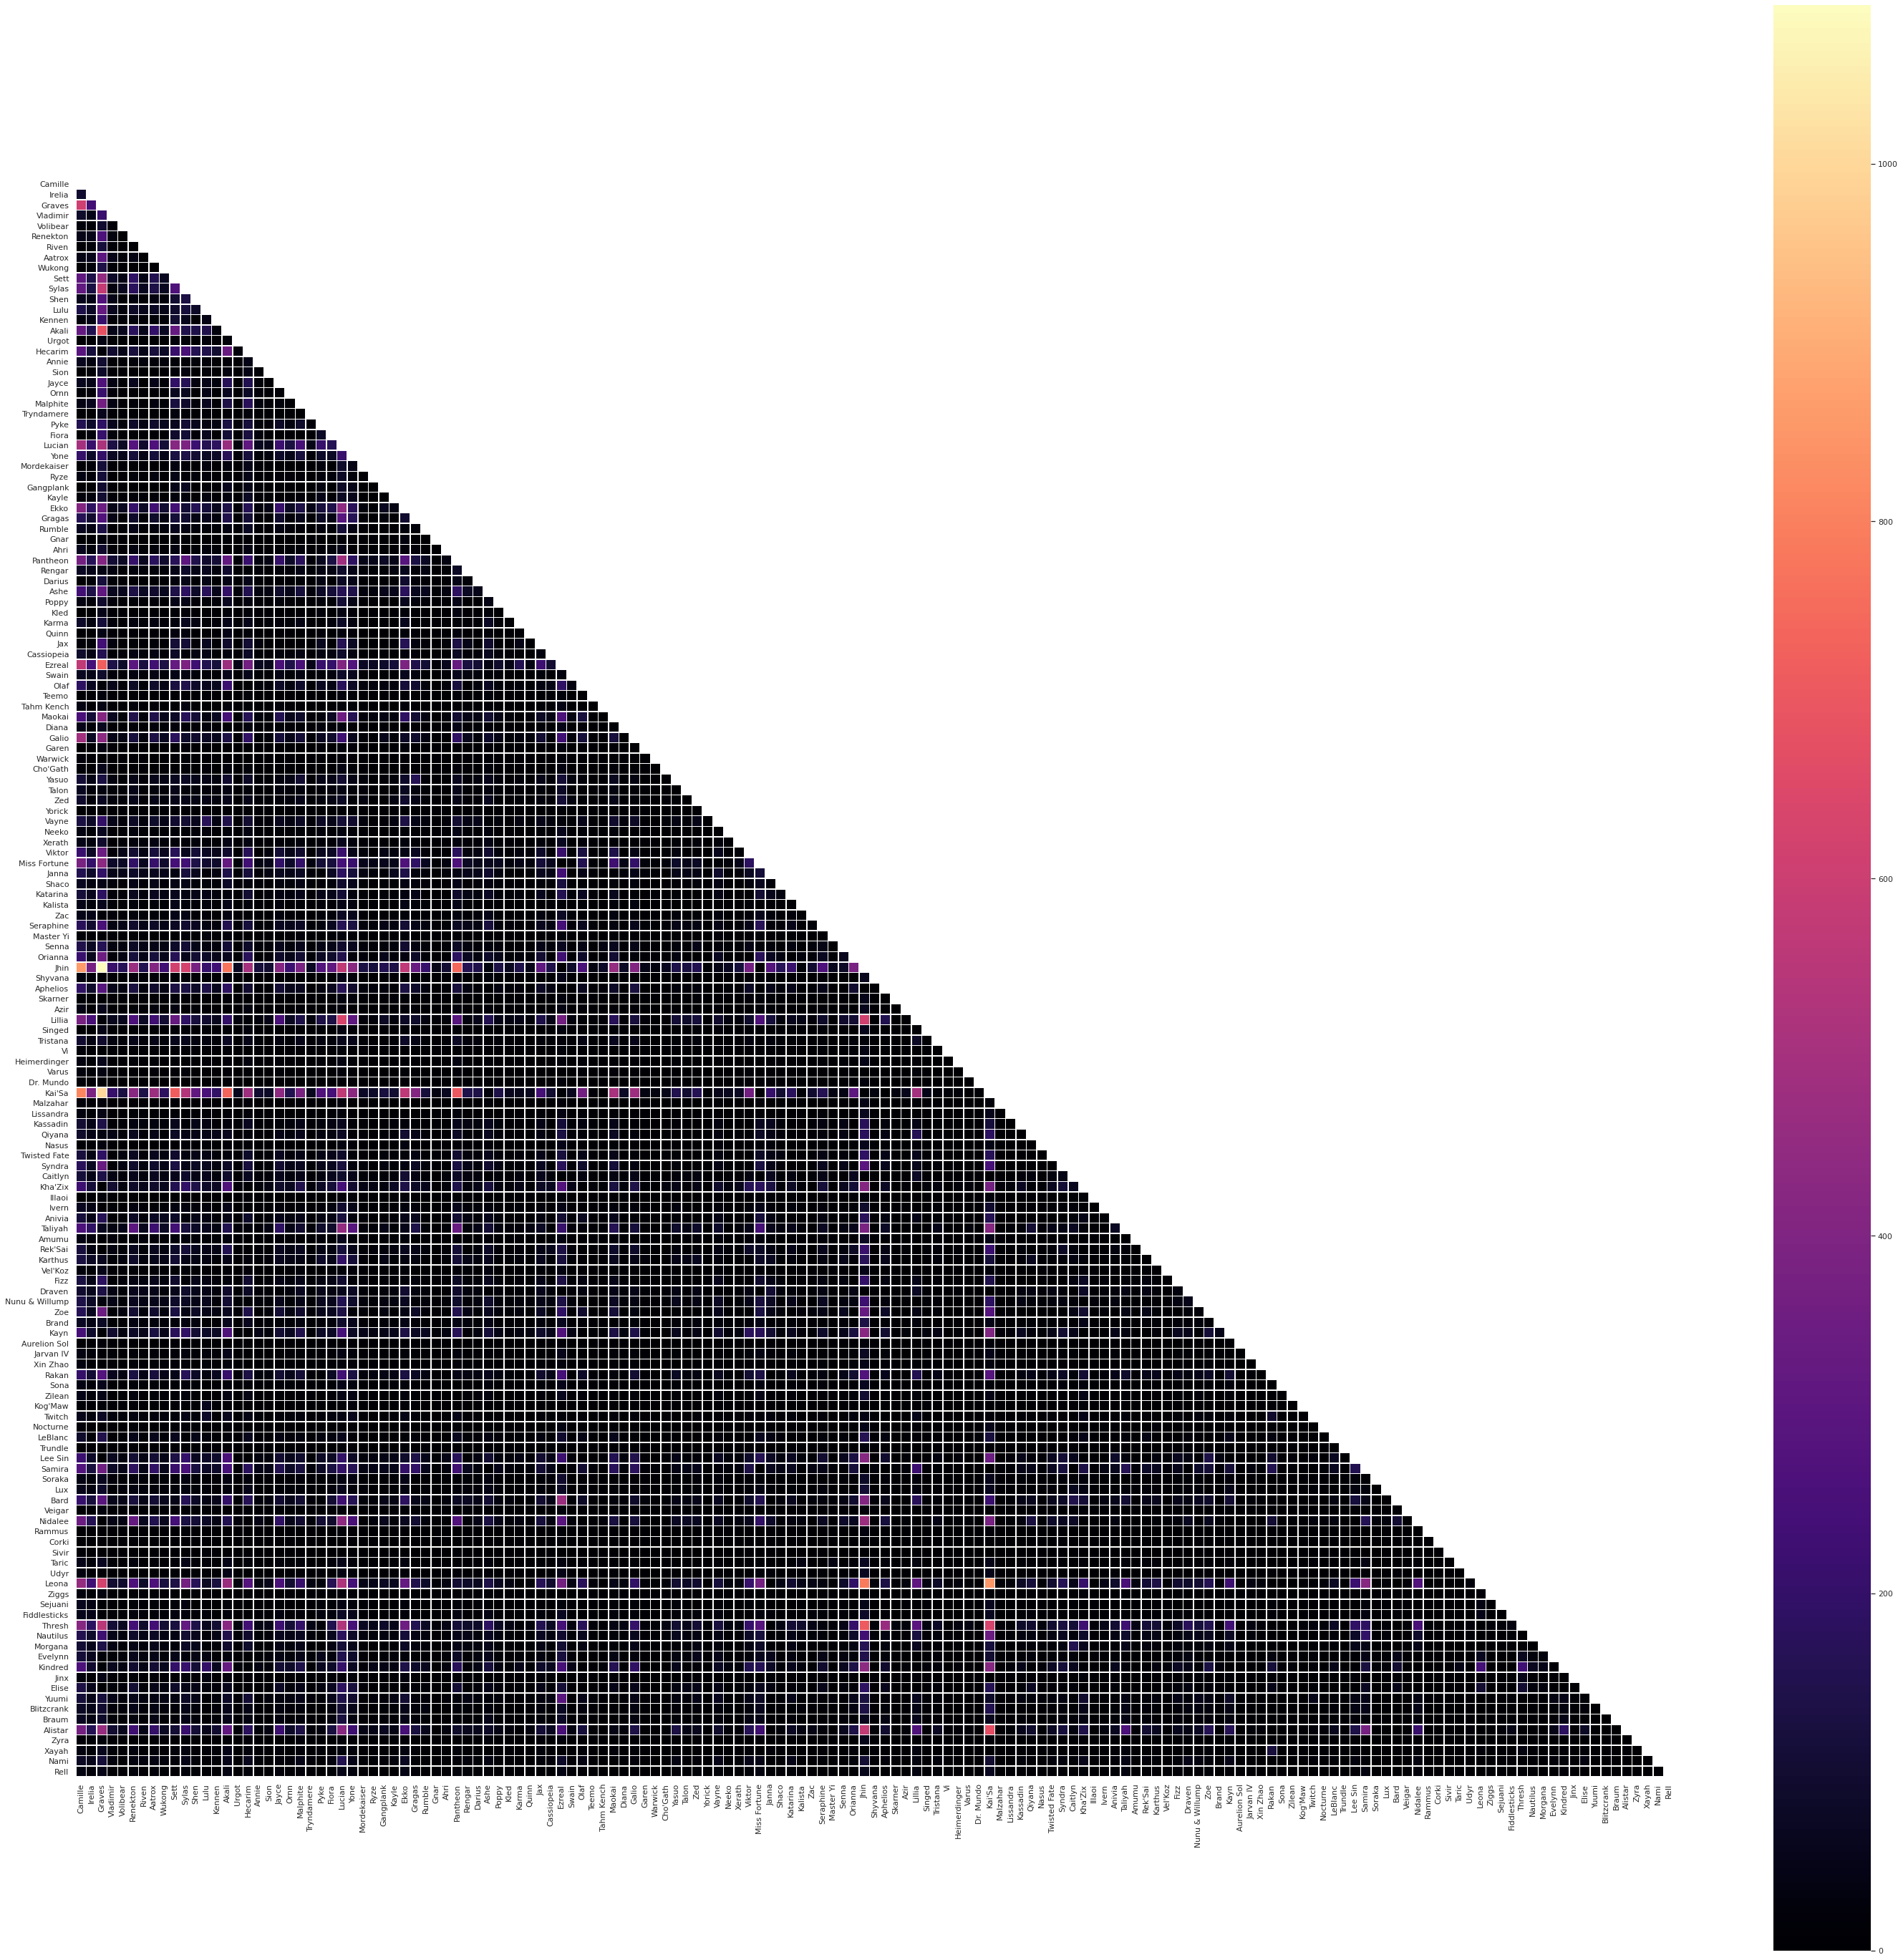

In [48]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(synergies, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.color_palette("magma", as_cmap=True)

synergies.sort_values(axis='columns')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(synergies, cmap=cmap,
            square=True, linewidths=.5)